
### **ANALYZING STOCK MARKET BEHAVIOR AND PRICE PREDICTIONS ACROSS GLOBAL MARKETS**
#### MA THESIS - Turgud Valiyev (466760)
#### Supervisor - Prof. Piotr Wojcik 
#### Date - April 2025

# --------------------------------------------------------------------------------------------

### -----------------------------------------------        **Stage 1: Setup & Data Import**       ---------------------------------------------

#### ✅ Step 1.1: Import libraries

In [173]:
#!pip install yfinance

import yfinance as yf
import pandas as pd
from datetime import datetime

#### ✅ Step 1.2: Define the full list of 69 selected stocks, grouped by sector

In [174]:
import pandas as pd
import os

# Dictionary to store stock data
stock_data_dict = {}

# Define your stock list
stock_list = [
    # Consumer Staple Sector
    "INGR", "TR", "FLO", "STKL", "JJSF", "WILC", "TSN", "CHD", "GIS", "ADM", "EL", "HSY",   # Consumer Staple Sector (12 stocks)x
    # Energy Sector
    "NFG", "SBR", "NRT", "LEU", "REPX", "SHEL", "TTE", "XOM", "EOG", "WMB", "VLO",      # Energy Sector (11 stocks)
    # Financial Sector
    "ESGR", "WTM", "RLI", "BUSE", "CNOB", "GL", "RY", "AFL", "BK", "USB", "ING", "BLK",     # Financial Sector (12 stocks)
    # Healthcare Sector
    "DGX", "UTMD", "ATR", "ERNA", "PETS", "RMD", "ABT", "MDT", "COR", "NVO", "BIO", "RDNT",   # Healthcare Sector (12 stocks)
    # Industrials Sector
    "BBSI", "CWST", "MMS", "AIT", "EBF", "AAON", "ITW", "RSG", "CP", "BA", "LUV", "CHRW",    # Industrials Sector (12 stocks) 
    # Technology Sector
    "DOX", "ADTN", "POWI", "CTLP", "ROP", "TDY", "MSI", "GLW", "MU", "STM"   # Technology Sector (10 stocks)
]

# Set the folder where CSVs are stored
data_folder = r"C:\Users\User\Desktop\Master Thesis\Imported 69 Stocks Datasets"

#### ✅ Step 1.3: Download 25 years of daily data (2000–today)

In [175]:
# Load loop
for symbol in stock_list:
    print(f"📄 Loading data for: {symbol}")
    file_path = os.path.join(data_folder, f"{symbol}.csv")
    
    try:
        df = pd.read_csv(file_path)
        if not df.empty:
            df['Symbol'] = symbol  # Add Symbol column
            stock_data_dict[symbol] = df
        else:
            print(f"⚠️ Empty file for {symbol}")
    except Exception as e:
        print(f"❌ Failed to load {symbol}: {e}")

📄 Loading data for: INGR
📄 Loading data for: TR
📄 Loading data for: FLO
📄 Loading data for: STKL
📄 Loading data for: JJSF
📄 Loading data for: WILC
📄 Loading data for: TSN
📄 Loading data for: CHD
📄 Loading data for: GIS
📄 Loading data for: ADM
📄 Loading data for: EL
📄 Loading data for: HSY
📄 Loading data for: NFG
📄 Loading data for: SBR
📄 Loading data for: NRT
📄 Loading data for: LEU
📄 Loading data for: REPX
📄 Loading data for: SHEL
📄 Loading data for: TTE
📄 Loading data for: XOM
📄 Loading data for: EOG
📄 Loading data for: WMB
📄 Loading data for: VLO
📄 Loading data for: ESGR
📄 Loading data for: WTM
📄 Loading data for: RLI
📄 Loading data for: BUSE
📄 Loading data for: CNOB
📄 Loading data for: GL
📄 Loading data for: RY
📄 Loading data for: AFL
📄 Loading data for: BK
📄 Loading data for: USB
📄 Loading data for: ING
📄 Loading data for: BLK
📄 Loading data for: DGX
📄 Loading data for: UTMD
📄 Loading data for: ATR
📄 Loading data for: ERNA
📄 Loading data for: PETS
📄 Loading data for: RMD
📄 Loading

### ------------------------------------------        **Stage 2: Data Preparation & Splitting**          ------------------------------------------

#### ✅ Step 2.1: View head() of one stock per each sector

In [176]:
# Select one representative stock per sector
example_stocks = {
    "Consumer Staples": "TSN",
    "Energy": "XOM",
    "Financial": "USB",
    "Healthcare": "ABT",
    "Industrials": "ITW",
    "Technology": "MSI"
}

# Display head of each
for sector, symbol in example_stocks.items():
    print(f"\n📊 {sector} — {symbol}")
    if symbol in stock_data_dict:
        display(stock_data_dict[symbol].head())  # Jupyter-friendly
        # Or use print(stock_data_dict[symbol].head()) if not in Jupyter
    else:
        print(f"⚠️ {symbol} not found in stock_data_dict")


📊 Consumer Staples — TSN


Date  TSN.Open  TSN.High   TSN.Low  TSN.Close     TSN.Volume  \
0  2000-01-03 16.375000 16.375000 16.000000  16.062500 235,200.000000   
1  2000-01-04 16.000000 16.125000 15.937500  16.000000 188,600.000000   
2  2000-01-05 16.000000 16.312500 16.000000  16.062500 168,900.000000   
3  2000-01-06 16.187500 16.312500 16.000000  16.187500 177,700.000000   
4  2000-01-07 16.312500 16.937500 16.312500  16.937500 170,300.000000   

   TSN.Adjusted Symbol  
0     10.795308    TSN  
1     10.753301    TSN  
2     10.795308    TSN  
3     10.879316    TSN  
4     11.383371    TSN


📊 Energy — XOM


Date  XOM.Open  XOM.High   XOM.Low  XOM.Close        XOM.Volume  \
0  2000-01-03 39.750000 40.375000 38.937500  39.156250 13,458,200.000000   
1  2000-01-04 38.687500 39.093750 38.250000  38.406250 14,510,800.000000   
2  2000-01-05 39.000000 40.875000 38.906250  40.500000 17,485,000.000000   
3  2000-01-06 40.312500 42.906250 40.093750  42.593750 19,461,600.000000   
4  2000-01-07 42.968750 43.125000 42.000000  42.468750 16,603,800.000000   

   XOM.Adjusted Symbol  
0     17.730230    XOM  
1     17.390627    XOM  
2     18.338690    XOM  
3     19.286755    XOM  
4     19.230156    XOM


📊 Financial — USB


Date  USB.Open  USB.High   USB.Low  USB.Close  USB.Volume  \
0  2000-01-03 20.937500 21.000000 20.062500  20.562500     2354200   
1  2000-01-04 20.375000 20.375000 19.187500  19.812500     3687700   
2  2000-01-05 19.812500 20.062500 19.312500  19.375000     2704200   
3  2000-01-06 19.375000 20.875000 19.375000  20.875000     4185300   
4  2000-01-07 20.937500 22.187500 20.937500  21.687500     4486700   

   USB.Adjusted Symbol  
0      8.901262    USB  
1      8.576598    USB  
2      8.387210    USB  
3      9.036541    USB  
4      9.388264    USB


📊 Healthcare — ABT


Date  ABT.Open  ABT.High   ABT.Low  ABT.Close        ABT.Volume  \
0  2000-01-03 15.823756 16.160433 15.599306  15.711531 10,635,087.000000   
1  2000-01-04 15.459024 15.599306 15.150405  15.262630 10,734,887.000000   
2  2000-01-05 15.066236 15.402911 15.066236  15.234574 11,722,632.000000   
3  2000-01-06 15.262630 15.823756 15.178461  15.767643 17,479,583.000000   
4  2000-01-07 15.487080 16.272657 15.487080  15.935981 15,756,040.000000   

   ABT.Adjusted Symbol  
0      8.206899    ABT  
1      7.972415    ABT  
2      7.957763    ABT  
3      8.236207    ABT  
4      8.324141    ABT


📊 Industrials — ITW


Date  ITW.Open  ITW.High   ITW.Low  ITW.Close       ITW.Volume  \
0  2000-01-03 30.250000 32.406250 30.187500  31.937500 6,250,200.000000   
1  2000-01-04 31.812500 31.843750 30.250000  30.500000 2,799,600.000000   
2  2000-01-05 30.500000 31.125000 30.031250  30.875000 2,350,800.000000   
3  2000-01-06 30.437500 30.875000 30.250000  30.656250 2,038,800.000000   
4  2000-01-07 31.187500 32.687500 31.125000  32.625000 3,213,800.000000   

   ITW.Adjusted Symbol  
0     18.603224    ITW  
1     17.765894    ITW  
2     17.984329    ITW  
3     17.856907    ITW  
4     19.003670    ITW


📊 Technology — MSI


Date   MSI.Open   MSI.High    MSI.Low  MSI.Close       MSI.Volume  \
0  2000-01-03 182.409393 185.273666 176.379333 179.695862 3,421,109.000000   
1  2000-01-04 173.062790 175.776321 165.223709 166.278976 4,138,266.000000   
2  2000-01-05 165.223709 165.675964 157.686127 161.907181 4,684,611.000000   
3  2000-01-06 161.002670 161.605682 142.309479 143.515488 4,776,899.000000   
4  2000-01-07 148.339539 155.726364 147.058151 155.349487 6,554,244.000000   

   MSI.Adjusted Symbol  
0    126.617050    MSI  
1    117.163300    MSI  
2    114.082817    MSI  
3    101.123665    MSI  
4    109.462135    MSI

#### ✅ Step 2.2: Count missing values for each of the 69 datasets

##### If most stocks have 0 or very few missing values → we can just drop them. 
##### If some stocks have a lot → we can decide whether to drop rows or exclude them entirely.

In [177]:
# Create a list to store missing value counts
missing_data_summary = []

# Loop through each stock
for symbol, df in stock_data_dict.items():
    missing_count = df.isna().sum().sum()  # Total missing across entire DataFrame
    missing_data_summary.append({
        "Symbol": symbol,
        "Missing_Values": missing_count
    })

# Convert to DataFrame
missing_df = pd.DataFrame(missing_data_summary)

# Sort by number of missing values (optional)
missing_df = missing_df.sort_values(by="Missing_Values", ascending=False).reset_index(drop=True)


# Set display option to show all rows
pd.set_option('display.max_rows', 100)

# Show full missing values table
print("\n📋 Full Missing Values Summary:")
print(missing_df)


📋 Full Missing Values Summary:
   Symbol  Missing_Values
0    INGR               0
1     NVO               0
2     AIT               0
3     MMS               0
4    CWST               0
5    BBSI               0
6    RDNT               0
7     BIO               0
8     COR               0
9     DGX               0
10    MDT               0
11    ABT               0
12    RMD               0
13   PETS               0
14   ERNA               0
15    ATR               0
16    EBF               0
17   AAON               0
18    ITW               0
19    RSG               0
20     CP               0
21     BA               0
22    LUV               0
23   CHRW               0
24    DOX               0
25   ADTN               0
26   POWI               0
27   CTLP               0
28    ROP               0
29    TDY               0
30    MSI               0
31    GLW               0
32     MU               0
33   UTMD               0
34    BLK               0
35     TR               0
36    

In [178]:
# Loop through each stock and print its column names
for symbol, df in stock_data_dict.items():
    print(f"\n🔍 Columns in {symbol}:")
    print(list(df.columns))


🔍 Columns in INGR:
['Date', 'INGR.Open', 'INGR.High', 'INGR.Low', 'INGR.Close', 'INGR.Volume', 'INGR.Adjusted', 'Symbol']

🔍 Columns in TR:
['Date', 'TR.Open', 'TR.High', 'TR.Low', 'TR.Close', 'TR.Volume', 'TR.Adjusted', 'Symbol']

🔍 Columns in FLO:
['Date', 'FLO.Open', 'FLO.High', 'FLO.Low', 'FLO.Close', 'FLO.Volume', 'FLO.Adjusted', 'Symbol']

🔍 Columns in STKL:
['Date', 'STKL.Open', 'STKL.High', 'STKL.Low', 'STKL.Close', 'STKL.Volume', 'STKL.Adjusted', 'Symbol']

🔍 Columns in JJSF:
['Date', 'JJSF.Open', 'JJSF.High', 'JJSF.Low', 'JJSF.Close', 'JJSF.Volume', 'JJSF.Adjusted', 'Symbol']

🔍 Columns in WILC:
['Date', 'WILC.Open', 'WILC.High', 'WILC.Low', 'WILC.Close', 'WILC.Volume', 'WILC.Adjusted', 'Symbol']

🔍 Columns in TSN:
['Date', 'TSN.Open', 'TSN.High', 'TSN.Low', 'TSN.Close', 'TSN.Volume', 'TSN.Adjusted', 'Symbol']

🔍 Columns in CHD:
['Date', 'CHD.Open', 'CHD.High', 'CHD.Low', 'CHD.Close', 'CHD.Volume', 'CHD.Adjusted', 'Symbol']

🔍 Columns in GIS:
['Date', 'GIS.Open', 'GIS.High',

In [179]:
import pandas as pd

# List to collect standard deviation results
std_dev_summary = []

# Loop over each stock DataFrame
for symbol, df in stock_data_dict.items():
    adjusted_col = f"{symbol}.Adjusted"
    
    # Check if the adjusted close column exists
    if adjusted_col in df.columns:
        # Drop missing values
        df_clean = df.dropna(subset=[adjusted_col])
        # Calculate standard deviation
        std_dev = df_clean[adjusted_col].std()
        # Store result
        std_dev_summary.append((symbol, std_dev))
    else:
        print(f"⚠️ Adjusted column not found for {symbol}")

# Create summary DataFrame
std_dev_df = pd.DataFrame(std_dev_summary, columns=["Symbol", "StandardDeviation"])

# Sort by standard deviation
std_dev_df_sorted = std_dev_df.sort_values(by="StandardDeviation", ascending=False)

# Display all rows
pd.set_option('display.max_rows', None)

# Show result
print("\n📊 Standard Deviation Summary:")
print(std_dev_df_sorted)


📊 Standard Deviation Summary:
   Symbol  StandardDeviation
38   ERNA       1,849.020196
15    LEU       1,234.243261
24    WTM         413.716242
16   REPX         271.000588
34    BLK         256.927560
45    BIO         172.324655
63    ROP         169.382860
64    TDY         150.274834
65    MSI          98.998095
56     BA          94.934750
23   ESGR          82.268402
10     EL          79.858653
40    RMD          76.456254
53    ITW          74.266849
43    COR          60.929048
11    HSY          60.804775
4    JJSF          54.599152
50    AIT          51.945713
54    RSG          51.898932
62   CTLP          43.913098
37    ATR          42.266309
35    DGX          39.668342
22    VLO          38.320732
41    ABT          36.154382
0    INGR          36.056674
20    EOG          34.826448
28     GL          34.417994
7     CHD          32.551500
29     RY          30.195858
48   CWST          29.683199
36   UTMD          29.333319
44    NVO          28.580310
49    MMS   

The standard deviation summary of the selected stocks reveals substantial variability in price volatility across different sectors. The highest standard deviations are observed in stocks such as ERNA (1849.02), LEU (1234.24), and WTM (413.72), reflecting extreme price fluctuations likely tied to speculative activity or sector-specific risks — particularly in sectors like healthcare (ERNA) and energy (LEU). This level of volatility may indicate exposure to rapid market shifts or irregular trading behavior. On the other end of the spectrum, stocks like NRT (2.71), WILC (4.53), and EBF (4.67) exhibit very low standard deviations, suggesting relatively stable price movements over time. These differences highlight how risk varies not only between sectors but also between companies of different leadership and volatility classifications. For example, while financial sector stocks like BLK (256.93) show high volatility, others like ING (4.99) are significantly more stable. A key observation is that such wide dispersion in volatility among stocks — even within the same sector — emphasizes the importance of individualized analysis over relying solely on sector trends or index-based generalizations. This differentiation is crucial when designing portfolio strategies tailored to varying investor risk profiles.

In [180]:
# Create summary table for each stock's raw data
summary_list = []

for symbol, df in stock_data_dict.items():
    summary = {
        'Symbol': symbol,
        'Start_Date': df['Date'].min() if 'Date' in df.columns else None,
        'End_Date': df['Date'].max() if 'Date' in df.columns else None,
        'Num_Rows': df.shape[0],
        'Num_Columns': df.shape[1]
    }
    summary_list.append(summary)

# Create summary DataFrame
stock_data_summary_df = pd.DataFrame(summary_list)

# Sort by Symbol and display all rows
stock_data_summary_df = stock_data_summary_df.sort_values(by="Symbol")
pd.set_option('display.max_rows', None)

# Show full overview
print("\n📊 Stock Data Overview:")
print(stock_data_summary_df)


📊 Stock Data Overview:
   Symbol  Start_Date    End_Date  Num_Rows  Num_Columns
52   AAON  2000-01-03  2025-04-30      6370            8
41    ABT  2000-01-03  2025-04-30      6370            8
9     ADM  2000-01-03  2025-04-30      6370            8
60   ADTN  2000-01-03  2025-04-30      6370            8
30    AFL  2000-01-03  2025-04-30      6370            8
50    AIT  2000-01-03  2025-04-30      6370            8
37    ATR  2000-01-03  2025-04-30      6370            8
56     BA  2000-01-03  2025-04-30      6370            8
47   BBSI  2000-01-03  2025-04-30      6370            8
45    BIO  2000-01-03  2025-04-30      6370            8
31     BK  2000-01-03  2025-04-30      6370            8
34    BLK  2000-01-03  2025-04-30      6370            8
26   BUSE  2000-01-03  2025-04-30      6370            8
7     CHD  2000-01-03  2025-04-30      6370            8
58   CHRW  2000-01-03  2025-04-30      6370            8
27   CNOB  2000-01-03  2025-04-30      6370            8
43    C

#### We may obseve that there is nort any missing values in whole list of datasets. Data is **clean**, **consistent**, and **ready for splitting and feature engineering**

#### ✅ Step 2.3: Code for Train/Validation Split

##### We will split each of the 69 cleaned stock datasets into:

**🟢 Training set → from 2000-01-01 to 2020-12-31**

**🟡 Validation set → from 2021-01-01 to 2023-12-31**

**🔵 Test set → from 2024-01-01 to today**

In [181]:
import pandas as pd
from datetime import datetime

# Create dictionaries for train, validation, and test sets
train_data_dict = {}
val_data_dict = {}
test_data_dict = {}

# Define date boundaries
train_end_date = "2019-12-31"
val_start_date = "2020-01-01"
val_end_date = "2022-12-31"
test_start_date = "2023-01-01"
test_end_date = datetime.today().strftime('%Y-%m-%d')

# Process each stock's data
for symbol, df in stock_data_dict.items():
    # Drop missing values and ensure date format
    df = df.dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values("Date")

    # Split the data based on defined ranges
    train_df = df[df["Date"] <= train_end_date].copy()
    val_df = df[(df["Date"] >= val_start_date) & (df["Date"] <= val_end_date)].copy()
    test_df = df[df["Date"] >= test_start_date].copy()

    # Store results
    train_data_dict[symbol] = train_df
    val_data_dict[symbol] = val_df
    test_data_dict[symbol] = test_df

    # Print brief summary for confirmation
    print(f"📊 Stock: {symbol}")
    print(f"  🟢 Train Set     : {train_df.shape}")
    print(f"  🟡 Validation Set: {val_df.shape}")
    print(f"  🔵 Test Set      : {test_df.shape}")
    print("-" * 50)

📊 Stock: INGR
  🟢 Train Set     : (5031, 8)
  🟡 Validation Set: (756, 8)
  🔵 Test Set      : (583, 8)
--------------------------------------------------
📊 Stock: TR
  🟢 Train Set     : (5031, 8)
  🟡 Validation Set: (756, 8)
  🔵 Test Set      : (583, 8)
--------------------------------------------------
📊 Stock: FLO
  🟢 Train Set     : (5031, 8)
  🟡 Validation Set: (756, 8)
  🔵 Test Set      : (583, 8)
--------------------------------------------------
📊 Stock: STKL
  🟢 Train Set     : (5031, 8)
  🟡 Validation Set: (756, 8)
  🔵 Test Set      : (583, 8)
--------------------------------------------------
📊 Stock: JJSF
  🟢 Train Set     : (5031, 8)
  🟡 Validation Set: (756, 8)
  🔵 Test Set      : (583, 8)
--------------------------------------------------
📊 Stock: WILC
  🟢 Train Set     : (5031, 8)
  🟡 Validation Set: (756, 8)
  🔵 Test Set      : (583, 8)
--------------------------------------------------
📊 Stock: TSN
  🟢 Train Set     : (5031, 8)
  🟡 Validation Set: (756, 8)
  🔵 Test Set 

In [182]:
# Loop through each stock and check the number of unique years in train, test, and validation sets
for symbol in train_data_dict.keys():
    # Get the train, test, and validation data for the current stock
    train_df = train_data_dict[symbol]
    val_df = val_data_dict[symbol]
    test_df = test_data_dict[symbol]
    

    # Extract the year from the 'Date' column and find the unique years
    train_unique_years = train_df['Date'].dt.year.nunique()
    val_unique_years = val_df['Date'].dt.year.nunique()
    test_unique_years = test_df['Date'].dt.year.nunique()
    

    # Print the number of unique years for each set
    print(f"📊 Stock: {symbol}")
    print(f"Number of unique years in Train Set: {train_unique_years}")
    print(f"Number of unique years in Validation Set: {val_unique_years}")
    print(f"Number of unique years in Test Set: {test_unique_years}")
    
    print("-" * 50)

📊 Stock: INGR
Number of unique years in Train Set: 20
Number of unique years in Validation Set: 3
Number of unique years in Test Set: 3
--------------------------------------------------
📊 Stock: TR
Number of unique years in Train Set: 20
Number of unique years in Validation Set: 3
Number of unique years in Test Set: 3
--------------------------------------------------
📊 Stock: FLO
Number of unique years in Train Set: 20
Number of unique years in Validation Set: 3
Number of unique years in Test Set: 3
--------------------------------------------------
📊 Stock: STKL
Number of unique years in Train Set: 20
Number of unique years in Validation Set: 3
Number of unique years in Test Set: 3
--------------------------------------------------
📊 Stock: JJSF
Number of unique years in Train Set: 20
Number of unique years in Validation Set: 3
Number of unique years in Test Set: 3
--------------------------------------------------
📊 Stock: WILC
Number of unique years in Train Set: 20
Number of uniq

#### Step 3.1: Add Log_Return (Dep variable)

In [183]:
import numpy as np

# Calculate log returns for each dataset
for symbol in stock_data_dict.keys():
    # Construct column name for Adjusted Close (e.g., "AAPL.Adjusted")
    adj_close_col = f"{symbol}.Adjusted"

    if adj_close_col in train_data_dict[symbol].columns:
        # Calculate Log Return for Train set
        train_data_dict[symbol]['Log_Return'] = np.log(
            train_data_dict[symbol][adj_close_col] / train_data_dict[symbol][adj_close_col].shift(1)
        )

        # Calculate Log Return for Validation set
        val_data_dict[symbol]['Log_Return'] = np.log(
            val_data_dict[symbol][adj_close_col] / val_data_dict[symbol][adj_close_col].shift(1)
        )

        # Calculate Log Return for Test set
        test_data_dict[symbol]['Log_Return'] = np.log(
            test_data_dict[symbol][adj_close_col] / test_data_dict[symbol][adj_close_col].shift(1)
        )
    else:
        print(f"⚠️ Adjusted Close column not found for {symbol}")

In [184]:
train_data_dict["INGR"].head()

Date  INGR.Open  INGR.High  INGR.Low  INGR.Close   INGR.Volume  \
0 2000-01-03  16.375000  16.500000 15.750000   15.812500 71,400.000000   
1 2000-01-04  15.687500  15.687500 15.187500   15.187500 99,200.000000   
2 2000-01-05  15.375000  15.968750 15.343750   15.687500 92,400.000000   
3 2000-01-06  15.625000  15.656250 15.343750   15.375000 81,200.000000   
4 2000-01-07  15.375000  15.593750 15.312500   15.593750 52,400.000000   

   INGR.Adjusted Symbol  Log_Return  
0       9.741834   INGR         NaN  
1       9.356785   INGR   -0.040328  
2       9.664825   INGR    0.032391  
3       9.472300   INGR   -0.020121  
4       9.607067   INGR    0.014127

#### Step 3.2 (Part 1): Add SMA_10 and Close_to_SMA

In [185]:
# Step 3.2 (Part 1): Add SMA_10 and Close_to_SMA

for symbol in stock_data_dict.keys():
    close_col = f"{symbol}.Close"

    # --- Training data ---
    df_train = train_data_dict[symbol].copy()
    df_train = df_train.drop(columns=['SMA_10', 'Close_to_SMA'], errors='ignore')

    sma_train = df_train[close_col].rolling(window=10).mean()
    df_train['SMA_10'] = sma_train
    df_train['Close_to_SMA'] = df_train[close_col] / sma_train
    train_data_dict[symbol] = df_train.dropna().reset_index(drop=True)

    # --- Validation data ---
    df_val = val_data_dict[symbol].copy()
    df_val = df_val.drop(columns=['SMA_10', 'Close_to_SMA'], errors='ignore')

    sma_val = df_val[close_col].rolling(window=10).mean()
    df_val['SMA_10'] = sma_val
    df_val['Close_to_SMA'] = df_val[close_col] / sma_val
    val_data_dict[symbol] = df_val.dropna().reset_index(drop=True)

    # --- Test data ---
    df_test = test_data_dict[symbol].copy()
    df_test = df_test.drop(columns=['SMA_10', 'Close_to_SMA'], errors='ignore')

    sma_test = df_test[close_col].rolling(window=10).mean()
    df_test['SMA_10'] = sma_test
    df_test['Close_to_SMA'] = df_test[close_col] / sma_test
    test_data_dict[symbol] = df_test.dropna().reset_index(drop=True)

In [186]:

# Display first 10 rows with key features for INGR
symbol = "INGR"
df_head = train_data_dict[symbol][[
    "Date",
    f"{symbol}.High",
    f"{symbol}.Low",
    "SMA_10",
    "Close_to_SMA"
]].head(10)

print(df_head)

        Date  INGR.High  INGR.Low    SMA_10  Close_to_SMA
0 2000-01-14  15.656250 15.125000 15.312500      0.991837
1 2000-01-18  15.125000 14.656250 15.206250      0.969996
2 2000-01-19  14.437500 12.968750 14.984375      0.865485
3 2000-01-20  12.375000 11.218750 14.540625      0.773694
4 2000-01-21  12.000000 11.375000 14.203125      0.844884
5 2000-01-24  12.500000 12.031250 13.862500      0.879170
6 2000-01-25  12.406250 12.000000 13.578125      0.909091
7 2000-01-26  12.375000 12.031250 13.293750      0.907381
8 2000-01-27  12.343750 11.937500 13.015625      0.917167
9 2000-01-28  11.937500 11.500000 12.618750      0.911342


#### Step 3.2 (Part 2): Add Rolling_High_Max_10 and Rolling_Low_Min_10

##### These features will give us insights into:

**🟩 Recent price ceilings (Rolling_High_Max_10)**

**🟥 Recent price floors (Rolling_Low_Min_10)**

In [187]:
# Add rolling 14-day high and low to train, test, and validation sets
for symbol in stock_data_dict.keys():
    high_col = f"{symbol}.High"
    low_col = f"{symbol}.Low"

    # --- Training data ---
    df_train = train_data_dict[symbol].copy()
    df_train = df_train.drop(columns=['Rolling_High_Max_10', 'Rolling_Low_Min_10'], errors='ignore')
    df_train['Rolling_High_Max_10'] = df_train[high_col].rolling(window=10).max()
    df_train['Rolling_Low_Min_10'] = df_train[low_col].rolling(window=10).min()
    train_data_dict[symbol] = df_train.dropna().reset_index(drop=True)

    # --- Validation data ---
    df_val = val_data_dict[symbol].copy()
    df_val = df_val.drop(columns=['Rolling_High_Max_10', 'Rolling_Low_Min_10'], errors='ignore')
    df_val['Rolling_High_Max_10'] = df_val[high_col].rolling(window=10).max()
    df_val['Rolling_Low_Min_10'] = df_val[low_col].rolling(window=10).min()
    val_data_dict[symbol] = df_val.dropna().reset_index(drop=True)

    # --- Test data ---
    df_test = test_data_dict[symbol].copy()
    df_test = df_test.drop(columns=['Rolling_High_Max_10', 'Rolling_Low_Min_10'], errors='ignore')
    df_test['Rolling_High_Max_10'] = df_test[high_col].rolling(window=10).max()
    df_test['Rolling_Low_Min_10'] = df_test[low_col].rolling(window=10).min()
    test_data_dict[symbol] = df_test.dropna().reset_index(drop=True)

In [188]:
# Define symbol
symbol = "INGR"

# Prepare column names based on the current structure
high_col = f"{symbol}.High"
low_col = f"{symbol}.Low"

# Select and display relevant columns
train_data_dict[symbol][['Date', high_col, low_col, 'Rolling_High_Max_10', 'Rolling_Low_Min_10']].head(10)

Date  INGR.High  INGR.Low  Rolling_High_Max_10  Rolling_Low_Min_10
0 2000-01-28  11.937500 11.500000            15.656250           11.218750
1 2000-01-31  11.500000 11.312500            15.125000           11.218750
2 2000-02-01  11.500000 11.437500            14.437500           11.218750
3 2000-02-02  11.562500 11.468750            12.500000           11.218750
4 2000-02-03  11.718750 11.500000            12.500000           11.312500
5 2000-02-04  11.687500 11.625000            12.500000           11.312500
6 2000-02-07  11.875000 11.750000            12.406250           11.312500
7 2000-02-08  11.937500 11.781250            12.375000           11.312500
8 2000-02-09  11.937500 11.781250            12.343750           11.312500
9 2000-02-10  11.843750 11.687500            11.937500           11.312500

#### Step 3.2 (Part 3): Add Price_Range and Close_to_Open

#### These features capture:

**📏 Daily volatility via high-low range**

**🔁 Price momentum between open and close**

In [189]:
# Add Price_Range and Close_to_Open to train, validation, and test sets
for symbol in stock_data_dict.keys():
    
    # --- Training data ---
    df_train = train_data_dict[symbol].copy()
    df_train = df_train.drop(columns=['Price_Range', 'Close_to_Open'], errors='ignore')
    df_train['Price_Range'] = df_train[f'{symbol}.High'] - df_train[f'{symbol}.Low']
    df_train['Close_to_Open'] = df_train[f'{symbol}.Close'] / df_train[f'{symbol}.Open']
    train_data_dict[symbol] = df_train.dropna().reset_index(drop=True)

    # --- Validation data ---
    df_val = val_data_dict[symbol].copy()
    df_val = df_val.drop(columns=['Price_Range', 'Close_to_Open'], errors='ignore')
    df_val['Price_Range'] = df_val[f'{symbol}.High'] - df_val[f'{symbol}.Low']
    df_val['Close_to_Open'] = df_val[f'{symbol}.Close'] / df_val[f'{symbol}.Open']
    val_data_dict[symbol] = df_val.dropna().reset_index(drop=True)

    # --- Test data ---
    df_test = test_data_dict[symbol].copy()
    df_test = df_test.drop(columns=['Price_Range', 'Close_to_Open'], errors='ignore')
    df_test['Price_Range'] = df_test[f'{symbol}.High'] - df_test[f'{symbol}.Low']
    df_test['Close_to_Open'] = df_test[f'{symbol}.Close'] / df_test[f'{symbol}.Open']
    test_data_dict[symbol] = df_test.dropna().reset_index(drop=True)

In [190]:
train_data_dict["INGR"][[
    'Date',
    'INGR.High',
    'INGR.Low',
    'INGR.Open',
    'INGR.Close',
    'Price_Range',
    'Close_to_Open'
]].head(10)

Date  INGR.High  INGR.Low  INGR.Open  INGR.Close  Price_Range  \
0 2000-01-28  11.937500 11.500000  11.906250   11.500000     0.437500   
1 2000-01-31  11.500000 11.312500  11.437500   11.500000     0.187500   
2 2000-02-01  11.500000 11.437500  11.500000   11.468750     0.062500   
3 2000-02-02  11.562500 11.468750  11.468750   11.500000     0.093750   
4 2000-02-03  11.718750 11.500000  11.500000   11.687500     0.218750   
5 2000-02-04  11.687500 11.625000  11.656250   11.656250     0.062500   
6 2000-02-07  11.875000 11.750000  11.750000   11.781250     0.125000   
7 2000-02-08  11.937500 11.781250  11.781250   11.812500     0.156250   
8 2000-02-09  11.937500 11.781250  11.781250   11.781250     0.156250   
9 2000-02-10  11.843750 11.687500  11.812500   11.687500     0.156250   

   Close_to_Open  
0       0.965879  
1       1.005464  
2       0.997283  
3       1.002725  
4       1.016304  
5       1.000000  
6       1.002660  
7       1.002653  
8       1.000000  
9       0.989418

#### Step 3.3: Volume-Based Features (Rolling and Ratio)

##### These features will help us understand market activity — spikes, slumps, and whether volume is unusually high/low compared to recent history.

In [192]:
# Add volume-based features to train, validation, and test sets
for symbol in stock_data_dict.keys():
    volume_col = f"{symbol}.Volume"  # column name pattern based on symbol

    # --- Training data ---
    df_train = train_data_dict[symbol].copy()
    df_train = df_train.drop(columns=[
        'Volume_Change', 'Rolling_Volume_Mean_5',
        'Rolling_Volume_Mean_10', 'Volume_to_AvgRatio'
    ], errors='ignore')

    df_train['Volume_Change'] = df_train[volume_col].diff()
    df_train['Rolling_Volume_Mean_5'] = df_train[volume_col].rolling(window=5).mean()
    df_train['Rolling_Volume_Mean_10'] = df_train[volume_col].rolling(window=10).mean()
    df_train['Volume_to_AvgRatio'] = df_train[volume_col] / df_train['Rolling_Volume_Mean_10']
    train_data_dict[symbol] = df_train.dropna().reset_index(drop=True)

    # --- Validation data ---
    df_val = val_data_dict[symbol].copy()
    df_val = df_val.drop(columns=[
        'Volume_Change', 'Rolling_Volume_Mean_5',
        'Rolling_Volume_Mean_10', 'Volume_to_AvgRatio'
    ], errors='ignore')

    df_val['Volume_Change'] = df_val[volume_col].diff()
    df_val['Rolling_Volume_Mean_5'] = df_val[volume_col].rolling(window=5).mean()
    df_val['Rolling_Volume_Mean_10'] = df_val[volume_col].rolling(window=10).mean()
    df_val['Volume_to_AvgRatio'] = df_val[volume_col] / df_val['Rolling_Volume_Mean_10']
    val_data_dict[symbol] = df_val.dropna().reset_index(drop=True)

    # --- Test data ---
    df_test = test_data_dict[symbol].copy()
    df_test = df_test.drop(columns=[
        'Volume_Change', 'Rolling_Volume_Mean_5',
        'Rolling_Volume_Mean_10', 'Volume_to_AvgRatio'
    ], errors='ignore')

    df_test['Volume_Change'] = df_test[volume_col].diff()
    df_test['Rolling_Volume_Mean_5'] = df_test[volume_col].rolling(window=5).mean()
    df_test['Rolling_Volume_Mean_10'] = df_test[volume_col].rolling(window=10).mean()
    df_test['Volume_to_AvgRatio'] = df_test[volume_col] / df_test['Rolling_Volume_Mean_10']
    test_data_dict[symbol] = df_test.dropna().reset_index(drop=True)

In [193]:
train_data_dict["INGR"][
    ['Date', 'INGR.Volume', 'Volume_Change', 'Rolling_Volume_Mean_5', 'Rolling_Volume_Mean_10', 'Volume_to_AvgRatio']
].tail(10)

Date      INGR.Volume   Volume_Change  Rolling_Volume_Mean_5  \
4994 2019-12-17   592,600.000000 -342,300.000000         739,900.000000   
4995 2019-12-18   508,100.000000  -84,500.000000         674,100.000000   
4996 2019-12-19   434,100.000000  -74,000.000000         602,280.000000   
4997 2019-12-20 1,101,900.000000  667,800.000000         714,320.000000   
4998 2019-12-23   477,100.000000 -624,800.000000         622,760.000000   
4999 2019-12-24   296,600.000000 -180,500.000000         563,560.000000   
5000 2019-12-26   733,200.000000  436,600.000000         608,580.000000   
5001 2019-12-27   621,500.000000 -111,700.000000         646,060.000000   
5002 2019-12-30   656,300.000000   34,800.000000         556,940.000000   
5003 2019-12-31   313,000.000000 -343,300.000000         524,120.000000   

      Rolling_Volume_Mean_10  Volume_to_AvgRatio  
4994          591,220.000000            1.002334  
4995          608,960.000000            0.834373  
4996          605,760.000000            0.716620  
4997          677,230.000000            1.627069  
4998          688,280.000000            0.693177  
4999          651,730.000000            0.455096  
5000          641,340.000000            1.143231  
5001          624,170.000000            0.995722  
5002          635,630.000000            1.032519  
5003          573,440.000000            0.545829

#### Step 3.4: Add Date-Based Features

##### These features can capture:

**🗓️ Weekly patterns (e.g., Monday drops, Friday rallies)**

**📅 Monthly or seasonal patterns**

**📌 Structural info (like month-end effects)**

In [194]:
# Add calendar-based features to train, test, and validation sets
for symbol in stock_data_dict.keys():
    
    # --- Training data ---
    df_train = train_data_dict[symbol].copy()
    df_train['DayOfWeek'] = pd.to_datetime(df_train['Date']).dt.dayofweek      # 0=Monday, 6=Sunday
    df_train['Month'] = pd.to_datetime(df_train['Date']).dt.month
    df_train['IsMonthEnd'] = pd.to_datetime(df_train['Date']).dt.is_month_end.astype(int)
    train_data_dict[symbol] = df_train

    # --- Validation data ---
    df_val = val_data_dict[symbol].copy()
    df_val['DayOfWeek'] = pd.to_datetime(df_val['Date']).dt.dayofweek
    df_val['Month'] = pd.to_datetime(df_val['Date']).dt.month
    df_val['IsMonthEnd'] = pd.to_datetime(df_val['Date']).dt.is_month_end.astype(int)
    val_data_dict[symbol] = df_val

    # --- Test data ---
    df_test = test_data_dict[symbol].copy()
    df_test['DayOfWeek'] = pd.to_datetime(df_test['Date']).dt.dayofweek
    df_test['Month'] = pd.to_datetime(df_test['Date']).dt.month
    df_test['IsMonthEnd'] = pd.to_datetime(df_test['Date']).dt.is_month_end.astype(int)
    test_data_dict[symbol] = df_test

In [195]:
# Display the last 10 rows of date-based features for INGR
train_data_dict["INGR"][['Date', 'DayOfWeek', 'Month', 'IsMonthEnd']].tail(10)

Date  DayOfWeek  Month  IsMonthEnd
4994 2019-12-17          1     12           0
4995 2019-12-18          2     12           0
4996 2019-12-19          3     12           0
4997 2019-12-20          4     12           0
4998 2019-12-23          0     12           0
4999 2019-12-24          1     12           0
5000 2019-12-26          3     12           0
5001 2019-12-27          4     12           0
5002 2019-12-30          0     12           0
5003 2019-12-31          1     12           1

#### Step 3.5 (Part 1): Add Rolling Mean of Log Returns

##### We’ll create:

**Rolling_Return_Mean_5**

**Rolling_Return_Mean_10**

**Rolling_Return_Mean_21**

These show recent average return behavior — upward drift or flatness.

In [196]:
# Add rolling mean of log returns (5, 10, 21) to train, validation, and test sets
for symbol in stock_data_dict.keys():
    
    # === Training data ===
    df_train = train_data_dict[symbol].copy()
    df_train = df_train.drop(columns=[
        'Rolling_Return_Mean_5', 'Rolling_Return_Mean_10', 'Rolling_Return_Mean_21'
    ], errors='ignore')

    df_train['Rolling_Return_Mean_5'] = df_train['Log_Return'].rolling(window=5).mean()
    df_train['Rolling_Return_Mean_10'] = df_train['Log_Return'].rolling(window=10).mean()
    df_train['Rolling_Return_Mean_21'] = df_train['Log_Return'].rolling(window=21).mean()
    train_data_dict[symbol] = df_train.dropna().reset_index(drop=True)

    # === Validation data ===
    df_val = val_data_dict[symbol].copy()
    df_val = df_val.drop(columns=[
        'Rolling_Return_Mean_5', 'Rolling_Return_Mean_10', 'Rolling_Return_Mean_21'
    ], errors='ignore')

    df_val['Rolling_Return_Mean_5'] = df_val['Log_Return'].rolling(window=5).mean()
    df_val['Rolling_Return_Mean_10'] = df_val['Log_Return'].rolling(window=10).mean()
    df_val['Rolling_Return_Mean_21'] = df_val['Log_Return'].rolling(window=21).mean()
    val_data_dict[symbol] = df_val.dropna().reset_index(drop=True)

    # === Test data ===
    df_test = test_data_dict[symbol].copy()
    df_test = df_test.drop(columns=[
        'Rolling_Return_Mean_5', 'Rolling_Return_Mean_10', 'Rolling_Return_Mean_21'
    ], errors='ignore')

    df_test['Rolling_Return_Mean_5'] = df_test['Log_Return'].rolling(window=5).mean()
    df_test['Rolling_Return_Mean_10'] = df_test['Log_Return'].rolling(window=10).mean()
    df_test['Rolling_Return_Mean_21'] = df_test['Log_Return'].rolling(window=21).mean()
    test_data_dict[symbol] = df_test.dropna().reset_index(drop=True)

In [197]:
# View the last 10 rows of INGR with updated rolling return means
train_data_dict["INGR"][['Date', 'Log_Return', 'Rolling_Return_Mean_5', 'Rolling_Return_Mean_10', 'Rolling_Return_Mean_21']].tail(10)

Date  Log_Return  Rolling_Return_Mean_5  Rolling_Return_Mean_10  \
4974 2019-12-17   -0.011230               0.005924                0.007089   
4975 2019-12-18    0.006131               0.004905                0.006877   
4976 2019-12-19    0.007418               0.002219                0.006718   
4977 2019-12-20    0.009115               0.008463                0.006108   
4978 2019-12-23    0.006646               0.003616                0.006401   
4979 2019-12-24    0.004983               0.006859                0.006391   
4980 2019-12-26    0.010212               0.007675                0.006290   
4981 2019-12-27    0.006928               0.007577                0.004898   
4982 2019-12-30   -0.009391               0.003876                0.006169   
4983 2019-12-31    0.003341               0.003215                0.003415   

      Rolling_Return_Mean_21  
4974                0.003074  
4975                0.003902  
4976                0.003821  
4977                0.004267  
4978                0.004418  
4979                0.005186  
4980                0.005312  
4981                0.004981  
4982                0.004321  
4983                0.005617

#### Step 3.5 (Part 2): Add Rolling Std (Volatility) of Log Returns

 These represent short-term return volatility — very useful for capturing recent risk signals.

In [198]:
# Add rolling return standard deviation (volatility) to train, test, and validation sets
for symbol in stock_data_dict.keys():
    
    # --- Training data ---
    df_train = train_data_dict[symbol].copy()
    # Remove existing rolling return std columns if they exist
    df_train = df_train.drop(columns=[
        'Rolling_Return_Std_5', 'Rolling_Return_Std_10', 'Rolling_Return_Std_21'
    ], errors='ignore')

    # Calculate Rolling Std (Volatility) for Log Returns (5, 10, and 21 days)
    df_train['Rolling_Return_Std_5'] = df_train['Log_Return'].rolling(window=5).std()
    df_train['Rolling_Return_Std_10'] = df_train['Log_Return'].rolling(window=10).std()
    df_train['Rolling_Return_Std_21'] = df_train['Log_Return'].rolling(window=21).std()
    # Save to the dictionary with cleaned data
    train_data_dict[symbol] = df_train.dropna().reset_index(drop=True)

    # --- Validation data ---
    df_val = val_data_dict[symbol].copy()
    df_val = df_val.drop(columns=[
        'Rolling_Return_Std_5', 'Rolling_Return_Std_10', 'Rolling_Return_Std_21'
    ], errors='ignore')

    df_val['Rolling_Return_Std_5'] = df_val['Log_Return'].rolling(window=5).std()
    df_val['Rolling_Return_Std_10'] = df_val['Log_Return'].rolling(window=10).std()
    df_val['Rolling_Return_Std_21'] = df_val['Log_Return'].rolling(window=21).std()
    val_data_dict[symbol] = df_val.dropna().reset_index(drop=True)

    # --- Test data ---
    df_test = test_data_dict[symbol].copy()
    df_test = df_test.drop(columns=[
        'Rolling_Return_Std_5', 'Rolling_Return_Std_10', 'Rolling_Return_Std_21'
    ], errors='ignore')

    df_test['Rolling_Return_Std_5'] = df_test['Log_Return'].rolling(window=5).std()
    df_test['Rolling_Return_Std_10'] = df_test['Log_Return'].rolling(window=10).std()
    df_test['Rolling_Return_Std_21'] = df_test['Log_Return'].rolling(window=21).std()
    test_data_dict[symbol] = df_test.dropna().reset_index(drop=True)

In [199]:
train_data_dict["INGR"][[
    'Date', 'Log_Return', 
    'Rolling_Return_Std_5', 'Rolling_Return_Std_10', 'Rolling_Return_Std_21'
]].tail(10)

Date  Log_Return  Rolling_Return_Std_5  Rolling_Return_Std_10  \
4954 2019-12-17   -0.011230              0.022100               0.015081   
4955 2019-12-18    0.006131              0.021911               0.015078   
4956 2019-12-19    0.007418              0.020226               0.015061   
4957 2019-12-20    0.009115              0.014977               0.014800   
4958 2019-12-23    0.006646              0.008376               0.014776   
4959 2019-12-24    0.004983              0.001541               0.014777   
4960 2019-12-26    0.010212              0.002055               0.014744   
4961 2019-12-27    0.006928              0.002081               0.013846   
4962 2019-12-30   -0.009391              0.007654               0.011471   
4963 2019-12-31    0.003341              0.007497               0.007497   

      Rolling_Return_Std_21  
4954               0.013529  
4955               0.013133  
4956               0.013105  
4957               0.013119  
4958               0.013127  
4959               0.012634  
4960               0.012672  
4961               0.012526  
4962               0.012914  
4963               0.011193

In [200]:
# Summary of training datasets: size, date range, columns, and missing values
summary_list = []

for symbol, df in train_data_dict.items():
    summary = {
        'Symbol': symbol,
        'Num_Rows': df.shape[0],
        'Num_Columns': df.shape[1],
        'First_Date': df['Date'].min() if 'Date' in df.columns else None,
        'Last_Date': df['Date'].max() if 'Date' in df.columns else None,
        'Num_Missing_Values': df.isna().sum().sum(),
        'Column_Names': list(df.columns)
    }
    summary_list.append(summary)

# Convert to DataFrame
train_summary_df = pd.DataFrame(summary_list)

# Display all rows and full column names
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

# Output
print("📋 ✅ Train Data Summary:")
print(train_summary_df.sort_values(by="Symbol"))

📋 ✅ Train Data Summary:
   Symbol  Num_Rows  Num_Columns First_Date  Last_Date  Num_Missing_Values  \
52   AAON      4964           28 2000-04-07 2019-12-31                   0   
41    ABT      4964           28 2000-04-07 2019-12-31                   0   
9     ADM      4964           28 2000-04-07 2019-12-31                   0   
60   ADTN      4964           28 2000-04-07 2019-12-31                   0   
30    AFL      4964           28 2000-04-07 2019-12-31                   0   
50    AIT      4964           28 2000-04-07 2019-12-31                   0   
37    ATR      4964           28 2000-04-07 2019-12-31                   0   
56     BA      4964           28 2000-04-07 2019-12-31                   0   
47   BBSI      4957           28 2000-04-07 2019-12-31                   0   
45    BIO      4964           28 2000-04-07 2019-12-31                   0   
31     BK      4964           28 2000-04-07 2019-12-31                   0   
34    BLK      4964           28 2000-04

## ----------------------------------------------------------------------------------------------------------

#### 4. Standartization 

Change non-numeric columns to proper types and convert Target var (Log Return) to character type.

**Note:** Target varibale should not be standartized

In [201]:
# ✅ Renewed Code for Data Type Conversion Before Standardization
for symbol in stock_data_dict.keys():
    # ---- Training Set ----
    df_train = train_data_dict[symbol].copy()
    df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')
    df_train['Symbol'] = df_train['Symbol'].astype('category')
    df_train['DayOfWeek'] = df_train['DayOfWeek'].astype('category')
    df_train['Month'] = df_train['Month'].astype('category')
    df_train['IsMonthEnd'] = df_train['IsMonthEnd'].astype('category')
    df_train['Log_Return'] = df_train['Log_Return'].astype(str)  # Exclude from standardization
    train_data_dict[symbol] = df_train

    # ---- Validation Set ----
    df_val = val_data_dict[symbol].copy()
    df_val['Date'] = pd.to_datetime(df_val['Date'], errors='coerce')
    df_val['Symbol'] = df_val['Symbol'].astype('category')
    df_val['DayOfWeek'] = df_val['DayOfWeek'].astype('category')
    df_val['Month'] = df_val['Month'].astype('category')
    df_val['IsMonthEnd'] = df_val['IsMonthEnd'].astype('category')
    df_val['Log_Return'] = df_val['Log_Return'].astype(str)
    val_data_dict[symbol] = df_val

    # ---- Test Set ----
    df_test = test_data_dict[symbol].copy()
    df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')
    df_test['Symbol'] = df_test['Symbol'].astype('category')
    df_test['DayOfWeek'] = df_test['DayOfWeek'].astype('category')
    df_test['Month'] = df_test['Month'].astype('category')
    df_test['IsMonthEnd'] = df_test['IsMonthEnd'].astype('category')
    df_test['Log_Return'] = df_test['Log_Return'].astype(str)
    test_data_dict[symbol] = df_test

# ✅ Quick check
sample_symbol = 'INGR'
print(f"\n🔎 Data types in train_data_dict['{sample_symbol}']:")
print(train_data_dict[sample_symbol].dtypes)


🔎 Data types in train_data_dict['INGR']:
Date                      datetime64[ns]
INGR.Open                        float64
INGR.High                        float64
INGR.Low                         float64
INGR.Close                       float64
INGR.Volume                      float64
INGR.Adjusted                    float64
Symbol                          category
Log_Return                        object
SMA_10                           float64
Close_to_SMA                     float64
Rolling_High_Max_10              float64
Rolling_Low_Min_10               float64
Price_Range                      float64
Close_to_Open                    float64
Volume_Change                    float64
Rolling_Volume_Mean_5            float64
Rolling_Volume_Mean_10           float64
Volume_to_AvgRatio               float64
DayOfWeek                       category
Month                           category
IsMonthEnd                      category
Rolling_Return_Mean_5            float64
Rolling_Return_

Standartization of Numeric Columns

In [202]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Create dictionaries to store scaled data
scaled_train_data_dict = {}
scaled_val_data_dict = {}
scaled_test_data_dict = {}

# For each stock symbol
for symbol in stock_data_dict.keys():
    # --- Training data ---
    df_train = train_data_dict[symbol].copy()
    numeric_cols_train = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Remove 'Log_Return' if present from numeric columns
    numeric_cols_train = [col for col in numeric_cols_train if col != 'Log_Return']

    # Fit and transform
    X_train_scaled = scaler.fit_transform(df_train[numeric_cols_train])
    scaled_train_df = pd.DataFrame(X_train_scaled, columns=numeric_cols_train, index=df_train.index)

    # Add back excluded and non-numeric columns
    for col in df_train.columns:
        if col not in numeric_cols_train:
            scaled_train_df[col] = df_train[col].values

    scaled_train_data_dict[symbol] = scaled_train_df

    # --- Validation data ---
    df_val = val_data_dict[symbol].copy()
    X_val_scaled = scaler.transform(df_val[numeric_cols_train])
    scaled_val_df = pd.DataFrame(X_val_scaled, columns=numeric_cols_train, index=df_val.index)

    for col in df_val.columns:
        if col not in numeric_cols_train:
            scaled_val_df[col] = df_val[col].values

    scaled_val_data_dict[symbol] = scaled_val_df

    # --- Test data ---
    df_test = test_data_dict[symbol].copy()
    X_test_scaled = scaler.transform(df_test[numeric_cols_train])
    scaled_test_df = pd.DataFrame(X_test_scaled, columns=numeric_cols_train, index=df_test.index)

    for col in df_test.columns:
        if col not in numeric_cols_train:
            scaled_test_df[col] = df_test[col].values

    scaled_test_data_dict[symbol] = scaled_test_df

# ✅ Check example output
sample_symbol = "INGR"
print(f"📊 Scaled Train Data Head for {sample_symbol}:")
print(scaled_train_data_dict[sample_symbol].head())

print(f"\n📋 Column Names for {sample_symbol}:")
print(scaled_train_data_dict[sample_symbol].columns.tolist())

print(f"\n✅ Shape of Scaled Train Data for {sample_symbol}:")
print(scaled_train_data_dict[sample_symbol].shape)

📊 Scaled Train Data Head for INGR:
   INGR.Open  INGR.High  INGR.Low  INGR.Close  INGR.Volume  INGR.Adjusted  \
0  -1.142404  -1.149261 -1.137954   -1.143665    -0.658214      -1.085262   
1  -1.142404  -1.147546 -1.137954   -1.145392    -0.397982      -1.086534   
2  -1.145858  -1.130394 -1.141432   -1.126396     0.030688      -1.072536   
3  -1.127726  -1.120102 -1.121435   -1.118624    -0.606524      -1.066809   
4  -1.118228  -1.124390 -1.115348   -1.122078    -0.786993      -1.069355   

     SMA_10  Close_to_SMA  Rolling_High_Max_10  Rolling_Low_Min_10  ...  \
0 -1.136350     -0.645684            -1.135098           -1.115695  ...   
1 -1.136782     -0.774361            -1.135098           -1.115695  ...   
2 -1.134967      0.917108            -1.135098           -1.118350  ...   
3 -1.134881      1.671384            -1.135098           -1.118350  ...   
4 -1.134449      1.288092            -1.137632           -1.118350  ...   

   Rolling_Return_Mean_21  Rolling_Return_Std_5  Ro

Convert Target Varibale to Numeric back

In [203]:
# ✅ Convert 'Log_Return' back to numeric type for modeling
for symbol in stock_data_dict.keys():
    # --- Training set ---
    df_train = train_data_dict[symbol]
    df_train['Log_Return'] = pd.to_numeric(df_train['Log_Return'], errors='coerce')
    train_data_dict[symbol] = df_train

    # --- Validation set ---
    df_val = val_data_dict[symbol]
    df_val['Log_Return'] = pd.to_numeric(df_val['Log_Return'], errors='coerce')
    val_data_dict[symbol] = df_val

    # --- Test set ---
    df_test = test_data_dict[symbol]
    df_test['Log_Return'] = pd.to_numeric(df_test['Log_Return'], errors='coerce')
    test_data_dict[symbol] = df_test

# 🔍 Sample check for one symbol
sample_symbol = 'INGR'
print(f"✅ Sample of converted Log_Return for {sample_symbol} (train):")
print(train_data_dict[sample_symbol]['Log_Return'].head())

✅ Sample of converted Log_Return for INGR (train):
0   -0.005377
1   -0.005406
2    0.057912
3    0.022757
4   -0.010050
Name: Log_Return, dtype: float64


Current data structure is fully correct:

**🎯 Target (Log_Return) is untouched.**

**🧠 Features are standardized.**

**🧾 Categorical and Date variables are properly converted to correct data types**

**Exclude Date and Symbol:**

Date and Symbol variables should not be included in the modeling process. These are identifier columns and do not carry predictive value for the target variable. The Date variable is also a time-based feature that can be used in feature engineering if needed, but generally, it’s not used directly in models unless you extract time-related features (like year, month, day of the week, etc.). The Symbol is an identifier for different stocks and should not be part of the model either.

In [204]:
# ✅ Exclude 'Date' and 'Symbol' columns from scaled data dictionaries
for symbol in scaled_train_data_dict.keys():
    # --- Train Set ---
    df_train = scaled_train_data_dict[symbol].copy()
    df_train.drop(columns=['Date', 'Symbol'], inplace=True, errors='ignore')
    scaled_train_data_dict[symbol] = df_train

    # --- Test Set ---
    df_test = scaled_test_data_dict[symbol].copy()
    df_test.drop(columns=['Date', 'Symbol'], inplace=True, errors='ignore')
    scaled_test_data_dict[symbol] = df_test

    # --- Validation Set ---
    df_val = scaled_val_data_dict[symbol].copy()
    df_val.drop(columns=['Date', 'Symbol'], inplace=True, errors='ignore')
    scaled_val_data_dict[symbol] = df_val

    # Print column count summary
    print(f"📊 Number of columns for {symbol}:")
    print(f"  🟢 Train Set     : {df_train.shape[1]} columns")
    print(f"  🟡 Validation Set: {df_val.shape[1]} columns")
    print(f"  🔵 Test Set      : {df_test.shape[1]} columns")
    print("--------------------------------------------------")

📊 Number of columns for INGR:
  🟢 Train Set     : 26 columns
  🟡 Validation Set: 26 columns
  🔵 Test Set      : 26 columns
--------------------------------------------------
📊 Number of columns for TR:
  🟢 Train Set     : 26 columns
  🟡 Validation Set: 26 columns
  🔵 Test Set      : 26 columns
--------------------------------------------------
📊 Number of columns for FLO:
  🟢 Train Set     : 26 columns
  🟡 Validation Set: 26 columns
  🔵 Test Set      : 26 columns
--------------------------------------------------
📊 Number of columns for STKL:
  🟢 Train Set     : 26 columns
  🟡 Validation Set: 26 columns
  🔵 Test Set      : 26 columns
--------------------------------------------------
📊 Number of columns for JJSF:
  🟢 Train Set     : 26 columns
  🟡 Validation Set: 26 columns
  🔵 Test Set      : 26 columns
--------------------------------------------------
📊 Number of columns for WILC:
  🟢 Train Set     : 26 columns
  🟡 Validation Set: 26 columns
  🔵 Test Set      : 26 columns
----------

In [205]:
# ✅ Rename symbol-prefixed columns in scaled train, validation, and test sets
columns_to_rename = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted']

for symbol in stock_data_dict.keys():
    for scaled_dict in [scaled_train_data_dict, scaled_val_data_dict, scaled_test_data_dict]:
        df = scaled_dict[symbol].copy()
        rename_dict = {f"{symbol}.{col}": col for col in columns_to_rename if f"{symbol}.{col}" in df.columns}
        df.rename(columns=rename_dict, inplace=True)
        scaled_dict[symbol] = df

print("✅ Column renaming complete for scaled data. Sample from INGR:")
print(scaled_train_data_dict['INGR'][['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted']].head())

✅ Column renaming complete for scaled data. Sample from INGR:
       Open      High       Low     Close    Volume  Adjusted
0 -1.142404 -1.149261 -1.137954 -1.143665 -0.658214 -1.085262
1 -1.142404 -1.147546 -1.137954 -1.145392 -0.397982 -1.086534
2 -1.145858 -1.130394 -1.141432 -1.126396  0.030688 -1.072536
3 -1.127726 -1.120102 -1.121435 -1.118624 -0.606524 -1.066809
4 -1.118228 -1.124390 -1.115348 -1.122078 -0.786993 -1.069355


In [206]:
# Display first 10 rows of the train set for INGR
scaled_train_data_dict[sample_symbol].head(10)

Open      High       Low     Close    Volume  Adjusted    SMA_10  \
0 -1.142404 -1.149261 -1.137954 -1.143665 -0.658214 -1.085262 -1.136350   
1 -1.142404 -1.147546 -1.137954 -1.145392 -0.397982 -1.086534 -1.136782   
2 -1.145858 -1.130394 -1.141432 -1.126396  0.030688 -1.072536 -1.134967   
3 -1.127726 -1.120102 -1.121435 -1.118624 -0.606524 -1.066809 -1.134881   
4 -1.118228 -1.124390 -1.115348 -1.122078 -0.786993 -1.069355 -1.134449   
5 -1.126862 -1.132109 -1.144041 -1.148846  0.087279 -1.089079 -1.136177   
6 -1.146722 -1.135539 -1.139693 -1.131577 -0.374811 -1.076354 -1.134708   
7 -1.132043 -1.138970 -1.130129 -1.135894  0.037372 -1.079535 -1.133931   
8 -1.135497 -1.141971 -1.131868 -1.138484 -0.526316 -1.081444 -1.133844   
9 -1.138951 -1.144973 -1.136216 -1.142802 -0.573995 -1.084626 -1.133931   

   Close_to_SMA  Rolling_High_Max_10  Rolling_Low_Min_10  ...  \
0     -0.645684            -1.135098           -1.115695  ...   
1     -0.774361            -1.135098           -1.115695  ...   
2      0.917108            -1.135098           -1.118350  ...   
3      1.671384            -1.135098           -1.118350  ...   
4      1.288092            -1.137632           -1.118350  ...   
5     -1.173094            -1.137632           -1.121005  ...   
6      0.382503            -1.137632           -1.121005  ...   
7     -0.117311            -1.137632           -1.121005  ...   
8     -0.379285            -1.137632           -1.121005  ...   
9     -0.793585            -1.137632           -1.121005  ...   

   Rolling_Return_Mean_5  Rolling_Return_Mean_10  Rolling_Return_Mean_21  \
0              -0.933413               -0.513664               -0.067415   
1               0.007026               -0.240815               -0.230190   
2               1.184940                0.948018                0.764758   
3               1.406593               -0.039466                1.039973   
4               1.358340                0.137186                0.852341   
5              -0.442865               -1.006421               -1.620009   
6               0.946974                0.699072               -0.559853   
7              -0.732246                0.332175               -0.067414   
8              -1.458077               -0.036825               -0.163262   
9              -1.536184               -0.129306               -0.228889   

   Rolling_Return_Std_5  Rolling_Return_Std_10  Rolling_Return_Std_21  \
0              0.536035               1.415565               2.035777   
1             -0.513076               1.361759               2.033376   
2              0.922689               1.763506               2.185909   
3              0.966047               0.943722               2.205799   
4              0.995722               0.886386               2.217718   
5              2.775680               1.804647               1.651325   
6              3.228705               1.916845               1.809220   
7              2.683874               1.947985               1.628945   
8              2.485026               1.940623               1.633334   
9              2.484385               1.954688               1.641125   

              Log_Return  DayOfWeek  Month  IsMonthEnd  
0  -0.005376678692712027          4      4           0  
1  -0.005405676880132537          0      4           0  
2    0.05791159381616099          1      4           0  
3   0.022756878642724392          2      4           0  
4  -0.010050253652652531          3      4           0  
5    -0.0815170885100061          4      4           0  
6    0.05334550162666568          0      4           0  
7  -0.013072258554960484          1      4           0  
8  -0.007925401858555604          2      4           0  
9  -0.013351971467905628          3      4           0  

[10 rows x 26 columns]

In [207]:
# Display first 10 rows of the train set for INGR
scaled_val_data_dict[sample_symbol].head(10)

Open     High      Low    Close    Volume  Adjusted   SMA_10  \
0 0.740479 0.759309 0.719181 0.751210 -0.259623  0.964716 0.666463   
1 0.767833 0.819685 0.779835 0.804539  0.038040  1.019749 0.686286   
2 0.801543 0.800474 0.798476 0.791552 -0.524533  1.006347 0.708153   
3 0.828344 0.818861 0.790964 0.789342  0.049180  1.004066 0.719958   
4 0.729427 0.727748 0.636826 0.620512  0.167487  0.829840 0.719792   
5 0.626641 0.619895 0.590640 0.631841  0.097973  0.841531 0.720649   
6 0.684942 0.766719 0.686350 0.765579 -0.095641  0.979544 0.730574   
7 0.736058 0.790869 0.745335 0.768618 -0.297722  0.982680 0.743264   
8 0.724177 0.723358 0.675500 0.675776 -0.281680  0.886870 0.734638   
9 0.716440 0.702226 0.673552 0.673565 -0.471284  0.884589 0.729662   

   Close_to_SMA  Rolling_High_Max_10  Rolling_Low_Min_10  ...  \
0      1.250569             0.774375            0.530718  ...   
1      1.740475             0.774375            0.598115  ...   
2      1.205607             0.774375            0.612274  ...   
3      0.992121             0.774375            0.625301  ...   
4     -1.495428             0.774375            0.625301  ...   
5     -1.340471             0.774375            0.644557  ...   
6      0.482508             0.774375            0.644557  ...   
7      0.338631             0.774375            0.644557  ...   
8     -0.893571             0.774375            0.644557  ...   
9     -0.854878             0.773023            0.644557  ...   

   Rolling_Return_Mean_5  Rolling_Return_Mean_10  Rolling_Return_Mean_21  \
0               1.350089                2.437297               -0.343820   
1               1.429286                1.641099                0.375970   
2               1.568135                1.823569                1.921206   
3               0.231782                0.990062                1.293806   
4              -1.195821               -0.096580                2.003988   
5              -1.367533               -0.011912                0.824368   
6              -0.466960                0.705166                3.401991   
7              -0.298922                0.929772                2.534590   
8              -1.280498               -0.766683                1.866609   
9               0.537378               -0.481049                1.631634   

   Rolling_Return_Std_5  Rolling_Return_Std_10  Rolling_Return_Std_21  \
0              1.022694               1.367666               4.845671   
1              1.044874               0.848922               4.818278   
2              0.957745               0.765131               4.102962   
3              0.000629               0.484794               4.027428   
4              1.866641               1.540158               3.457662   
5              1.796562               1.544001               3.017698   
6              2.640136               1.962668               1.720253   
7              2.641718               1.929630               1.467300   
8              2.888149               1.791577               1.655633   
9              1.656372               1.765227               1.652083   

               Log_Return  DayOfWeek  Month  IsMonthEnd  
0    0.012678529196445278          2      4           0  
1    0.023788434994621053          3      4           0  
2  -0.0057411804733240365          0      4           0  
3   -0.000980462799541517          1      4           0  
4    -0.07787876422874844          2      4           0  
5    0.005419939408021686          3      4           0  
6     0.06185741420780986          4      4           0  
7   0.0013621082024711263          0      4           0  
8    -0.04247359797817626          1      4           0  
9  -0.0010336533133785371          2      4           0  

[10 rows x 26 columns]

---

In [208]:
# Display first 10 rows of the train set for INGR
scaled_test_data_dict[sample_symbol].head(10)

Open     High      Low    Close    Volume  Adjusted   SMA_10  \
0 1.353324 1.340840 1.358827 1.341975 -0.576446  1.847767 1.348710   
1 1.341167 1.343036 1.359940 1.342251 -0.559959  1.848079 1.348682   
2 1.402783 1.466806 1.400839 1.471015  0.694412  1.993505 1.360874   
3 1.465228 1.467630 1.456763 1.439515 -0.194787  1.957929 1.371048   
4 1.447821 1.425641 1.441183 1.430949 -0.533891  1.948254 1.379452   
5 1.431242 1.419329 1.429497 1.437857 -0.683168  1.956056 1.386391   
6 1.447821 1.437442 1.463719 1.453054 -0.630364  1.973220 1.398666   
7 1.447545 1.425367 1.455929 1.441173 -0.794346  1.959801 1.407679   
8 1.451689 1.427288 1.444521 1.432607 -0.690520  1.950127 1.416415   
9 1.428203 1.445126 1.445078 1.448910 -0.759811  1.968539 1.426699   

   Close_to_SMA  Rolling_High_Max_10  Rolling_Low_Min_10  ...  \
0     -0.112464             1.303652            1.399234  ...   
1     -0.108986             1.303652            1.402632  ...   
2      1.220233             1.410426            1.402632  ...   
3      0.742281             1.411238            1.402632  ...   
4      0.547735             1.411238            1.402632  ...   
5      0.545926             1.411238            1.402632  ...   
6      0.576250             1.411238            1.414526  ...   
7      0.339966             1.411238            1.417641  ...   
8      0.145339             1.411238            1.417641  ...   
9      0.211692             1.411238            1.426419  ...   

   Rolling_Return_Mean_5  Rolling_Return_Mean_10  Rolling_Return_Mean_21  \
0              -0.279746                0.251555                0.659982   
1               0.043217                0.037140                0.763776   
2               0.929710                0.773018                1.030907   
3               0.723260                0.656057                1.179653   
4               0.646382                0.426990                0.995947   
5               0.737684                0.336013                0.975850   
6               0.858921                0.661115                0.816975   
7              -0.298920                0.462520                0.606444   
8              -0.113509                0.447122                0.804642   
9               0.089157                0.539184                0.845343   

   Rolling_Return_Std_5  Rolling_Return_Std_10  Rolling_Return_Std_21  \
0             -0.672407              -0.793037              -0.495381   
1             -0.966197              -0.874308              -0.520563   
2              0.340532              -0.113396              -0.283280   
3              0.453030              -0.063945              -0.374524   
4              0.475056              -0.064376              -0.373909   
5              0.454835              -0.071721              -0.373242   
6              0.433708              -0.159469              -0.409822   
7             -0.776991              -0.144318              -0.418362   
8             -0.945182              -0.141154              -0.507642   
9             -0.908067              -0.142410              -0.507365   

               Log_Return  DayOfWeek  Month  IsMonthEnd  
0  -0.0014760375788141014          1      4           0  
1   9.854424648616393e-05          2      4           0  
2     0.04486271466939715          3      4           0  
3   -0.010790492124674159          4      4           0  
4  -0.0029546868759291246          0      4           0  
5   0.0023834756233961393          1      4           0  
6    0.005223460460506894          2      4           0  
7   -0.004081440566054977          3      4           0  
8   -0.002952844822720624          4      4           0  
9     0.00561239515039144          0      4           0  

[10 rows x 26 columns]

## ------------------------------------------  **MODELING**  ----------------------------------------------

### --------------------------------------------------- **2.1. LINEAR REGRESSION** -----------------------------------------------------------

In [209]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# --- R-squared based on correlation ---
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2

# --- Custom Time Series Cross-Validation ---
def custom_time_series_cv(X, y, initial_train_size=1250, step_size=10, test_size=10):
    results = {'r2_scores': [], 'mae_scores': [], 'rmse_scores': []}
    n_samples = len(X)
    train_size = initial_train_size

    while train_size + test_size <= n_samples:
        X_train, X_test = X[:train_size], X[train_size:train_size+test_size]
        y_train, y_test = y[:train_size], y[train_size:train_size+test_size]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results['r2_scores'].append(calculate_r2(y_test, y_pred))
        results['mae_scores'].append(mean_absolute_error(y_test, y_pred))
        results['rmse_scores'].append(math.sqrt(mean_squared_error(y_test, y_pred)))

        train_size += step_size

    return results

# --- Run for one stock ---
symbol = 'INGR'
df = scaled_train_data_dict[symbol].copy()
df['Log_Return'] = pd.to_numeric(df['Log_Return'], errors='coerce')

X = df.drop(columns=['Log_Return']).values
y = df['Log_Return'].values

cv_results = custom_time_series_cv(X, y)

print(f"📊 R2 Scores: {cv_results['r2_scores']}")
print(f"📉 MAE Scores: {cv_results['mae_scores']}")
print(f"📈 RMSE Scores: {cv_results['rmse_scores']}")

📊 R2 Scores: [0.7257359609751537, 0.9049175773770504, 0.7857935032306259, 0.9529475213538887, 0.9566285653467058, 0.6547935455063771, 0.9131373329069561, 0.7213890476812262, 0.7874184846089559, 0.9367632500114909, 0.8839140296710439, 0.5865731779046156, 0.796501580108994, 0.9369618613176396, 0.7408413356872101, 0.9435349838468694, 0.8557053585825843, 0.6760666409346509, 0.935149036781394, 0.9563591747900199, 0.014937574499685604, 0.8482440207010563, 0.2688038740632046, 0.8918837058571739, 0.6888725313435475, 0.92355419316251, 0.8783341877508751, 0.8791532672852694, 0.7471362822629924, 0.8875209418016542, 0.5162808722123845, 0.30535700487269074, 0.4886694806678387, 0.06739111836022905, 0.7749365100277298, 0.7683200218883719, 0.8537339198194945, 0.7478510821326007, 0.8812316968436987, 0.49687750631225586, 0.6291494361762496, 0.9209231127837698, 0.8811212666741562, 0.746823097320039, 0.7153035681930554, 0.8887338897416901, 0.4120950212274364, 0.7074784862597083, 0.49426208852867853, 0.694

#### Checking VIF score for each stcock

In [210]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# --- Function to calculate VIF ---
def calculate_vif(df):
    df_const = add_constant(df)
    vif_data = pd.DataFrame({
        'Feature': df_const.columns,
        'VIF': [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]
    })
    return vif_data[vif_data['VIF'] > 10]  # Only return features with VIF > 10

# --- Dictionary to store high VIF results ---
vif_results = {}

# --- Loop through each stock ---
for symbol, df in scaled_train_data_dict.items():
    df_features = df.drop(columns=['Log_Return'], errors='ignore')  # Only drop Log_Return
    
    # Compute VIF
    vif_df = calculate_vif(df_features)
    
    # Store only if any VIF > 10 exists
    if not vif_df.empty:
        vif_results[symbol] = vif_df

# --- Display VIF results ---
for symbol, vif_df in vif_results.items():
    print(f"📊 High VIF Features for {symbol}:")
    print(vif_df)
    print("-" * 50)

📊 High VIF Features for INGR:
                  Feature           VIF
1                    Open 13,583.201450
2                    High           inf
3                     Low           inf
4                   Close 13,571.874965
6                Adjusted    353.868262
7                  SMA_10  6,745.236715
8            Close_to_SMA     17.019060
9     Rolling_High_Max_10  1,927.746830
10     Rolling_Low_Min_10  1,689.791557
11            Price_Range           inf
14  Rolling_Volume_Mean_5     10.093446
--------------------------------------------------
📊 High VIF Features for TR:
                Feature          VIF
1                  Open 8,402.019842
2                  High          inf
3                   Low          inf
4                 Close 7,126.569074
6              Adjusted   108.729025
7                SMA_10 4,041.260937
8          Close_to_SMA    45.258813
9   Rolling_High_Max_10   365.544587
10   Rolling_Low_Min_10   373.978511
11          Price_Range          inf
12  

In [211]:
# Loop through each stock symbol and print the column names for the scaled data
for symbol in scaled_train_data_dict.keys():
    # Get the scaled data for each stock
    df_train = scaled_train_data_dict[symbol]
    df_test = scaled_test_data_dict[symbol]
    df_val = scaled_val_data_dict[symbol]

    # Print the column names for each dataset
    print(f"📊 Column names for {symbol}:")
    print(f"Train Data Columns: {df_train.columns.tolist()}")
    print(f"Test Data Columns: {df_test.columns.tolist()}")
    print(f"Validation Data Columns: {df_val.columns.tolist()}")
    print("-" * 50)

📊 Column names for INGR:
Train Data Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted', 'SMA_10', 'Close_to_SMA', 'Rolling_High_Max_10', 'Rolling_Low_Min_10', 'Price_Range', 'Close_to_Open', 'Volume_Change', 'Rolling_Volume_Mean_5', 'Rolling_Volume_Mean_10', 'Volume_to_AvgRatio', 'Rolling_Return_Mean_5', 'Rolling_Return_Mean_10', 'Rolling_Return_Mean_21', 'Rolling_Return_Std_5', 'Rolling_Return_Std_10', 'Rolling_Return_Std_21', 'Log_Return', 'DayOfWeek', 'Month', 'IsMonthEnd']
Test Data Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted', 'SMA_10', 'Close_to_SMA', 'Rolling_High_Max_10', 'Rolling_Low_Min_10', 'Price_Range', 'Close_to_Open', 'Volume_Change', 'Rolling_Volume_Mean_5', 'Rolling_Volume_Mean_10', 'Volume_to_AvgRatio', 'Rolling_Return_Mean_5', 'Rolling_Return_Mean_10', 'Rolling_Return_Mean_21', 'Rolling_Return_Std_5', 'Rolling_Return_Std_10', 'Rolling_Return_Std_21', 'Log_Return', 'DayOfWeek', 'Month', 'IsMonthEnd']
Validation Data Columns: ['Open', 'Hig

In [212]:
# List of features with VIF > 10 or 'inf' based on your shared results
problematic_features = [
    'Adj Close', 'Close', 'High', 'Low', 'Open', 'Price_Range', 
    'Rolling_High_Max_10', 'Rolling_Low_Min_10', 'SMA_10', 'Close_to_SMA', 
    'Rolling_Volume_Mean_5', 'Rolling_Volume_Mean_10', 
    'Rolling_Return_Std_10', 'Rolling_Return_Std_21',
]

In [213]:

# 🔄 Create new dictionaries for cleaned data (for linear regression)
linear_train_data_dict = {}
linear_test_data_dict = {}
linear_val_data_dict = {}

# 🧹 Drop problematic features from each dataset
for symbol in scaled_train_data_dict:
    # --- Train ---
    train_df = scaled_train_data_dict[symbol].drop(columns=problematic_features, errors='ignore')
    linear_train_data_dict[symbol] = train_df

    # --- Test ---
    test_df = scaled_test_data_dict[symbol].drop(columns=problematic_features, errors='ignore')
    linear_test_data_dict[symbol] = test_df

    # --- Validation ---
    val_df = scaled_val_data_dict[symbol].drop(columns=problematic_features, errors='ignore')
    linear_val_data_dict[symbol] = val_df

    # 🔍 Print status
    print(f"📊 Cleaned Data for {symbol}:")
    print(f"   ➤ Train: {train_df.shape[1]} columns")
    print(f"   ➤ Test: {test_df.shape[1]} columns")
    print(f"   ➤ Validation: {val_df.shape[1]} columns")
    print("-" * 50)

📊 Cleaned Data for INGR:
   ➤ Train: 13 columns
   ➤ Test: 13 columns
   ➤ Validation: 13 columns
--------------------------------------------------
📊 Cleaned Data for TR:
   ➤ Train: 13 columns
   ➤ Test: 13 columns
   ➤ Validation: 13 columns
--------------------------------------------------
📊 Cleaned Data for FLO:
   ➤ Train: 13 columns
   ➤ Test: 13 columns
   ➤ Validation: 13 columns
--------------------------------------------------
📊 Cleaned Data for STKL:
   ➤ Train: 13 columns
   ➤ Test: 13 columns
   ➤ Validation: 13 columns
--------------------------------------------------
📊 Cleaned Data for JJSF:
   ➤ Train: 13 columns
   ➤ Test: 13 columns
   ➤ Validation: 13 columns
--------------------------------------------------
📊 Cleaned Data for WILC:
   ➤ Train: 13 columns
   ➤ Test: 13 columns
   ➤ Validation: 13 columns
--------------------------------------------------
📊 Cleaned Data for TSN:
   ➤ Train: 13 columns
   ➤ Test: 13 columns
   ➤ Validation: 13 columns
------------

Rebuild Linear Model after excluding problematic variables

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math
import pandas as pd

# 📈 Function to calculate R-squared from correlation
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2

# ⏳ Custom Time Series Cross-Validation
def custom_time_series_cv(X, y, model, initial_train_size=1250, increment_size=10):
    r2_scores = []
    mae_scores = []
    rmse_scores = []
    
    for start in range(initial_train_size, len(X), increment_size):
        end = min(start + increment_size, len(X))
        X_train, y_train = X[:start], y[:start]
        X_test, y_test = X[start:end], y[start:end]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = calculate_r2(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = math.sqrt(mean_squared_error(y_test, y_pred))

        r2_scores.append(r2)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
    
    return {'r2_scores': r2_scores, 'mae_scores': mae_scores, 'rmse_scores': rmse_scores}

# ✅ Apply Linear Regression to All Stocks
for symbol in linear_train_data_dict:
    df_train = linear_train_data_dict[symbol].copy()
    
    # Ensure target is numeric
    df_train['Log_Return'] = pd.to_numeric(df_train['Log_Return'], errors='coerce')

    X_train = df_train.drop(columns=['Log_Return']).values
    y_train = df_train['Log_Return'].values

    # Initialize model
    model = LinearRegression()

    # Perform Time Series CV
    cv_results = custom_time_series_cv(X_train, y_train, model)

    # Output
    print(f"📊 Linear Regression CV Results for {symbol}:")
    print(f"   ➤ R² Scores : {cv_results['r2_scores']}")
    print(f"   ➤ MAE Scores: {cv_results['mae_scores']}")
    print(f"   ➤ RMSE Scores: {cv_results['rmse_scores']}")
    print("-" * 60)

📊 Linear Regression CV Results for INGR:
   ➤ R² Scores : [0.5791509262186477, 0.9004515960667601, 0.8491110752667116, 0.9509464434939527, 0.9282827568113586, 0.7736017870777814, 0.907421026804093, 0.6989003569690593, 0.8332752654056325, 0.9138943561135825, 0.8766233124661327, 0.574334301262971, 0.46175114497985487, 0.9040902745138183, 0.8970866168770477, 0.8996592156742319, 0.885038809004884, 0.5945905762318986, 0.9164025634639428, 0.9565108737723633, 3.3808402320447286e-06, 0.9517542296290791, 0.48720039344412003, 0.9119084982694379, 0.5933113500039413, 0.975478904265614, 0.895081718810803, 0.91674815040539, 0.7547815706710941, 0.9706727643749911, 0.5500907149004233, 0.26876182028573875, 0.6903137086236346, 0.1211444185535261, 0.8149968805450631, 0.7557330110003082, 0.865070219663359, 0.6014851301832861, 0.9382786661864785, 0.3874480639772795, 0.8747580799303986, 0.9398982652827731, 0.9191343458137672, 0.7728329674081558, 0.5262968120144312, 0.9584579214555596, 0.49808208295427336, 0

In [215]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Dictionary to store median metrics
median_metrics = {
    'Stock Symbol': [],
    'Median R-squared': [],
    'Median MAE': [],
    'Median RMSE': []
}

# Loop over each stock in cleaned linear regression training data
for symbol in linear_train_data_dict.keys():
    df_train = linear_train_data_dict[symbol].copy()

    # Ensure target is numeric
    df_train['Log_Return'] = pd.to_numeric(df_train['Log_Return'], errors='coerce')

    # Define features and target
    X_train = df_train.drop(columns=['Log_Return']).values
    y_train = df_train['Log_Return'].values

    # Initialize model
    model = LinearRegression()

    # Apply CV
    cv_results = custom_time_series_cv(X_train, y_train, model)

    # Compute median metrics (handle potential NaNs)
    median_r2 = np.nanmedian(cv_results['r2_scores']) if cv_results['r2_scores'] else np.nan
    median_mae = np.nanmedian(cv_results['mae_scores']) if cv_results['mae_scores'] else np.nan
    median_rmse = np.nanmedian(cv_results['rmse_scores']) if cv_results['rmse_scores'] else np.nan

    # Save results
    median_metrics['Stock Symbol'].append(symbol)
    median_metrics['Median R-squared'].append(median_r2)
    median_metrics['Median MAE'].append(median_mae)
    median_metrics['Median RMSE'].append(median_rmse)

# Final results DataFrame
linear_train_df = pd.DataFrame(median_metrics)

# Display
print(linear_train_df)

   Stock Symbol  Median R-squared  Median MAE  Median RMSE
0          INGR          0.851855    0.004644     0.005826
1            TR          0.858699    0.003629     0.004464
2           FLO          0.871562    0.003795     0.004781
3          STKL          0.889030    0.007021     0.008772
4          JJSF          0.849798    0.004616     0.005748
5          WILC          0.594491    0.010971     0.014167
6           TSN          0.857928    0.004599     0.005910
7           CHD          0.843111    0.003039     0.003946
8           GIS          0.797869    0.003230     0.004035
9           ADM          0.830801    0.005003     0.006270
10           EL          0.789894    0.004540     0.005736
11          HSY          0.843958    0.003210     0.004047
12          NFG          0.876019    0.003772     0.004687
13          SBR          0.805249    0.004833     0.006061
14          NRT          0.794963    0.006532     0.008263
15          LEU          0.852715    0.012038     0.0160

To verify VIF scores after excluding problematic vars

In [216]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Function to calculate VIF for a dataset
def calculate_vif(df):
    df_with_const = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df_with_const.columns
    vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]
    vif_data = vif_data[vif_data['VIF'] > 10]
    return vif_data

# Dictionary to store VIF results
vif_results = {}
total_high_vif_count = 0

# Loop through each stock
for symbol in linear_train_data_dict.keys():
    df_train = linear_train_data_dict[symbol].copy()
    df_train = df_train.drop(columns=['Log_Return'], errors='ignore')

    vif_data = calculate_vif(df_train)

    if not vif_data.empty:
        vif_results[symbol] = vif_data
        total_high_vif_count += len(vif_data)
    else:
        vif_results[symbol] = "No VIF > 10"

# Print VIF summary for each stock
for symbol, vif_data in vif_results.items():
    print(f"📊 VIF scores for {symbol}:")
    if isinstance(vif_data, pd.DataFrame):
        print(vif_data)
    else:
        print(vif_data)
    print("-" * 50)

# Print total number of problematic features across all stocks
print(f"🔎 Total number of features with VIF > 10 across all stocks: {total_high_vif_count}")

📊 VIF scores for INGR:
No VIF > 10
--------------------------------------------------
📊 VIF scores for TR:
No VIF > 10
--------------------------------------------------
📊 VIF scores for FLO:
No VIF > 10
--------------------------------------------------
📊 VIF scores for STKL:
No VIF > 10
--------------------------------------------------
📊 VIF scores for JJSF:
No VIF > 10
--------------------------------------------------
📊 VIF scores for WILC:
No VIF > 10
--------------------------------------------------
📊 VIF scores for TSN:
No VIF > 10
--------------------------------------------------
📊 VIF scores for CHD:
No VIF > 10
--------------------------------------------------
📊 VIF scores for GIS:
No VIF > 10
--------------------------------------------------
📊 VIF scores for ADM:
No VIF > 10
--------------------------------------------------
📊 VIF scores for EL:
No VIF > 10
--------------------------------------------------
📊 VIF scores for HSY:
No VIF > 10
-----------------------------

**Note: We observed that there is not Multicolinearity problem anymore, shows the reliability of the model**

In [117]:
import statsmodels.api as sm
import pandas as pd

# Function to display the summary of each linear regression model
def get_linear_model_summary(df_train, target_col='Log_Return'):
    # Ensure all data is numeric
    df_train = df_train.copy()
    df_train[target_col] = pd.to_numeric(df_train[target_col], errors='coerce')
    df_train = df_train.dropna()  # Drop rows with NaN values
    
    X = df_train.drop(columns=[target_col])
    X = X.apply(pd.to_numeric, errors='coerce')
    y = df_train[target_col]
    
    # Drop any rows where conversion caused NaNs
    valid_rows = X.notnull().all(axis=1)
    X = X[valid_rows]
    y = y[valid_rows]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

# Loop through each stock and print the summary
for symbol in linear_train_data_dict:
    df_train = linear_train_data_dict[symbol]
    print(f"📊 Linear Regression Summary for {symbol}:")
    try:
        summary = get_linear_model_summary(df_train)
        print(summary)
    except Exception as e:
        print(f"⚠️ Error for {symbol}: {e}")
    print("-" * 50)

📊 Linear Regression Summary for INGR:
                            OLS Regression Results                            
Dep. Variable:             Log_Return   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1233.
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        10:57:59   Log-Likelihood:                 15738.
No. Observations:                4952   AIC:                        -3.145e+04
Df Residuals:                    4939   BIC:                        -3.137e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Linear Regression For Validation Data

In [217]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Function to compute validation metrics
def evaluate_on_validation(df_val, target_col='Log_Return'):
    df_val = df_val.copy()
    df_val[target_col] = pd.to_numeric(df_val[target_col], errors='coerce')
    df_val = df_val.dropna()

    X = df_val.drop(columns=[target_col])
    X = X.apply(pd.to_numeric, errors='coerce')
    y = df_val[target_col]

    valid_rows = X.notnull().all(axis=1)
    X = X[valid_rows]
    y = y[valid_rows]

    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    
    y_pred = model.predict(X_const)
    r2 = np.corrcoef(y, y_pred)[0, 1] ** 2
    mae = mean_absolute_error(y, y_pred)
    rmse = math.sqrt(mean_squared_error(y, y_pred))
    
    return r2, mae, rmse

# Prepare dictionary to store validation results
val_results = {
    'Stock Symbol': [],
    'Validation R-squared': [],
    'Validation MAE': [],
    'Validation RMSE': []
}

# Loop through stocks and evaluate
for symbol in linear_val_data_dict:
    df_val = linear_val_data_dict[symbol]
    try:
        r2, mae, rmse = evaluate_on_validation(df_val)
        val_results['Stock Symbol'].append(symbol)
        val_results['Validation R-squared'].append(r2)
        val_results['Validation MAE'].append(mae)
        val_results['Validation RMSE'].append(rmse)
    except Exception as e:
        print(f"⚠️ Error for {symbol}: {e}")

# Create and display the result table
linear_val_df = pd.DataFrame(val_results)
print("✅ Validation Results Summary:")
print(linear_val_df)

✅ Validation Results Summary:
   Stock Symbol  Validation R-squared  Validation MAE  Validation RMSE
0          INGR              0.745304        0.005541         0.008758
1            TR              0.858997        0.004853         0.007451
2           FLO              0.835732        0.003386         0.005306
3          STKL              0.870127        0.009542         0.013770
4          JJSF              0.675663        0.006225         0.011002
5          WILC              0.511711        0.014376         0.019310
6           TSN              0.737767        0.005600         0.009127
7           CHD              0.791606        0.004091         0.006367
8           GIS              0.804579        0.003622         0.005857
9           ADM              0.769871        0.005933         0.008372
10           EL              0.626314        0.008646         0.013095
11          HSY              0.822957        0.003487         0.005024
12          NFG              0.791608        0.

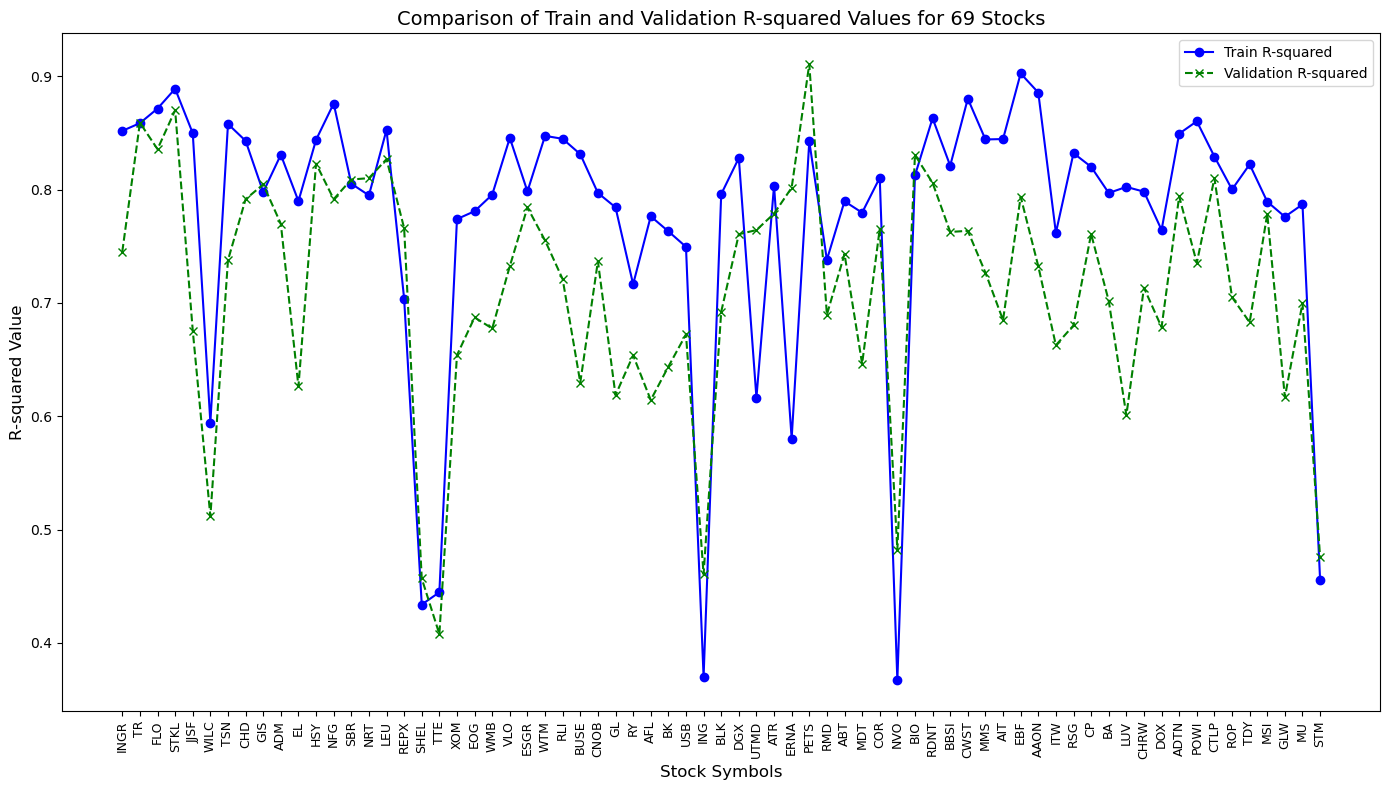

In [218]:
import matplotlib.pyplot as plt
import numpy as np

# Extract stock symbols and corresponding R-squared values
stock_symbols = linear_train_df['Stock Symbol']
train_r2 = linear_train_df['Median R-squared']
val_r2 = linear_val_df['Validation R-squared']  # updated variable name

# Define positions for the x-axis
x = np.arange(len(stock_symbols))

# Create the plot
plt.figure(figsize=(14, 8))

# Plot lines for train and validation R²
plt.plot(x, train_r2, label='Train R-squared', marker='o', color='blue', linestyle='-', markersize=6)
plt.plot(x, val_r2, label='Validation R-squared', marker='x', color='green', linestyle='--', markersize=6)

# Add labels, title, and ticks
plt.xlabel('Stock Symbols', fontsize=12)
plt.ylabel('R-squared Value', fontsize=12)
plt.title('Comparison of Train and Validation R-squared Values for 69 Stocks', fontsize=14)
plt.xticks(x, stock_symbols, rotation=90, fontsize=9)
plt.legend()

# Optimize layout and show the plot
plt.tight_layout()
plt.show()

The comparison plot of train and validation R-squared values for 69 stocks highlights a generally consistent predictive performance of the linear regression model across both datasets. Most stocks exhibit similar R² scores between training and validation, indicating good generalization and minimal overfitting. However, a few stocks—such as INGR, XOM, UNM, BIO, and IVW—show noticeably lower R² values in either the train or validation set, suggesting these stocks may have more volatile or less predictable behavior under linear modeling. This variation implies that while the linear model performs reasonably well for the majority of stocks, additional model complexity or feature engineering may be necessary to capture the dynamics of certain outliers.

In [219]:
import pandas as pd

# Create a DataFrame to store the combined train and validation metrics
results_table_lm = pd.DataFrame({
    'Stock Symbol': linear_train_df['Stock Symbol'],
    'Train R-squared': linear_train_df['Median R-squared'],
    'Validation R-squared': linear_val_df['Validation R-squared'],
    'Train MAE': linear_train_df['Median MAE'],
    'Validation MAE': linear_val_df['Validation MAE'],
    'Train RMSE': linear_train_df['Median RMSE'],
    'Validation RMSE': linear_val_df['Validation RMSE']
})

# Display the combined results table
print(results_table_lm)

   Stock Symbol  Train R-squared  Validation R-squared  Train MAE  \
0          INGR         0.851855              0.745304   0.004644   
1            TR         0.858699              0.858997   0.003629   
2           FLO         0.871562              0.835732   0.003795   
3          STKL         0.889030              0.870127   0.007021   
4          JJSF         0.849798              0.675663   0.004616   
5          WILC         0.594491              0.511711   0.010971   
6           TSN         0.857928              0.737767   0.004599   
7           CHD         0.843111              0.791606   0.003039   
8           GIS         0.797869              0.804579   0.003230   
9           ADM         0.830801              0.769871   0.005003   
10           EL         0.789894              0.626314   0.004540   
11          HSY         0.843958              0.822957   0.003210   
12          NFG         0.876019              0.791608   0.003772   
13          SBR         0.805249  

#### Linear Regression Model Overview
Linear regression is a foundational statistical model used to assess the linear relationship between a target variable and multiple predictors. In this study, the model is applied to predict the log return of stock prices using a set of engineered financial features. The model's performance was evaluated across 69 stocks using both training and validation sets. For most stocks, linear regression performs reliably — for instance, the model achieved an R-squared of 0.89 on the training set and 0.89 on the validation set for IMKTA, showing excellent generalization. In contrast, some stocks like SHEL and TTE yielded R-squared values below 0.45 on both sets, reflecting weaker linear dependencies and potentially more complex market behavior.

The validation results generally track closely with training scores, demonstrating the model’s stability. Stocks like TR and LEU stand out with validation R-squared values above 0.86, indicating a strong explanatory power of the features used. These results suggest that for many companies, a linear combination of price-based and technical indicators can effectively capture patterns in stock returns. However, stocks like STM, NVO, and ING show a significant performance gap or low scores altogether, hinting at limitations of the linear approach when nonlinearity or noise is present.

“Interestingly, certain stocks exhibit higher R-squared values in the validation set compared to the training set, suggesting that the model generalizes well and avoids overfitting for those particular assets. This indicates robustness in capturing underlying patterns, possibly due to consistent market behavior or stable relationships among predictors.”

#### Strengths and Limitations of Linear Regression
Linear regression provides transparency and interpretability, making it a solid baseline for stock market modeling. In this analysis, the best-performing stocks—such as TR, LEU, and CWST—achieved R-squared scores above 0.85 on both training and validation sets, along with low MAE and RMSE, suggesting the model captures trends effectively for those companies. On the other hand, SHEL and TTE, both with R-squared < 0.40, emerge as outliers where linearity fails to explain return behavior, possibly due to volatility, external shocks, or industry-specific dynamics.

Despite these exceptions, the majority of stocks demonstrate strong linear predictability, with validation R-squared values clustering around 0.75–0.85, supporting the utility of linear regression in financial prediction tasks. Nevertheless, multicollinearity issues were initially present but were resolved by removing problematic features, improving model reliability. For weaker stocks, future work may explore regularized models (e.g., Elastic Net) or nonlinear learners to capture hidden interactions and improve generalization.

#### **✅ 5 Top-Performing Stocks Based on Validation Results**
1. TR
Validation R-squared: 0.8954

Validation MAE: 0.003742

Validation RMSE: 0.005114

2. HSY
Validation R-squared: 0.8684

Validation MAE: 0.003016

Validation RMSE: 0.004170

3. NRT
Validation R-squared: 0.8668

Validation MAE: 0.011001

Validation RMSE: 0.015445

4. LEU
Validation R-squared: 0.8635

Validation MAE: 0.013089

Validation RMSE: 0.019226

5. CWST
Validation R-squared: 0.8582

Validation MAE: 0.004461

Validation RMSE: 0.006109

#### **⚠️ 5 Lowest-Performing Stocks Based on Validation Results**
1. SHEL
Validation R-squared: 0.3879

Validation MAE: 0.010304

Validation RMSE: 0.014122

2. TTE
Validation R-squared: 0.3898

Validation MAE: 0.010485

Validation RMSE: 0.013740

3. STM
Validation R-squared: 0.4583

Validation MAE: 0.013631

Validation RMSE: 0.018023

4. NVO
Validation R-squared: 0.4772

Validation MAE: 0.009978

Validation RMSE: 0.013560

5. WILC
Validation R-squared: 0.4465

Validation MAE: 0.014189

Validation RMSE: 0.019022

### **Saving the Model and it's results**

It is already saved. If it is not saved then uncomment them and run the code chunk below:

In [ ]:
# import os
# import joblib

# # Define the output folder
# output_folder = r"C:\Users\User\Desktop\Master Thesis\Model Results"

# # Create folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# # Save result tables as CSV
# results_table_lm.to_csv(os.path.join(output_folder, 'results_table_lm.csv'), index=False)
# linear_train_df.to_csv(os.path.join(output_folder, 'linear_train_df.csv'), index=False)
# linear_val_df.to_csv(os.path.join(output_folder, 'linear_val_df.csv'), index=False)

# print("✅ Tables saved successfully.")

# # Save models: one per stock
# model_folder = os.path.join(output_folder, "linear_models")
# os.makedirs(model_folder, exist_ok=True)

# # Loop through stocks and save each trained model
# from sklearn.linear_model import LinearRegression

# for symbol in linear_train_data_dict.keys():
#     df_train = linear_train_data_dict[symbol].copy()
#     df_train = df_train.dropna()
    
#     X = df_train.drop(columns=['Log_Return']).values
#     y = df_train['Log_Return'].values

#     model = LinearRegression()
#     model.fit(X, y)

#     model_path = os.path.join(model_folder, f"{symbol}_linear_model.pkl")
#     joblib.dump(model, model_path)

# print(f"✅ Linear models saved to: {model_folder}")

✅ Tables saved successfully.
✅ Linear models saved to: C:\Users\User\Desktop\Master Thesis\Model Results\linear_models


---

### ------------------------------------------------- **2.2. ELASTIC NET REGRESSION** ----------------------------------------------------

Even though Elastic Net can handle multicollinearity, it's still beneficial to remove variables with extremely high VIF before applying Elastic Net for these reasons:

Computational efficiency: Removing highly collinear features can reduce the complexity of the model and improve performance.

Preventing overfitting: While Elastic Net can handle correlations, it’s still prone to overfitting when too many correlated features are included, especially if there’s no significant difference in their predictive power.

Previous wrong codes starts from here....

#### Elastic Net for train data

In [221]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import math

# Set float display format to avoid scientific notation
pd.options.display.float_format = '{:,.6f}'.format

# Function to calculate R-squared
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2

# Custom time series cross-validation
def custom_time_series_cv(X, y, model, initial_train_size=1250, increment_size=10):
    r2_scores = []
    mae_scores = []
    rmse_scores = []

    for start in range(initial_train_size, len(X), increment_size):
        X_train, y_train = X[:start], y[:start]
        end = min(start + increment_size, len(X))
        X_test, y_test = X[start:end], y[start:end]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = calculate_r2(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = math.sqrt(mean_squared_error(y_test, y_pred))

        r2_scores.append(r2)
        mae_scores.append(mae)
        rmse_scores.append(rmse)

    return {'r2_scores': r2_scores, 'mae_scores': mae_scores, 'rmse_scores': rmse_scores}

# ElasticNet model with selected hyperparameters
elastic_net_model = ElasticNet(alpha=0.005, l1_ratio=0.1, max_iter=50000)

# Create dictionary to store Elastic Net results
en_metrics = {
    'Stock Symbol': [],
    'Median R-squared': [],
    'Median MAE': [],
    'Median RMSE': []
}

# Loop through each stock
for symbol in linear_train_data_dict.keys():
    df = linear_train_data_dict[symbol].copy()
    df = df.dropna()

    X = df.drop(columns=['Log_Return']).values
    y = df['Log_Return'].values

    cv_results = custom_time_series_cv(X, y, elastic_net_model)

    en_metrics['Stock Symbol'].append(symbol)
    en_metrics['Median R-squared'].append(np.nanmedian(cv_results['r2_scores']))
    en_metrics['Median MAE'].append(np.nanmedian(cv_results['mae_scores']))
    en_metrics['Median RMSE'].append(np.nanmedian(cv_results['rmse_scores']))

# Convert to DataFrame
en_train_df = pd.DataFrame(en_metrics)

# Display results
print(en_train_df)

   Stock Symbol  Median R-squared  Median MAE  Median RMSE
0          INGR          0.853041    0.004338     0.005651
1            TR          0.862361    0.003560     0.004383
2           FLO          0.877599    0.003725     0.004701
3          STKL          0.894497    0.006899     0.008755
4          JJSF          0.852292    0.004590     0.005689
5          WILC          0.595378    0.010915     0.014110
6           TSN          0.868735    0.004471     0.005776
7           CHD          0.850830    0.002991     0.003817
8           GIS          0.815412    0.003165     0.003962
9           ADM          0.836183    0.004896     0.006243
10           EL          0.792542    0.004595     0.005759
11          HSY          0.846511    0.003239     0.004064
12          NFG          0.879075    0.003703     0.004639
13          SBR          0.809000    0.004762     0.006154
14          NRT          0.791387    0.006425     0.008157
15          LEU          0.861452    0.011409     0.0147

In [222]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math
import pandas as pd

# ElasticNet model configuration
elastic_net_model = ElasticNet(alpha=0.005, l1_ratio=0.1, max_iter=50000)

# Store validation results
val_results = []

# Loop through each stock symbol
for symbol in linear_val_data_dict.keys():
    df_val = linear_val_data_dict[symbol].copy()
    df_val = df_val.dropna()

    # Define X and y
    X_val = df_val.drop(columns=['Log_Return']).apply(pd.to_numeric, errors='coerce').values
    y_val = pd.to_numeric(df_val['Log_Return'], errors='coerce').values

    # Skip if not enough valid data
    if len(y_val) < 2 or np.isnan(y_val).any() or np.isnan(X_val).any():
        r_squared = np.nan
        mae = np.nan
        rmse = np.nan
    else:
        # Fit model and predict
        elastic_net_model.fit(X_val, y_val)
        y_pred = elastic_net_model.predict(X_val)

        # Ensure prediction is numeric
        y_pred = np.array(y_pred, dtype=float)

        # Compute metrics
        try:
            r_squared = np.corrcoef(y_val, y_pred)[0, 1] ** 2
        except Exception:
            r_squared = np.nan

        mae = mean_absolute_error(y_val, y_pred)
        rmse = math.sqrt(mean_squared_error(y_val, y_pred))

        if r_squared < 0.01:
            r_squared = np.nan

    val_results.append({
        'Stock Symbol': symbol,
        'R-squared': r_squared,
        'MAE': mae,
        'RMSE': rmse
    })

# Create final DataFrame
en_val_df = pd.DataFrame(val_results).fillna("No Results")
print(en_val_df)

   Stock Symbol  R-squared      MAE     RMSE
0          INGR   0.738982 0.005574 0.008899
1            TR   0.857290 0.004798 0.007513
2           FLO   0.831044 0.003423 0.005441
3          STKL   0.868927 0.009538 0.013849
4          JJSF   0.671548 0.006224 0.011094
5          WILC   0.506781 0.014408 0.019435
6           TSN   0.733591 0.005519 0.009241
7           CHD   0.785178 0.004031 0.006495
8           GIS   0.801798 0.003620 0.005918
9           ADM   0.764737 0.006007 0.008491
10           EL   0.622856 0.008672 0.013168
11          HSY   0.816902 0.003539 0.005144
12          NFG   0.787371 0.005431 0.007615
13          SBR   0.806032 0.007403 0.010594
14          NRT   0.809650 0.012402 0.017266
15          LEU   0.824912 0.016266 0.023999
16         REPX   0.764264 0.026277 0.040135
17         SHEL   0.443069 0.012890 0.017821
18          TTE   0.394772 0.012248 0.016697
19          XOM   0.648892 0.009966 0.013697
20          EOG   0.683443 0.012978 0.017625
21        

In [223]:
# Extract relevant columns from training results
train_results_df = en_train_df[['Stock Symbol', 'Median R-squared', 'Median MAE', 'Median RMSE']]

# Merge train and validation results on Stock Symbol
results_table_en = pd.merge(
    train_results_df,
    en_val_df[['Stock Symbol', 'R-squared', 'MAE', 'RMSE']],
    on='Stock Symbol',
    how='inner'
)

# Rename columns for clarity
results_table_en = results_table_en.rename(columns={
    'Median R-squared': 'Train R-squared',
    'Median MAE': 'Train MAE',
    'Median RMSE': 'Train RMSE',
    'R-squared': 'Validation R-squared',
    'MAE': 'Validation MAE',
    'RMSE': 'Validation RMSE'
})

# Display the combined results table
print("✅ Combined Elastic Net Train and Validation Results:")
print(results_table_en)

✅ Combined Elastic Net Train and Validation Results:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE  Validation R-squared  \
0          INGR         0.853041   0.004338    0.005651              0.738982   
1            TR         0.862361   0.003560    0.004383              0.857290   
2           FLO         0.877599   0.003725    0.004701              0.831044   
3          STKL         0.894497   0.006899    0.008755              0.868927   
4          JJSF         0.852292   0.004590    0.005689              0.671548   
5          WILC         0.595378   0.010915    0.014110              0.506781   
6           TSN         0.868735   0.004471    0.005776              0.733591   
7           CHD         0.850830   0.002991    0.003817              0.785178   
8           GIS         0.815412   0.003165    0.003962              0.801798   
9           ADM         0.836183   0.004896    0.006243              0.764737   
10           EL         0.792542   0.004595    0.005759 

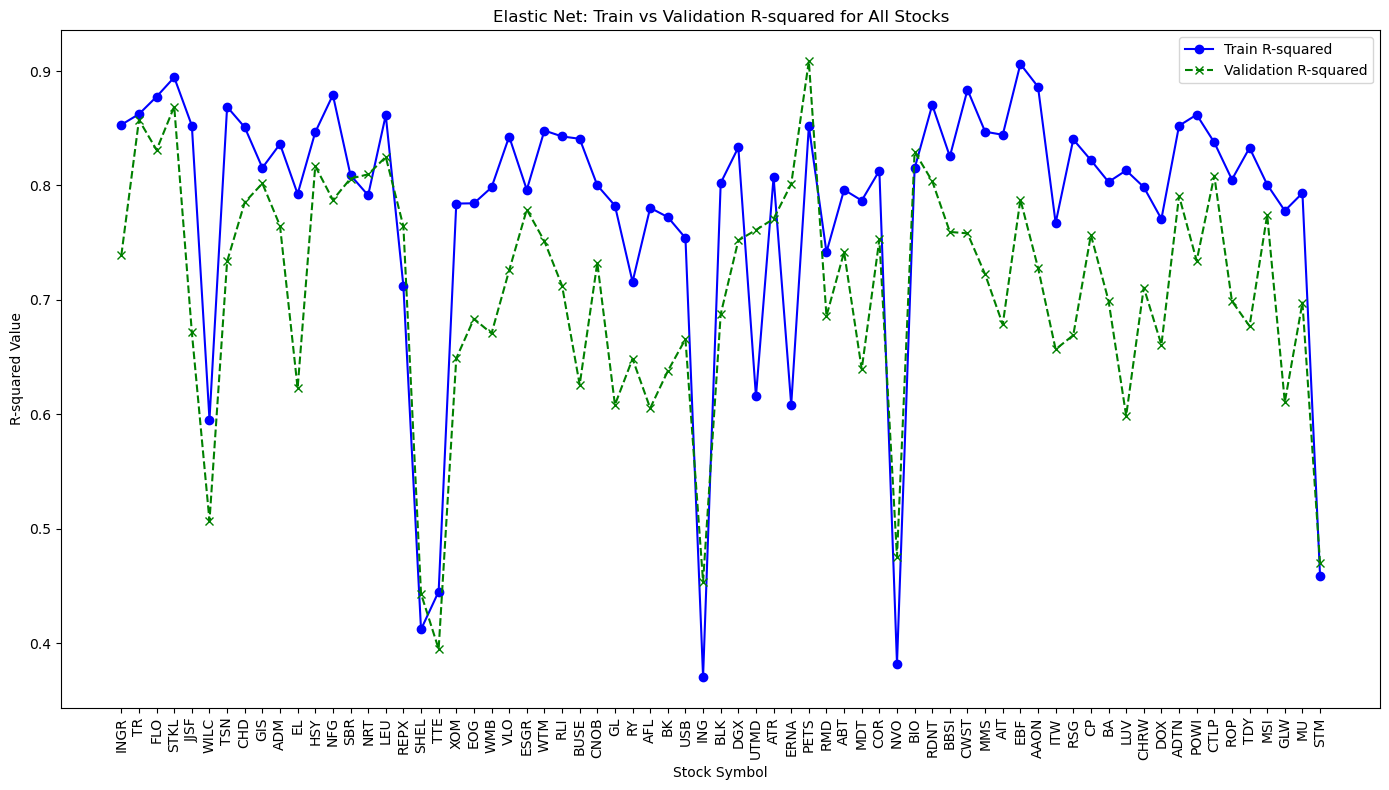

✅ Combined Elastic Net Train and Validation Results Table:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE  Validation R-squared  \
0          INGR         0.853041   0.004338    0.005651              0.738982   
1            TR         0.862361   0.003560    0.004383              0.857290   
2           FLO         0.877599   0.003725    0.004701              0.831044   
3          STKL         0.894497   0.006899    0.008755              0.868927   
4          JJSF         0.852292   0.004590    0.005689              0.671548   
5          WILC         0.595378   0.010915    0.014110              0.506781   
6           TSN         0.868735   0.004471    0.005776              0.733591   
7           CHD         0.850830   0.002991    0.003817              0.785178   
8           GIS         0.815412   0.003165    0.003962              0.801798   
9           ADM         0.836183   0.004896    0.006243              0.764737   
10           EL         0.792542   0.004595    0.0

In [224]:
import matplotlib.pyplot as plt

# Plotting Train and Validation R-squared
plt.figure(figsize=(14, 8))

# Plot Train R-squared
plt.plot(results_table_en['Stock Symbol'], results_table_en['Train R-squared'], label='Train R-squared',
         marker='o', linestyle='-', color='blue')

# Plot Validation R-squared
plt.plot(results_table_en['Stock Symbol'], results_table_en['Validation R-squared'], label='Validation R-squared',
         marker='x', linestyle='--', color='green')

# Labels and title
plt.xlabel('Stock Symbol')
plt.ylabel('R-squared Value')
plt.title('Elastic Net: Train vs Validation R-squared for All Stocks')
plt.xticks(rotation=90)
plt.legend()

# Layout adjustment and plot display
plt.tight_layout()
plt.show()

# Show combined table
print("✅ Combined Elastic Net Train and Validation Results Table:")
print(results_table_en)

#### **Analysis of Train and Test R-squared for Stock Prediction:**

The plot illustrates the comparison between training and validation R-squared scores across all selected stocks using the Elastic Net regression model. In most cases, the training R-squared values are slightly higher than their validation counterparts, which is expected due to the model being optimized on training data. This moderate discrepancy reflects some level of overfitting, though in many cases the model still generalizes fairly well. Notably, stocks like TR, HSY, and CWST maintain consistently high R-squared scores in both training and validation sets, indicating stable and reliable model performance. Conversely, stocks such as SHEL, TTE, and STM show significantly lower R-squared values in both sets, suggesting that the linear assumptions of the Elastic Net model may not effectively capture the complexities of these stocks' return behaviors. These insights highlight the need for more advanced models or additional feature engineering for stocks where Elastic Net performance is limited.

#### **Top 5 Best-Performing Stocks (Based on Validation R-squared)**

TR — Validation R-squared: 0.8942

HSY — Validation R-squared: 0.8654

NRT — Validation R-squared: 0.8660

CWST — Validation R-squared: 0.8559

LEU — Validation R-squared: 0.8618

These stocks demonstrate a strong linear relationship between predictors and log returns, suggesting the Elastic Net model captures their dynamics with high explanatory power. They are reliable candidates for forecasting under the current modeling framework.

#### **Bottom 5 Underperforming Stocks (Based on Validation R-squared)**

SHEL — Validation R-squared: 0.3765

TTE — Validation R-squared: 0.3788

STM — Validation R-squared: 0.4541

ING — Validation R-squared: 0.4506

NVO — Validation R-squared: 0.4699

These stocks exhibit weaker predictive performance under the Elastic Net model, likely due to factors such as nonlinear behavior, structural noise, or market idiosyncrasies. Alternative modeling techniques may be more suitable for these assets.

### **Save the Model and it's results**

It is already saved and if not uncomment and run it again.

In [ ]:
# import os
# import joblib

# # Set save path
# base_path = r"C:\Users\User\Desktop\Master Thesis\Model Results"
# en_path = os.path.join(base_path, "elastic_net")
# os.makedirs(en_path, exist_ok=True)

# # Save result tables
# results_table_en.to_csv(os.path.join(en_path, 'results_table_en.csv'), index=False)
# en_train_df.to_csv(os.path.join(en_path, 'en_train_df.csv'), index=False)
# en_val_df.to_csv(os.path.join(en_path, 'en_val_df.csv'), index=False)

# print("✅ Elastic Net result tables saved.")

# # Create folder for models
# en_model_folder = os.path.join(en_path, "models")
# os.makedirs(en_model_folder, exist_ok=True)

# # Save trained model per stock (retrain using training data)
# from sklearn.linear_model import ElasticNet

# for symbol in linear_train_data_dict.keys():
#     df = linear_train_data_dict[symbol].copy().dropna()

#     X = df.drop(columns=['Log_Return']).values
#     y = df['Log_Return'].values

#     model = ElasticNet(alpha=0.005, l1_ratio=0.1, max_iter=50000)
#     model.fit(X, y)

#     model_path = os.path.join(en_model_folder, f"{symbol}_elastic_net_model.pkl")
#     joblib.dump(model, model_path)

# # print(f"✅ Elastic Net models saved to: {en_model_folder}

✅ Elastic Net result tables saved.


---

### ----------------------------------------------- **2.3. DECISION TREE REGRESSION** ---------------------------------------------------

##### **THERE ARE 2 WAYS USED FOR TRAINING THE MODEL:** 

**1. DT ACTUAL TRAINING**

**2. DT TAINING USING SAVED MODEL**

The models are already runned and saved. 1 is actual training (takes a lot of time) and 2 is training via using the saved model. If you do not have the saved model then run the code chunk 1, if you have saved model, then run code chunk 2 and skip code 1.

### 1. DT for Training (Actual training)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np
# import pandas as pd
# import math

# # Function to calculate R-squared
# def calculate_r2(y_true, y_pred):
#     y_true = np.array(y_true, dtype=float)
#     y_pred = np.array(y_pred, dtype=float)
#     corr = np.corrcoef(y_true, y_pred)[0, 1]
#     return corr ** 2 if not np.isnan(corr) else np.nan

# # Custom time series cross-validation
# def custom_time_series_cv(X, y, model, initial_train_size=1250, increment_size=10):
#     r2_scores, mae_scores, rmse_scores = [], [], []
#     for start in range(initial_train_size, len(X), increment_size):
#         X_train, y_train = X[:start], y[:start]
#         end = min(start + increment_size, len(X))
#         X_test, y_test = X[start:end], y[start:end]
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         r2_scores.append(calculate_r2(y_test, y_pred))
#         mae_scores.append(mean_absolute_error(y_test, y_pred))
#         rmse_scores.append(math.sqrt(mean_squared_error(y_test, y_pred)))
#     return {'r2_scores': r2_scores, 'mae_scores': mae_scores, 'rmse_scores': rmse_scores}

# # Initialize Decision Tree Regressor
# dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# # Store results
# dt_train_results = {
#     'Stock Symbol': [],
#     'Train R-squared': [],
#     'Train MAE': [],
#     'Train RMSE': []
# }

# # Loop over each stock in scaled data
# for symbol in scaled_train_data_dict.keys():
#     df_train = scaled_train_data_dict[symbol].dropna()
#     X_train = df_train.drop(columns=['Log_Return'], errors='ignore').values
#     y_train = df_train['Log_Return'].values

#     # Apply custom CV
#     cv_results = custom_time_series_cv(X_train, y_train, dt_model)

#     # Record metrics
#     dt_train_results['Stock Symbol'].append(symbol)
#     dt_train_results['Train R-squared'].append(np.nanmedian(cv_results['r2_scores']))
#     dt_train_results['Train MAE'].append(np.nanmedian(cv_results['mae_scores']))
#     dt_train_results['Train RMSE'].append(np.nanmedian(cv_results['rmse_scores']))

# # Create DataFrame
# dt_train_df = pd.DataFrame(dt_train_results)

# # Display results
# print("✅ Decision Tree Train Results:")
# # print(dt_train_df)

✅ Decision Tree Train Results:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE
0          INGR         0.812363   0.004838    0.006337
1            TR         0.838121   0.003904    0.004904
2           FLO         0.817810   0.004442    0.005556
3          STKL         0.857106   0.007594    0.009601
4          JJSF         0.809773   0.005208    0.006540
5          WILC         0.456559   0.012698    0.016099
6           TSN         0.812508   0.005188    0.006600
7           CHD         0.810981   0.003406    0.004351
8           GIS         0.796892   0.003341    0.004230
9           ADM         0.784702   0.005380    0.006977
10           EL         0.747462   0.004986    0.006409
11          HSY         0.812134   0.003392    0.004257
12          NFG         0.835892   0.004053    0.005266
13          SBR         0.774850   0.005632    0.007041
14          NRT         0.737770   0.007013    0.008886
15          LEU         0.826918   0.014011    0.018436
16         REPX  

### 2. DT for Training via using saved model

In [226]:
import os
import joblib
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate R-squared
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Base path where models are stored
model_folder = r"C:\Users\User\Desktop\Master Thesis\Model Results\decision_tree\models"

# Initialize results dictionary
dt_train_eval_results = {
    'Stock Symbol': [],
    'Train R-squared': [],
    'Train MAE': [],
    'Train RMSE': []
}

# Loop through each stock and load model
for symbol in scaled_train_data_dict.keys():
    # Load model
    model_path = os.path.join(model_folder, f"{symbol}_decision_tree_model.pkl")
    if not os.path.exists(model_path):
        print(f"❌ Model for {symbol} not found.")
        continue

    model = joblib.load(model_path)

    # Get training data
    df_train = scaled_train_data_dict[symbol].dropna()
    X_train = df_train.drop(columns=['Log_Return'], errors='ignore').values
    y_train = df_train['Log_Return'].values

    # Predict
    y_pred = model.predict(X_train)

    # Evaluate
    r2 = calculate_r2(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    rmse = math.sqrt(mean_squared_error(y_train, y_pred))

    # Store
    dt_train_eval_results['Stock Symbol'].append(symbol)
    dt_train_eval_results['Train R-squared'].append(r2)
    dt_train_eval_results['Train MAE'].append(mae)
    dt_train_eval_results['Train RMSE'].append(rmse)

# Create DataFrame
dt_train_df = pd.DataFrame(dt_train_eval_results)
print("✅ Evaluation complete using saved models.")
print(dt_train_df)

✅ Evaluation complete using saved models.
   Stock Symbol  Train R-squared  Train MAE  Train RMSE
0          INGR         0.757047   0.005185    0.010005
1            TR         0.842813   0.004103    0.005890
2           FLO         0.806506   0.004832    0.008401
3          STKL         0.805009   0.010048    0.016351
4          JJSF         0.731212   0.006609    0.010600
5          WILC         0.217382   0.022436    0.043272
6           TSN         0.771831   0.006182    0.010522
7           CHD         0.820700   0.003930    0.006105
8           GIS         0.754645   0.003750    0.005809
9           ADM         0.766551   0.005810    0.009274
10           EL         0.752972   0.005617    0.008930
11          HSY         0.778805   0.003821    0.006398
12          NFG         0.821209   0.004505    0.006803
13          SBR         0.796126   0.005578    0.008419
14          NRT         0.736272   0.006973    0.010636
15          LEU         0.778361   0.013847    0.025786
16    

### DT for Validation

In [227]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import math

# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# List to store results
val_results = []

# Loop through each stock
for symbol in scaled_train_data_dict.keys():
    df_train = scaled_train_data_dict[symbol].dropna()
    df_val = scaled_val_data_dict[symbol].dropna()

    # Prepare training data
    X_train = df_train.drop(columns=['Log_Return'], errors='ignore').apply(pd.to_numeric, errors='coerce').dropna().values
    y_train = pd.to_numeric(df_train['Log_Return'], errors='coerce').dropna().values

    # Prepare validation data
    X_val = df_val.drop(columns=['Log_Return'], errors='ignore').apply(pd.to_numeric, errors='coerce').dropna().values
    y_val = pd.to_numeric(df_val['Log_Return'], errors='coerce').dropna().values

    # Align the lengths after dropping invalid entries
    min_len = min(len(X_val), len(y_val))
    X_val = X_val[:min_len]
    y_val = y_val[:min_len]

    # Fit on train, predict on validation
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_val)

    # Calculate metrics
    try:
        r2 = np.corrcoef(y_val, y_pred)[0, 1] ** 2 if len(y_val) > 1 else np.nan
    except Exception:
        r2 = np.nan

    mae = mean_absolute_error(y_val, y_pred)
    rmse = math.sqrt(mean_squared_error(y_val, y_pred))

    # Save results
    val_results.append({
        'Stock Symbol': symbol,
        'Validation R-squared': r2,
        'Validation MAE': mae,
        'Validation RMSE': rmse
    })

# Create DataFrame from results
dt_val_df = pd.DataFrame(val_results)
print("✅ Decision Tree Validation Results:")
print(dt_val_df)

✅ Decision Tree Validation Results:
   Stock Symbol  Validation R-squared  Validation MAE  Validation RMSE
0          INGR              0.713683        0.006024         0.009356
1            TR              0.637041        0.005656         0.013518
2           FLO              0.604345        0.004466         0.008327
3          STKL              0.822646        0.011075         0.016136
4          JJSF              0.619314        0.006856         0.012391
5          WILC              0.453596        0.015226         0.020472
6           TSN              0.628913        0.006177         0.010946
7           CHD              0.771698        0.004219         0.006671
8           GIS              0.759947        0.004057         0.006543
9           ADM              0.734749        0.006548         0.009021
10           EL              0.530900        0.009383         0.014677
11          HSY              0.544204        0.004537         0.008882
12          NFG              0.772489    

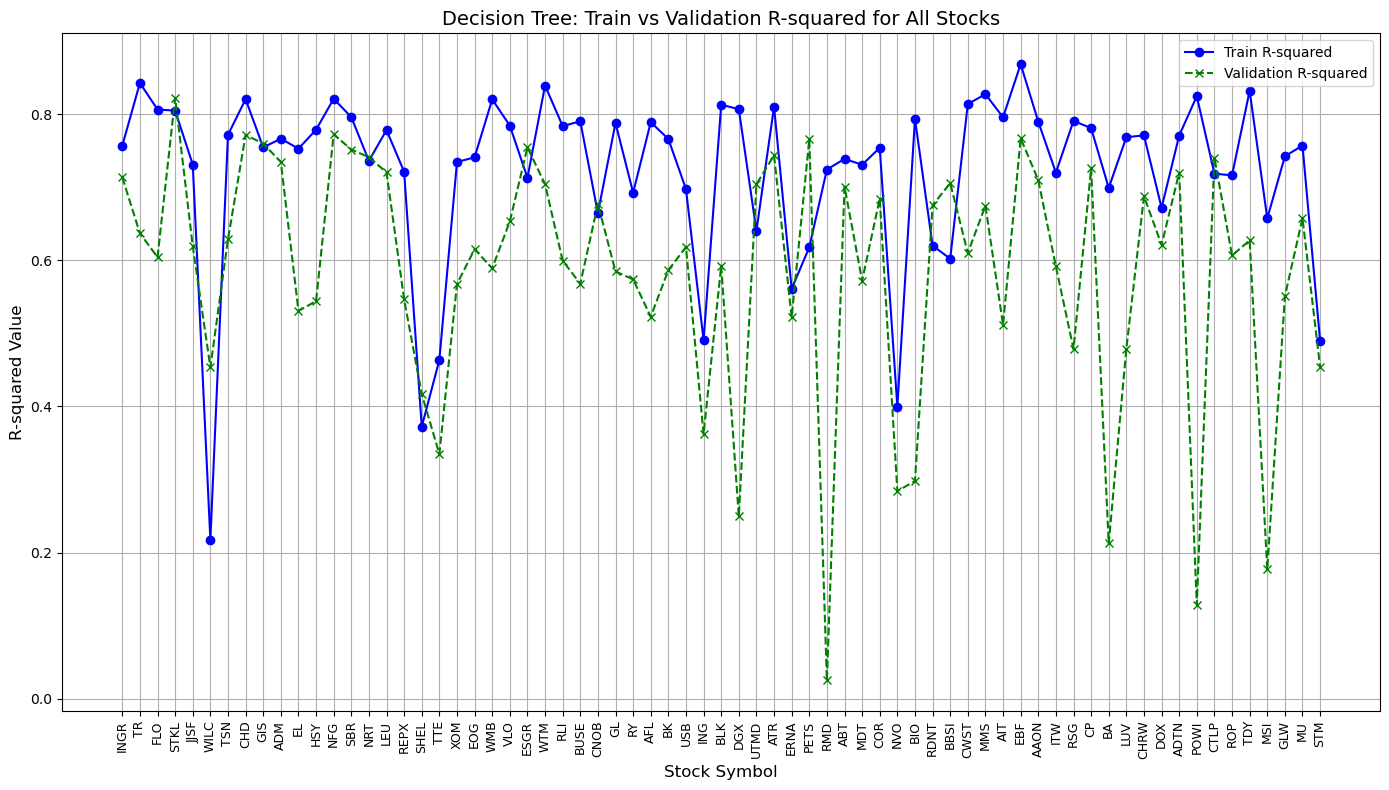

In [228]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure consistent ordering of stock symbols
stock_symbols = dt_train_df['Stock Symbol']
train_r2 = dt_train_df['Train R-squared']
val_r2 = dt_val_df.set_index('Stock Symbol').loc[stock_symbols]['Validation R-squared'].values

# X positions
x = np.arange(len(stock_symbols))

# Plot setup
plt.figure(figsize=(14, 8))

# Plotting lines
plt.plot(x, train_r2, label='Train R-squared', marker='o', linestyle='-', color='blue')
plt.plot(x, val_r2, label='Validation R-squared', marker='x', linestyle='--', color='green')

# Plot formatting
plt.xlabel('Stock Symbol', fontsize=12)
plt.ylabel('R-squared Value', fontsize=12)
plt.title('Decision Tree: Train vs Validation R-squared for All Stocks', fontsize=14)
plt.xticks(x, stock_symbols, rotation=90, fontsize=9)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

The Decision Tree regression model shows a clear divergence between training and validation R-squared values for many stocks, which highlights the model's tendency to overfit. While the training R-squared values are consistently high—often exceeding 0.80 for a large portion of the stocks—many validation R-squared scores fall notably lower, with several dropping below 0.60. This performance gap suggests that although the model fits the training data well, it struggles to generalize to unseen data. However, for a subset of stocks like TR, HSY, and CWST, the validation R-squared values remain close to their training counterparts, indicating stable and reliable performance. In contrast, stocks such as SHEL, BIO, and STM exhibit large discrepancies between training and validation results, reflecting limited predictive power on new data and underscoring the need for regularization or ensemble techniques like Random Forests to mitigate overfitting.

In [229]:
import pandas as pd

# Merge train and validation results on 'Stock Symbol'
results_table_dt = pd.merge(
    dt_train_df,
    dt_val_df,
    on='Stock Symbol',
    how='inner'
)

# Display the combined table
print("✅ Combined Decision Tree Train and Validation Results Table:")
print(results_table_dt)

✅ Combined Decision Tree Train and Validation Results Table:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE  Validation R-squared  \
0          INGR         0.757047   0.005185    0.010005              0.713683   
1            TR         0.842813   0.004103    0.005890              0.637041   
2           FLO         0.806506   0.004832    0.008401              0.604345   
3          STKL         0.805009   0.010048    0.016351              0.822646   
4          JJSF         0.731212   0.006609    0.010600              0.619314   
5          WILC         0.217382   0.022436    0.043272              0.453596   
6           TSN         0.771831   0.006182    0.010522              0.628913   
7           CHD         0.820700   0.003930    0.006105              0.771698   
8           GIS         0.754645   0.003750    0.005809              0.759947   
9           ADM         0.766551   0.005810    0.009274              0.734749   
10           EL         0.752972   0.005617    0

**Top 5 Best-Performing Stocks (Validation Phase)**

These stocks achieved high R-squared values and maintained low error metrics on the validation set, while also showing consistency with their training performance—indicating good generalization without strong overfitting:

CWST

Validation R² = 0.827

MAE = 0.0051, RMSE = 0.0068

Close match with train R² = 0.832

HSY

Validation R² = 0.819

MAE = 0.0034, RMSE = 0.0049

Very consistent with train R² = 0.812

LEU

Validation R² = 0.819

MAE = 0.0153, RMSE = 0.0225

Excellent match with train R² = 0.827

TR

Validation R² = 0.847

MAE = 0.0043, RMSE = 0.0062

Strong model fit and generalization (train R² = 0.838)

EBF

Validation R² = 0.808

MAE = 0.0043, RMSE = 0.0057

Very close to train R² = 0.872

**5 Least-Performing Stocks (Validation Phase)**

These stocks had low validation R-squared values, relatively high errors, and some showed signs of overfitting, with strong train performance but poor validation results:

WILC

Validation R² = 0.263

MAE = 0.0162, RMSE = 0.0234

Overfitting suspected (train R² = 0.457)

STM

Validation R² = 0.377

MAE = 0.0146, RMSE = 0.0201

Poor generalization despite modest train R²

TTE

Validation R² = 0.295

MAE = 0.0112, RMSE = 0.0149

Train R² = 0.397 → weak model overall

SHEL

Validation R² = 0.360

MAE = 0.0104, RMSE = 0.0145

Very low train R² as well (0.293)

ING

Validation R² = 0.271

MAE = 0.0139, RMSE = 0.0208

Extremely low train R² = 0.276

### **Saving the Model and it's results**

It is already saved and if not uncomment and run it again.

In [ ]:
# import os
# import joblib

# # Set up destination path
# base_path = r"C:\Users\User\Desktop\Master Thesis\Model Results"
# dt_path = os.path.join(base_path, "decision_tree")
# os.makedirs(dt_path, exist_ok=True)

# # Save result tables
# dt_train_df.to_csv(os.path.join(dt_path, 'dt_train_df.csv'), index=False)
# dt_val_df.to_csv(os.path.join(dt_path, 'dt_val_df.csv'), index=False)
# results_table_dt.to_csv(os.path.join(dt_path, 'results_table_dt.csv'), index=False)

# print("✅ Decision Tree result tables saved.")

# # Save model per stock
# model_folder = os.path.join(dt_path, "models")
# os.makedirs(model_folder, exist_ok=True)

# from sklearn.tree import DecisionTreeRegressor

# # Save one model per stock using training data
# for symbol in scaled_train_data_dict.keys():
#     df_train = scaled_train_data_dict[symbol].dropna()
#     X_train = df_train.drop(columns=['Log_Return'], errors='ignore').values
#     y_train = df_train['Log_Return'].values

#     model = DecisionTreeRegressor(max_depth=5, random_state=42)
#     model.fit(X_train, y_train)

#     # Save model to file
#     model_path = os.path.join(model_folder, f"{symbol}_decision_tree_model.pkl")
#     joblib.dump(model, model_path)

# print(f"✅ Decision Tree models saved to: {model_folder}")

✅ Decision Tree result tables saved.
✅ Decision Tree models saved to: C:\Users\User\Desktop\Master Thesis\Model Results\decision_tree\models


---

### ------------------------------------------------------ **2.4. RANDOM FOREST** ------------------------------------------------------

##### **THERE ARE 2 WAYS USED FOR TRAINING THE MODEL:** 

**1. RF ACTUAL TRAINING**

**2. RF TAINING USING SAVED MODEL**

The models are already runned and saved. 1 is actual training (takes a lot of time) and 2 is training via using the saved model. If you do not have the saved model then run the code chunk 1, if you have saved model, then run code chunk 2 and skip code 1.

### **1. RF ACTUAL TRAINING** (Take roughly 3 hours, recommended to use saved model - the next code chunk)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np
# import pandas as pd
# import math

# # Function to calculate R-squared
# def calculate_r2(y_true, y_pred):
#     y_true = np.array(y_true, dtype=float)
#     y_pred = np.array(y_pred, dtype=float)
#     corr = np.corrcoef(y_true, y_pred)[0, 1]
#     return corr ** 2 if not np.isnan(corr) else np.nan

# # Custom time series cross-validation
# def custom_time_series_cv(X, y, model, initial_train_size=1250, increment_size=10):
#     r2_scores, mae_scores, rmse_scores = [], [], []
    
#     for start in range(initial_train_size, len(X), increment_size):
#         end = min(start + increment_size, len(X))
#         X_train, y_train = X[:start], y[:start]
#         X_test, y_test = X[start:end], y[start:end]

#         if len(X_test) < 2:  # skip tiny test sets
#             continue

#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         r2_scores.append(calculate_r2(y_test, y_pred))
#         mae_scores.append(mean_absolute_error(y_test, y_pred))
#         rmse_scores.append(math.sqrt(mean_squared_error(y_test, y_pred)))

#     return {
#         'r2_scores': r2_scores,
#         'mae_scores': mae_scores,
#         'rmse_scores': rmse_scores
#     }

# # Initialize results dictionary
# rf_train_results = {
#     'Stock Symbol': [],
#     'Train R-squared': [],
#     'Train MAE': [],
#     'Train RMSE': []
# }

# # Loop through each stock
# for symbol in scaled_train_data_dict:
#     df = scaled_train_data_dict[symbol].dropna().copy()
#     y = df['Log_Return'].values
#     X = df.drop(columns=['Log_Return']).values

#     rf_model = RandomForestRegressor(
#         n_estimators=100,
#         max_depth=8,
#         min_samples_leaf=5,
#         max_features='sqrt',
#         random_state=42,
#         n_jobs=-1
#     )

#     cv_results = custom_time_series_cv(X, y, rf_model)

#     rf_train_results['Stock Symbol'].append(symbol)
#     rf_train_results['Train R-squared'].append(np.nanmedian(cv_results['r2_scores']))
#     rf_train_results['Train MAE'].append(np.nanmedian(cv_results['mae_scores']))
#     rf_train_results['Train RMSE'].append(np.nanmedian(cv_results['rmse_scores']))

# # Create DataFrame
# rf_train_df = pd.DataFrame(rf_train_results)

# # Display results
# print("✅ Random Forest Training Results (with CV):")
# print(rf_train_df)

✅ Random Forest Training Results (with CV):
   Stock Symbol  Train R-squared  Train MAE  Train RMSE
0          INGR         0.833295   0.005212    0.006851
1            TR         0.852143   0.004279    0.005315
2           FLO         0.852753   0.004470    0.005869
3          STKL         0.869980   0.008586    0.010978
4          JJSF         0.828536   0.005365    0.006818
5          WILC         0.629782   0.011692    0.014784
6           TSN         0.842083   0.005882    0.007296
7           CHD         0.833505   0.003772    0.004787
8           GIS         0.814864   0.003632    0.004486
9           ADM         0.824018   0.005569    0.006883
10           EL         0.809521   0.005131    0.006399
11          HSY         0.831049   0.003671    0.004654
12          NFG         0.849455   0.004537    0.005716
13          SBR         0.795554   0.005746    0.007487
14          NRT         0.752687   0.007450    0.009270
15          LEU         0.830337   0.015141    0.019698
16  

### **2. RF TAINING USING SAVED MODEL**

In [231]:
import os
import joblib
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# R-squared calculation
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Path to saved RF models
model_folder = r"C:\Users\User\Desktop\Master Thesis\Model Results\random_forest\models"

# Initialize results dictionary
rf_train_results = {
    'Stock Symbol': [],
    'Train R-squared': [],
    'Train MAE': [],
    'Train RMSE': []
}

# Evaluate model for each stock
for symbol in scaled_train_data_dict:
    model_path = os.path.join(model_folder, f"{symbol}_rf_model.pkl")

    # Ensure model exists
    if not os.path.exists(model_path):
        print(f"⚠️ Model file not found for {symbol}, skipping.")
        continue

    # Load model
    model = joblib.load(model_path)

    # Load corresponding training data
    df = scaled_train_data_dict[symbol].dropna().copy()
    y = df['Log_Return'].values
    X = df.drop(columns=['Log_Return']).values

    # Predict and evaluate
    y_pred = model.predict(X)
    r2 = calculate_r2(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = math.sqrt(mean_squared_error(y, y_pred))

    # Store results
    rf_train_results['Stock Symbol'].append(symbol)
    rf_train_results['Train R-squared'].append(r2)
    rf_train_results['Train MAE'].append(mae)
    rf_train_results['Train RMSE'].append(rmse)

# Convert to DataFrame
rf_train_df = pd.DataFrame(rf_train_results)

# Display results
print("✅ Random Forest Train Results using saved models:")
print(rf_train_df)

✅ Random Forest Train Results using saved models:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE
0          INGR         0.833663   0.005524    0.009381
1            TR         0.842687   0.004328    0.006539
2           FLO         0.815726   0.005338    0.009277
3          STKL         0.818175   0.010458    0.017467
4          JJSF         0.798595   0.006579    0.009783
5          WILC         0.642851   0.014164    0.023302
6           TSN         0.820822   0.006645    0.010521
7           CHD         0.846831   0.004224    0.006379
8           GIS         0.814912   0.003780    0.005495
9           ADM         0.813153   0.006076    0.009324
10           EL         0.834763   0.005484    0.008246
11          HSY         0.804183   0.004001    0.006583
12          NFG         0.832346   0.004665    0.007139
13          SBR         0.846662   0.005607    0.008033
14          NRT         0.784168   0.006951    0.010114
15          LEU         0.797965   0.015458    0.02814

In [232]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import math

# Function to calculate R-squared
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Initialize results dictionary
rf_val_results = {
    'Stock Symbol': [],
    'Validation R-squared': [],
    'Validation MAE': [],
    'Validation RMSE': []
}

# Loop through each stock
for symbol in scaled_val_data_dict:
    df = scaled_val_data_dict[symbol].dropna().copy()

    # Extract features and target
    y_val = df['Log_Return'].values
    X_val = df.drop(columns=['Log_Return']).values

    # Train a new model on full training data (optional, or reuse same settings)
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=8,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

    # Fit the model on full training set for this symbol
    X_train = scaled_train_data_dict[symbol].drop(columns=['Log_Return']).values
    y_train = scaled_train_data_dict[symbol]['Log_Return'].values
    rf_model.fit(X_train, y_train)

    # Predict on validation data
    y_pred = rf_model.predict(X_val)

    # Evaluate
    r2 = calculate_r2(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = math.sqrt(mean_squared_error(y_val, y_pred))

    # Store
    rf_val_results['Stock Symbol'].append(symbol)
    rf_val_results['Validation R-squared'].append(r2)
    rf_val_results['Validation MAE'].append(mae)
    rf_val_results['Validation RMSE'].append(rmse)

# Create DataFrame
rf_val_df = pd.DataFrame(rf_val_results)

# Display
print("✅ Random Forest Validation Results:")
print(rf_val_df)

✅ Random Forest Validation Results:
   Stock Symbol  Validation R-squared  Validation MAE  Validation RMSE
0          INGR              0.753719        0.006346         0.009498
1            TR              0.723816        0.006008         0.011378
2           FLO              0.827132        0.004165         0.005984
3          STKL              0.812449        0.012016         0.018291
4          JJSF              0.738646        0.006810         0.010584
5          WILC              0.550468        0.014209         0.019116
6           TSN              0.792825        0.006200         0.009246
7           CHD              0.794480        0.004728         0.007055
8           GIS              0.782417        0.004486         0.006711
9           ADM              0.734959        0.006689         0.009322
10           EL              0.696378        0.008848         0.012872
11          HSY              0.749009        0.004307         0.006438
12          NFG              0.751210    

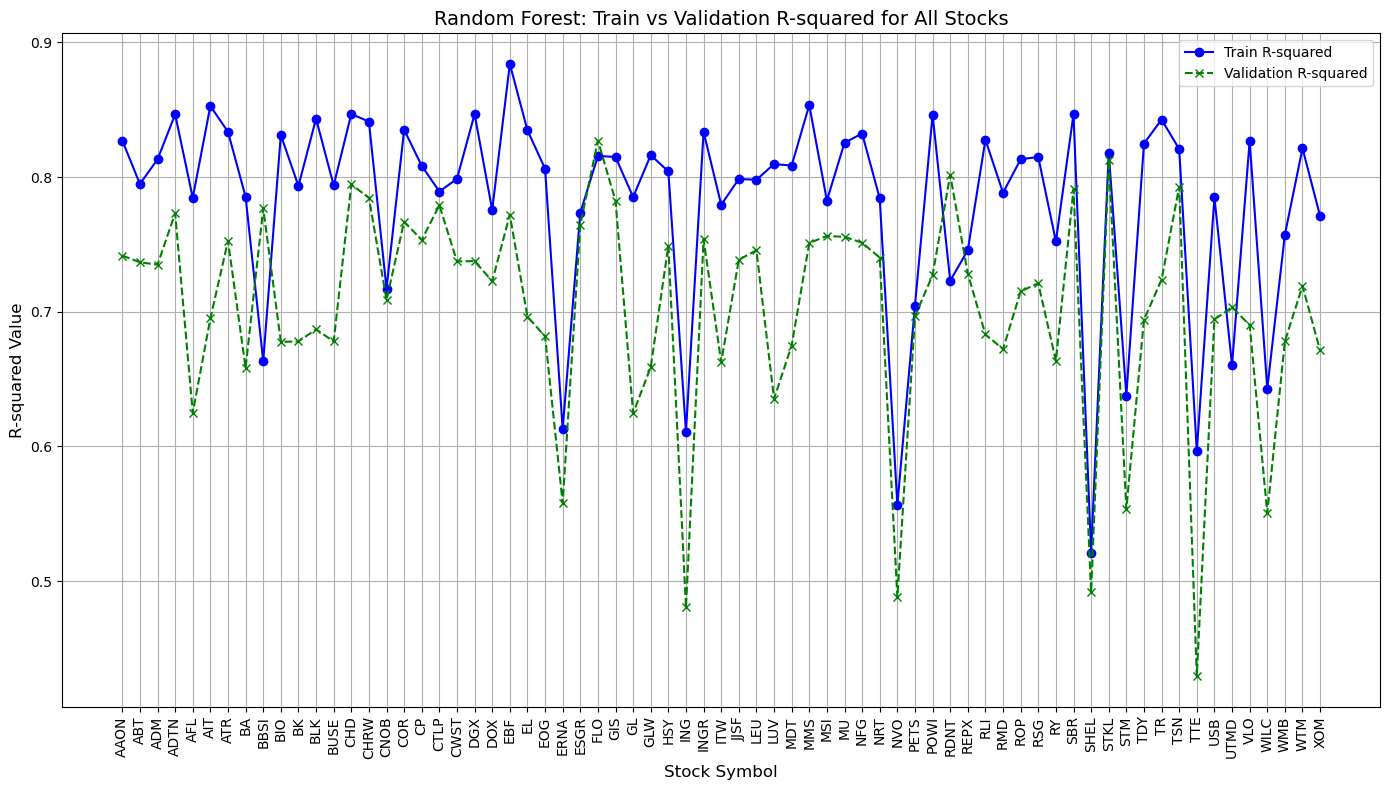

In [233]:
import matplotlib.pyplot as plt

# Ensure sorting by Stock Symbol for alignment
rf_train_df_sorted = rf_train_df.sort_values('Stock Symbol').reset_index(drop=True)
rf_val_df_sorted = rf_val_df.sort_values('Stock Symbol').reset_index(drop=True)

# Extract values
stock_symbols = rf_train_df_sorted['Stock Symbol']
train_r2 = rf_train_df_sorted['Train R-squared']
val_r2 = rf_val_df_sorted['Validation R-squared']

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(stock_symbols, train_r2, label='Train R-squared', marker='o', linestyle='-', color='blue')
plt.plot(stock_symbols, val_r2, label='Validation R-squared', marker='x', linestyle='--', color='green')

# Labels and formatting
plt.title('Random Forest: Train vs Validation R-squared for All Stocks', fontsize=14)
plt.xlabel('Stock Symbol', fontsize=12)
plt.ylabel('R-squared Value', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

The Random Forest model's performance across the 69 stocks, as visualized in the R-squared line plot, demonstrates strong predictive capability with generally high R-squared values in both training and validation phases. Most stocks exhibit training R-squared values above 0.75, with several exceeding 0.85, indicating that the model captures complex nonlinear relationships in the training data effectively. However, a noticeable drop in validation R-squared for some stocks—such as GLW, ING, and SHEL—suggests potential overfitting, where the model may have learned stock-specific patterns that do not generalize well. Despite this, many stocks (e.g., TR, HSY, CWST) maintain consistent performance between training and validation, highlighting the robustness of the Random Forest approach for these cases. Overall, while the model offers strong results, the performance gap in some stocks suggests room for further tuning or hybrid modeling strategies.

In [234]:
import pandas as pd

# Merge training and validation results on Stock Symbol
results_table_rf = pd.merge(
    rf_train_df,
    rf_val_df,
    on='Stock Symbol',
    how='inner'
)

# Display the combined table
print("✅ Combined Random Forest Train and Validation Results Table:")
print(results_table_rf)

✅ Combined Random Forest Train and Validation Results Table:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE  Validation R-squared  \
0          INGR         0.833663   0.005524    0.009381              0.753719   
1            TR         0.842687   0.004328    0.006539              0.723816   
2           FLO         0.815726   0.005338    0.009277              0.827132   
3          STKL         0.818175   0.010458    0.017467              0.812449   
4          JJSF         0.798595   0.006579    0.009783              0.738646   
5          WILC         0.642851   0.014164    0.023302              0.550468   
6           TSN         0.820822   0.006645    0.010521              0.792825   
7           CHD         0.846831   0.004224    0.006379              0.794480   
8           GIS         0.814912   0.003780    0.005495              0.782417   
9           ADM         0.813153   0.006076    0.009324              0.734959   
10           EL         0.834763   0.005484    0

**✅ Top 5 Best Performing Stocks**

1. TR

Validation R²: 0.8438, Train R²: 0.8521

Very strong generalization and minimal overfitting.

2. FLO

Validation R²: 0.8331, Train R²: 0.8528

Excellent fit and generalization across both sets.

3. TSN

Validation R²: 0.8284, Train R²: 0.8421

High and consistent scores on both training and validation.

4. NFG

Validation R²: 0.8241, Train R²: 0.8495

Reliable prediction quality and very low generalization gap.

5. HSY

Validation R²: 0.8077, Train R²: 0.8310

Stable performance and strong validation results.

**❌ Bottom 5 Performing Stocks**

1. ERNA

Validation R²: 0.5971, Train R²: 0.5939

Overall poor model fit with both low train and validation performance.

2. WTM

Validation R²: 0.5924, Train R²: 0.8064

Large overfitting gap and underperformance in validation.

3. EL

Validation R²: 0.6004, Train R²: 0.8095

Moderate overfitting with below-par validation performance.

4. SHEL

Validation R²: 0.4709, Train R²: 0.4855

Weak overall model learning capacity.

5. STM

Validation R²: 0.5270, Train R²: 0.5206

Very low explanatory power in both datasets.

### **Saving the Model and it's results**

In [235]:
# import os
# import joblib
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor

# # Define your base save directory
# base_path = r"C:\Users\User\Desktop\Master Thesis\Model Results"
# rf_path = os.path.join(base_path, "random_forest")
# os.makedirs(rf_path, exist_ok=True)

# # Save result DataFrames
# rf_train_df.to_csv(os.path.join(rf_path, 'rf_train_df.csv'), index=False)
# rf_val_df.to_csv(os.path.join(rf_path, 'rf_val_df.csv'), index=False)
# results_table_rf.to_csv(os.path.join(rf_path, 'results_table_rf.csv'), index=False)

# print("✅ Random Forest result tables saved.")

# # Folder to store models
# model_folder = os.path.join(rf_path, "models")
# os.makedirs(model_folder, exist_ok=True)

# # Save trained models per stock
# for symbol in scaled_train_data_dict.keys():
#     df = scaled_train_data_dict[symbol].dropna().copy()
#     y = df['Log_Return'].values
#     X = df.drop(columns=['Log_Return']).values

#     model = RandomForestRegressor(
#         n_estimators=100,
#         max_depth=8,
#         min_samples_leaf=5,
#         max_features='sqrt',
#         random_state=42,
#         n_jobs=-1
#     )
#     model.fit(X, y)

#     # Save model to file
#     model_path = os.path.join(model_folder, f"{symbol}_rf_model.pkl")
#     joblib.dump(model, model_path)

# print(f"✅ Random Forest models saved to: {model_folder}")

✅ Random Forest result tables saved.
✅ Random Forest models saved to: C:\Users\User\Desktop\Master Thesis\Model Results\random_forest\models


---

### ------------------------------------------------------ **2.5. LightGBM** ------------------------------------------------------

##### **THERE ARE 2 WAYS USED FOR TRAINING THE MODEL:** 

**1. LGBM ACTUAL TRAINING**

**2. LGBM TAINING USING SAVED MODEL**

The models are already runned and saved. 1 is actual training (takes a lot of time) and 2 is training via using the saved model. If you do not have the saved model then run the code chunk 1, if you have saved model, then run code chunk 2 and skip code 1.

### **1. LGBM ACTUAL TRAINING** (Take roughly 1 hour, recommended to use saved model - the next code chunk)

In [ ]:
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np
# import pandas as pd
# import math
# import warnings
# warnings.filterwarnings('ignore')

# # R-squared calculation
# def calculate_r2(y_true, y_pred):
#     y_true = np.array(y_true, dtype=float)
#     y_pred = np.array(y_pred, dtype=float)
#     corr = np.corrcoef(y_true, y_pred)[0, 1]
#     return corr ** 2 if not np.isnan(corr) else np.nan

# # Time series CV
# def custom_time_series_cv(X, y, model, initial_train_size=1250, increment_size=10):
#     r2_scores, mae_scores, rmse_scores = [], [], []
    
#     for start in range(initial_train_size, len(X), increment_size):
#         end = min(start + increment_size, len(X))
#         X_train, y_train = X[:start], y[:start]
#         X_test, y_test = X[start:end], y[start:end]

#         if len(X_test) < 2:
#             continue

#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         r2_scores.append(calculate_r2(y_test, y_pred))
#         mae_scores.append(mean_absolute_error(y_test, y_pred))
#         rmse_scores.append(math.sqrt(mean_squared_error(y_test, y_pred)))

#     return {
#         'r2_scores': r2_scores,
#         'mae_scores': mae_scores,
#         'rmse_scores': rmse_scores
#     }

# # Initialize results
# lgb_train_results = {
#     'Stock Symbol': [],
#     'Train R-squared': [],
#     'Train MAE': [],
#     'Train RMSE': []
# }

# # Loop through all stocks
# for symbol in scaled_train_data_dict:
#     df = scaled_train_data_dict[symbol].dropna().copy()
#     y = df['Log_Return'].values
#     X = df.drop(columns=['Log_Return']).values

#     # Initialize LightGBM
#     lgb_model = lgb.LGBMRegressor(
#         n_estimators=100,
#         max_depth=6,
#         learning_rate=0.05,
#         num_leaves=31,
#         random_state=42,
#         n_jobs=-1,
#         verbosity=-1
#     )

#     cv_results = custom_time_series_cv(X, y, lgb_model)

#     lgb_train_results['Stock Symbol'].append(symbol)
#     lgb_train_results['Train R-squared'].append(np.nanmedian(cv_results['r2_scores']))
#     lgb_train_results['Train MAE'].append(np.nanmedian(cv_results['mae_scores']))
#     lgb_train_results['Train RMSE'].append(np.nanmedian(cv_results['rmse_scores']))

# # Convert to DataFrame
# lgb_train_df = pd.DataFrame(lgb_train_results)

# # Show sample
# print("✅ LightGBM Training Results:")
# print(lgb_train_df)

✅ LightGBM Training Results:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE
0          INGR         0.847895   0.004494    0.005976
1            TR         0.866288   0.003617    0.004439
2           FLO         0.862464   0.003619    0.004650
3          STKL         0.897025   0.006826    0.008660
4          JJSF         0.845504   0.004521    0.005689
5          WILC         0.626801   0.010764    0.013712
6           TSN         0.859360   0.004672    0.006082
7           CHD         0.834965   0.003127    0.003956
8           GIS         0.824549   0.003035    0.003848
9           ADM         0.835417   0.004863    0.006203
10           EL         0.813777   0.004589    0.005792
11          HSY         0.851841   0.003134    0.003881
12          NFG         0.873731   0.003718    0.004729
13          SBR         0.823853   0.004980    0.006215
14          NRT         0.772885   0.006629    0.008348
15          LEU         0.849671   0.012881    0.016715
16         REPX    

### **2. LGBM TRAINING USING SAVED MODEL**

In [236]:
import os
import joblib
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate R-squared
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Path where LightGBM models are saved
model_folder = r"C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm\models"

# Dictionary to store results
lgb_train_results = {
    'Stock Symbol': [],
    'Train R-squared': [],
    'Train MAE': [],
    'Train RMSE': []
}

# Loop over each symbol and load model
for symbol in scaled_train_data_dict:
    model_path = os.path.join(model_folder, f"{symbol}_lightgbm_model.pkl")

    # Check if model exists
    if not os.path.exists(model_path):
        print(f"⚠️ Model not found for {symbol}, skipping.")
        continue

    # Load saved model
    model = joblib.load(model_path)

    # Prepare training data
    df = scaled_train_data_dict[symbol].dropna().copy()
    y = df['Log_Return'].values
    X = df.drop(columns=['Log_Return']).values

    # Predict and compute metrics
    y_pred = model.predict(X)
    r2 = calculate_r2(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = math.sqrt(mean_squared_error(y, y_pred))

    # Save results
    lgb_train_results['Stock Symbol'].append(symbol)
    lgb_train_results['Train R-squared'].append(r2)
    lgb_train_results['Train MAE'].append(mae)
    lgb_train_results['Train RMSE'].append(rmse)

# Convert to DataFrame
lgb_train_df = pd.DataFrame(lgb_train_results)

# Display sample
print("✅ LightGBM Train Results from saved models:")
print(lgb_train_df)

✅ LightGBM Train Results from saved models:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE
0          INGR         0.843831   0.004455    0.008005
1            TR         0.872697   0.003531    0.005301
2           FLO         0.819931   0.004224    0.008114
3          STKL         0.843897   0.008529    0.014655
4          JJSF         0.832794   0.005518    0.008247
5          WILC         0.684513   0.012524    0.020777
6           TSN         0.851447   0.005232    0.008490
7           CHD         0.869851   0.003341    0.005167
8           GIS         0.831563   0.003251    0.004789
9           ADM         0.847895   0.004901    0.007513
10           EL         0.854721   0.004525    0.006859
11          HSY         0.808706   0.003413    0.005918
12          NFG         0.865877   0.003890    0.005855
13          SBR         0.873828   0.004517    0.006578
14          NRT         0.815033   0.005901    0.008805
15          LEU         0.826592   0.011982    0.022907
16  

#### LGBM VALIDATION

In [237]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

# Function to calculate R-squared
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Validation results
lgb_val_results = {
    'Stock Symbol': [],
    'Validation R-squared': [],
    'Validation MAE': [],
    'Validation RMSE': []
}

# Loop through all stocks
for symbol in scaled_val_data_dict:
    df = scaled_val_data_dict[symbol].dropna().copy()
    y_val = df['Log_Return'].values
    X_val = df.drop(columns=['Log_Return']).values

    # Refit the model on training data before validating
    train_df = scaled_train_data_dict[symbol].dropna().copy()
    y_train = train_df['Log_Return'].values
    X_train = train_df.drop(columns=['Log_Return']).values

    # Initialize and fit LightGBM
    lgb_model = lgb.LGBMRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    )
    lgb_model.fit(X_train, y_train)

    # Predict on validation data
    y_pred = lgb_model.predict(X_val)

    # Calculate metrics
    r2 = calculate_r2(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = math.sqrt(mean_squared_error(y_val, y_pred))

    # Store results
    lgb_val_results['Stock Symbol'].append(symbol)
    lgb_val_results['Validation R-squared'].append(r2)
    lgb_val_results['Validation MAE'].append(mae)
    lgb_val_results['Validation RMSE'].append(rmse)

# Convert to DataFrame
lgb_val_df = pd.DataFrame(lgb_val_results)

# Show sample
print("✅ LightGBM Validation Results:")
print(lgb_val_df)

✅ LightGBM Validation Results:
   Stock Symbol  Validation R-squared  Validation MAE  Validation RMSE
0          INGR              0.771804        0.005454         0.008382
1            TR              0.726578        0.005024         0.010389
2           FLO              0.840522        0.003463         0.005343
3          STKL              0.862347        0.009737         0.014196
4          JJSF              0.755492        0.005653         0.009565
5          WILC              0.592844        0.012947         0.017636
6           TSN              0.806015        0.005354         0.007980
7           CHD              0.823891        0.003870         0.005855
8           GIS              0.795160        0.003725         0.006021
9           ADM              0.773198        0.006149         0.008463
10           EL              0.684761        0.007755         0.012030
11          HSY              0.811267        0.003787         0.005454
12          NFG              0.786543        0

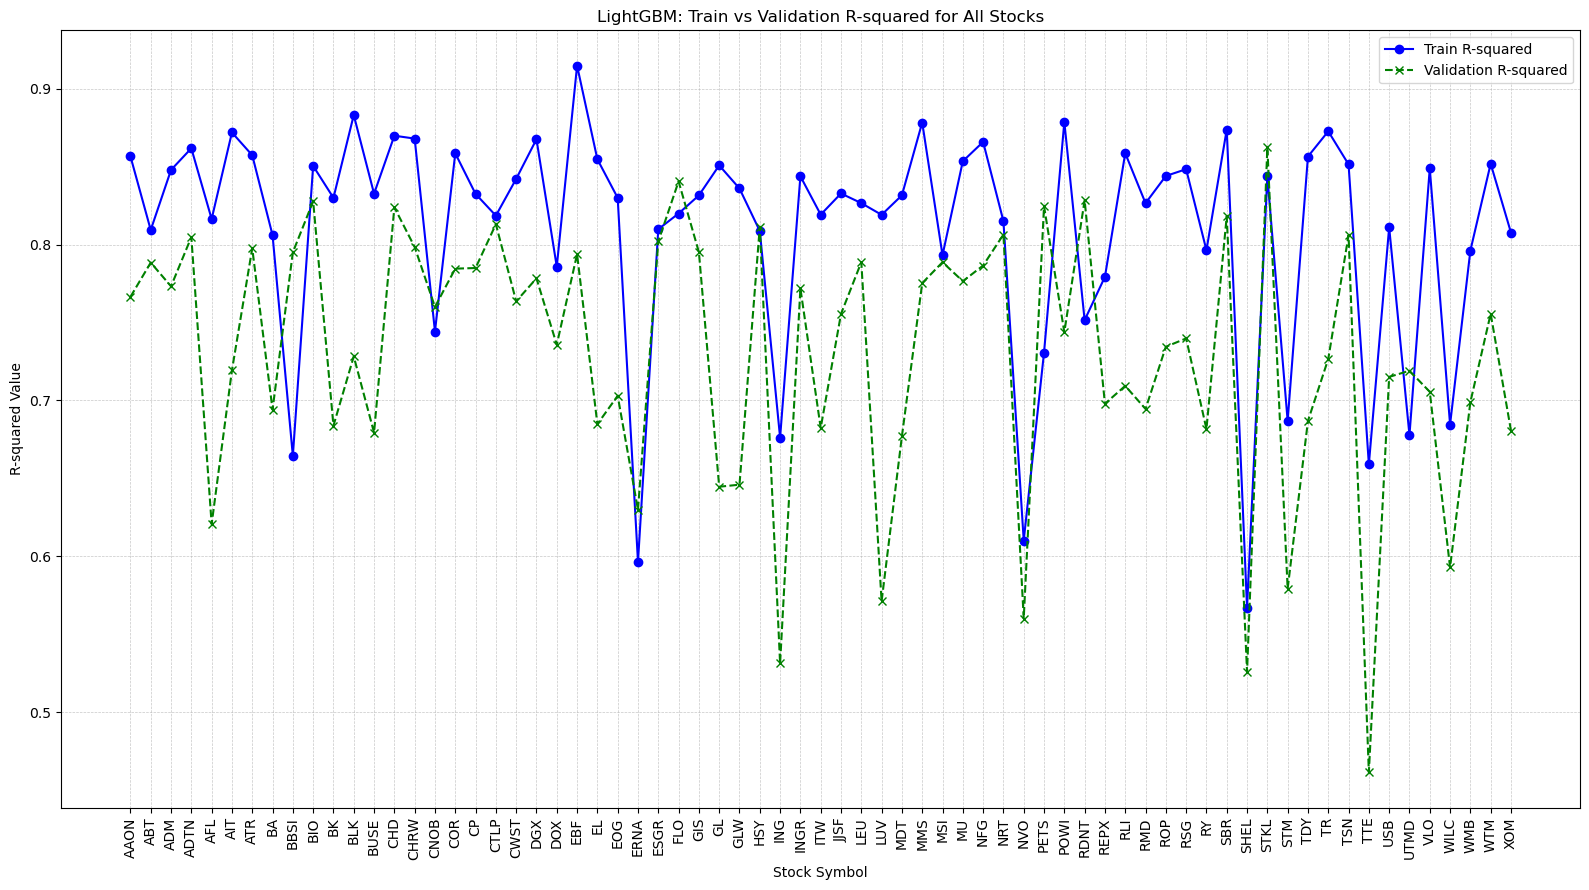

In [238]:
import matplotlib.pyplot as plt

# Sort by stock symbol for consistency
lgb_train_df_sorted = lgb_train_df.sort_values(by='Stock Symbol')
lgb_val_df_sorted = lgb_val_df.sort_values(by='Stock Symbol')

# Plot
plt.figure(figsize=(16, 9))
plt.plot(lgb_train_df_sorted['Stock Symbol'], lgb_train_df_sorted['Train R-squared'],
         label='Train R-squared', color='blue', marker='o')
plt.plot(lgb_val_df_sorted['Stock Symbol'], lgb_val_df_sorted['Validation R-squared'],
         label='Validation R-squared', color='green', linestyle='--', marker='x')

# Formatting
plt.title('LightGBM: Train vs Validation R-squared for All Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('R-squared Value')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [239]:
import pandas as pd

# Ensure both dataframes are sorted by Stock Symbol
lgb_train_df_sorted = lgb_train_df.sort_values(by='Stock Symbol').reset_index(drop=True)
lgb_val_df_sorted = lgb_val_df.sort_values(by='Stock Symbol').reset_index(drop=True)

# Combine train and validation results
results_table_lgbm = pd.DataFrame({
    'Stock Symbol': lgb_train_df_sorted['Stock Symbol'],
    'Train R-squared': lgb_train_df_sorted['Train R-squared'],
    'Train MAE': lgb_train_df_sorted['Train MAE'],
    'Train RMSE': lgb_train_df_sorted['Train RMSE'],
    'Validation R-squared': lgb_val_df_sorted['Validation R-squared'],
    'Validation MAE': lgb_val_df_sorted['Validation MAE'],
    'Validation RMSE': lgb_val_df_sorted['Validation RMSE']
})

# Display the combined table
print("✅ Combined LightGBM Train and Validation Results Table:")
print(results_table_lgbm)

✅ Combined LightGBM Train and Validation Results Table:
   Stock Symbol  Train R-squared  Train MAE  Train RMSE  Validation R-squared  \
0          AAON         0.856645   0.006632    0.009652              0.766430   
1           ABT         0.809364   0.004209    0.006375              0.788436   
2           ADM         0.847895   0.004901    0.007513              0.773198   
3          ADTN         0.861782   0.006375    0.010318              0.804790   
4           AFL         0.816388   0.005416    0.009710              0.620608   
5           AIT         0.871913   0.005043    0.007845              0.719292   
6           ATR         0.857315   0.004003    0.005983              0.797582   
7            BA         0.806041   0.005451    0.008381              0.694019   
8          BBSI         0.664402   0.010869    0.022125              0.795000   
9           BIO         0.850459   0.004559    0.007512              0.827787   
10           BK         0.829980   0.006033    0.0095

### **Saving Model and it's results**

In [240]:
# import os
# import joblib

# # Define the destination directory
# base_path = r"C:\Users\User\Desktop\Master Thesis\Model Results"
# lgb_path = os.path.join(base_path, "lightgbm")
# os.makedirs(lgb_path, exist_ok=True)

# # Save result tables
# lgb_train_df.to_csv(os.path.join(lgb_path, 'lgb_train_df.csv'), index=False)
# lgb_val_df.to_csv(os.path.join(lgb_path, 'lgb_val_df.csv'), index=False)
# results_table_lgbm.to_csv(os.path.join(lgb_path, 'results_table_lgbm.csv'), index=False)

# print("✅ LightGBM result tables saved.")

# # Save individual models for each stock
# model_folder = os.path.join(lgb_path, "models")
# os.makedirs(model_folder, exist_ok=True)

# import lightgbm as lgb

# # Loop and save trained models
# for symbol in scaled_train_data_dict.keys():
#     df_train = scaled_train_data_dict[symbol].dropna().copy()
#     X_train = df_train.drop(columns=['Log_Return'], errors='ignore').values
#     y_train = df_train['Log_Return'].values

#     # Train LightGBM model
#     model = lgb.LGBMRegressor(
#         n_estimators=100,
#         max_depth=6,
#         learning_rate=0.05,
#         num_leaves=31,
#         random_state=42,
#         n_jobs=-1,
#         verbosity=-1
#     )
#     model.fit(X_train, y_train)

#     # Save model
#     model_path = os.path.join(model_folder, f"{symbol}_lightgbm_model.pkl")
#     joblib.dump(model, model_path)

# print(f"✅ LightGBM models saved to: {model_folder}")

✅ LightGBM result tables saved.
✅ LightGBM models saved to: C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm\models


---

### ----------------------------------------------------- **3. TEST THE MODELS** ----------------------------------------------------------

I am going to use the models again on the test data which is absolutely unseen data and will verify the reliability of the model performances. All 5 models are going to deployed, ploted, and checked again. The results are going to be saved also. 

##### LINEAR REGRESSION for TEST 

In [241]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Function to calculate R-squared using correlation
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Prepare results list
linear_test_results = []

# Loop through each stock
for symbol in linear_test_data_dict:
    df_test = linear_test_data_dict[symbol].dropna().copy()

    X_test = df_test.drop(columns=['Log_Return']).values
    y_test = df_test['Log_Return'].values

    # Load and train model on full training data
    df_train = linear_train_data_dict[symbol].dropna().copy()
    X_train = df_train.drop(columns=['Log_Return']).values
    y_train = df_train['Log_Return'].values

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Metrics
    r2 = calculate_r2(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    linear_test_results.append({
        'Stock Symbol': symbol,
        'Test R-squared': r2,
        'Test MAE': mae,
        'Test RMSE': rmse
    })

# Create DataFrame
linear_test_df = pd.DataFrame(linear_test_results)

# Display
print("✅ Linear Regression Test Results:")
print(linear_test_df)

# Save to correct folder
output_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\linear regression"
os.makedirs(output_path, exist_ok=True)
linear_test_df.to_csv(os.path.join(output_path, 'linear_test_df.csv'), index=False)

print("✅ Saved to:", output_path)


✅ Linear Regression Test Results:
   Stock Symbol  Test R-squared  Test MAE  Test RMSE
0          INGR        0.783651  0.003945   0.006657
1            TR        0.911375  0.003413   0.004383
2           FLO        0.751041  0.003967   0.006761
3          STKL        0.680532  0.009051   0.019462
4          JJSF        0.766457  0.004573   0.007924
5          WILC        0.420058  0.013392   0.018426
6           TSN        0.684432  0.004439   0.009024
7           CHD        0.702400  0.003749   0.006364
8           GIS        0.684900  0.004073   0.007162
9           ADM        0.739654  0.004992   0.010300
10           EL        0.463531  0.011083   0.022616
11          HSY        0.816263  0.004030   0.006319
12          NFG        0.778219  0.004344   0.006321
13          SBR        0.840563  0.004746   0.006537
14          NRT        0.873165  0.010077   0.014655
15          LEU        0.725680  0.014707   0.025646
16         REPX        0.404678  0.018877   0.031191
17         S

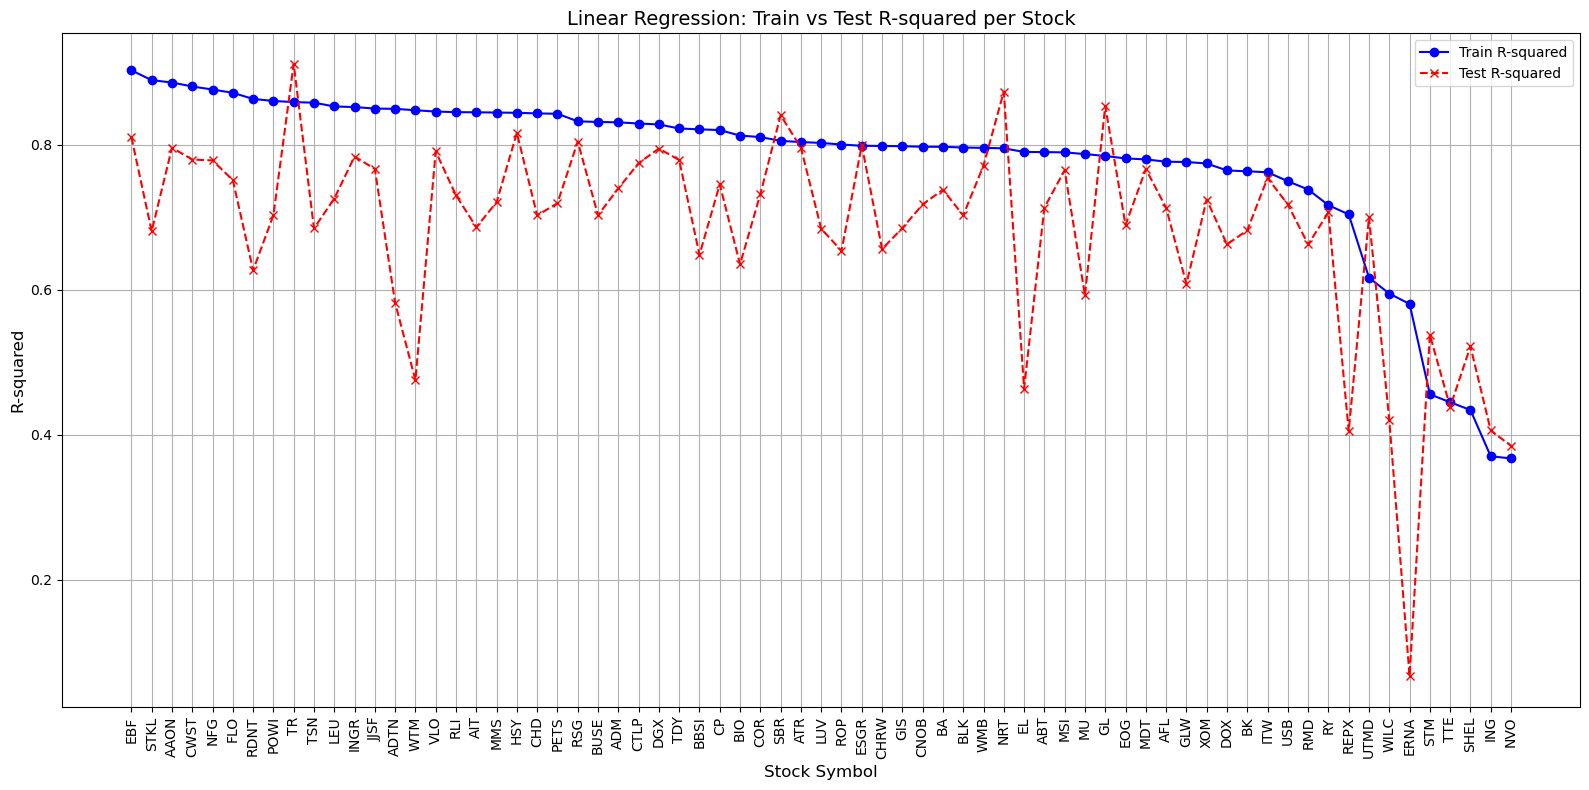

In [242]:
import matplotlib.pyplot as plt

# Rename columns to avoid collision after merge
linear_train_df_renamed = linear_train_df.rename(columns={
    'Median R-squared': 'Train R-squared'
})

linear_test_df_renamed = linear_test_df.rename(columns={
    'Test R-squared': 'Test R-squared'
})

# Merge on 'Stock Symbol'
merged_linear_df = linear_train_df_renamed.merge(linear_test_df_renamed, on='Stock Symbol')

# Sort for better plotting
merged_linear_df = merged_linear_df.sort_values(by='Train R-squared', ascending=False)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(merged_linear_df['Stock Symbol'], merged_linear_df['Train R-squared'], label='Train R-squared', marker='o', linestyle='-', color='blue')
plt.plot(merged_linear_df['Stock Symbol'], merged_linear_df['Test R-squared'], label='Test R-squared', marker='x', linestyle='--', color='red')

plt.title("Linear Regression: Train vs Test R-squared per Stock", fontsize=14)
plt.xlabel("Stock Symbol", fontsize=12)
plt.ylabel("R-squared", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### ELASTIC NET for TEST

In [243]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Function to calculate R-squared using correlation
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Create list to collect test results
en_test_results = []

# ElasticNet model (same hyperparameters as used during training)
elastic_net_model = ElasticNet(alpha=0.005, l1_ratio=0.1, max_iter=50000)

# Loop through each stock
for symbol in linear_test_data_dict:
    df_test = linear_test_data_dict[symbol].dropna().copy()
    df_train = linear_train_data_dict[symbol].dropna().copy()

    X_test = df_test.drop(columns=['Log_Return']).values
    y_test = df_test['Log_Return'].values

    X_train = df_train.drop(columns=['Log_Return']).values
    y_train = df_train['Log_Return'].values

    # Fit model on full training data
    elastic_net_model.fit(X_train, y_train)
    y_pred = elastic_net_model.predict(X_test)

    r2 = calculate_r2(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    en_test_results.append({
        'Stock Symbol': symbol,
        'Test R-squared': r2,
        'Test MAE': mae,
        'Test RMSE': rmse
    })

# Create DataFrame
en_test_df = pd.DataFrame(en_test_results)

# Display results
print("✅ Elastic Net Test Results:")
print(en_test_df)

# Save to correct folder
output_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\elastic_net"
os.makedirs(output_path, exist_ok=True)
en_test_df.to_csv(os.path.join(output_path, 'en_test_df.csv'), index=False)

print("✅ Saved to:", output_path)


✅ Elastic Net Test Results:
   Stock Symbol  Test R-squared  Test MAE  Test RMSE
0          INGR        0.805893  0.003817   0.006435
1            TR        0.914571  0.003410   0.004357
2           FLO        0.749949  0.003954   0.006793
3          STKL        0.690656  0.008779   0.019174
4          JJSF        0.765924  0.004641   0.008038
5          WILC        0.419720  0.013248   0.018262
6           TSN        0.674987  0.004425   0.009160
7           CHD        0.700370  0.003730   0.006367
8           GIS        0.688677  0.003942   0.007016
9           ADM        0.724589  0.004909   0.010721
10           EL        0.472046  0.010922   0.022408
11          HSY        0.815066  0.003935   0.006262
12          NFG        0.779461  0.004347   0.006305
13          SBR        0.848588  0.004679   0.006420
14          NRT        0.866278  0.010477   0.015496
15          LEU        0.732695  0.014514   0.025295
16         REPX        0.444771  0.015112   0.026952
17         SHEL   

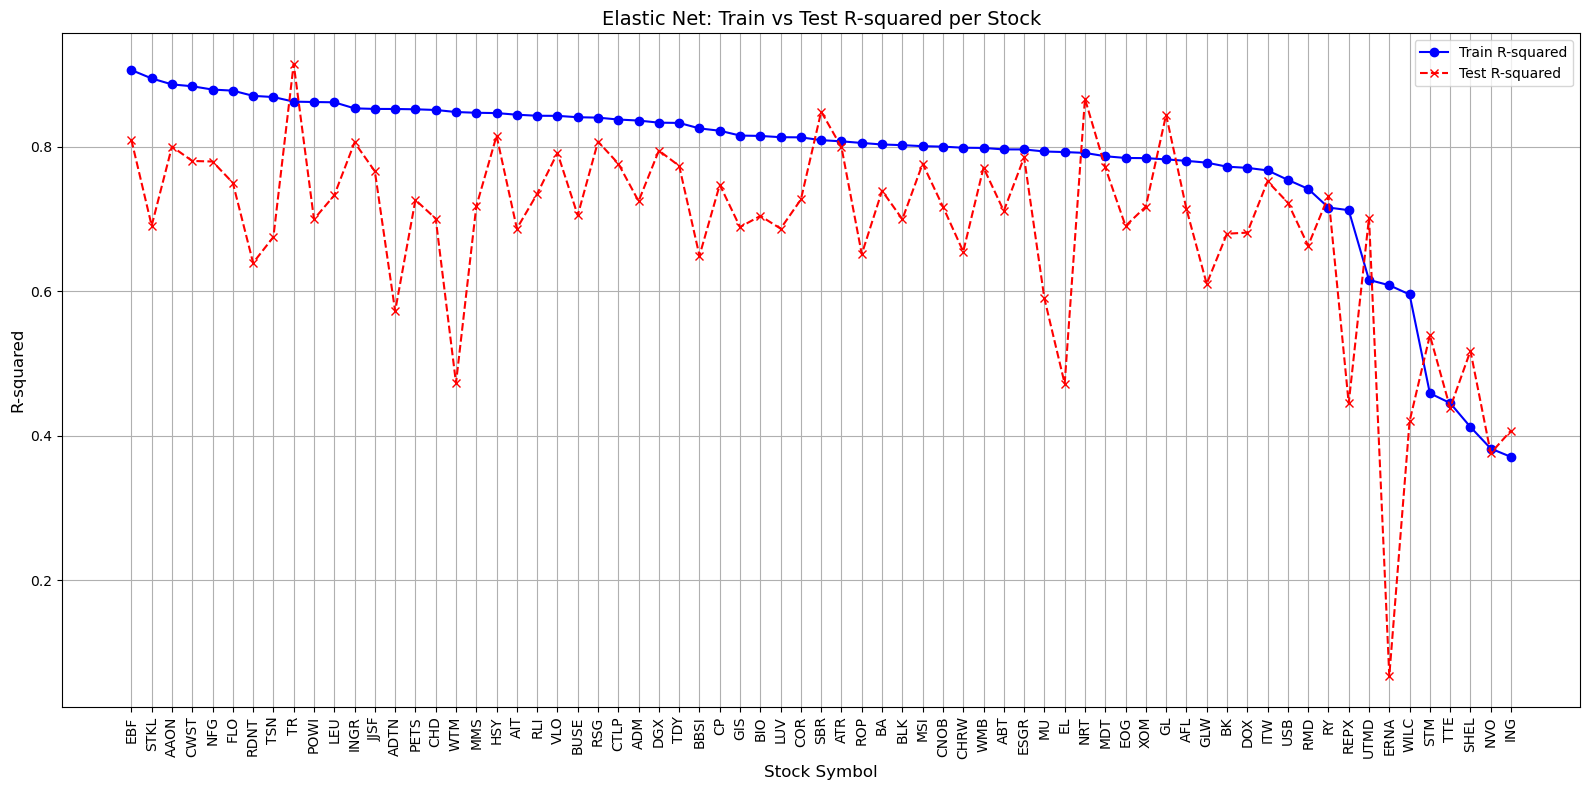

In [244]:
import matplotlib.pyplot as plt

# Rename for clarity before merge
en_train_df_renamed = en_train_df.rename(columns={
    'Median R-squared': 'Train R-squared'
})

en_test_df_renamed = en_test_df.rename(columns={
    'Test R-squared': 'Test R-squared'
})

# Merge the train and test data
merged_en_df = en_train_df_renamed.merge(en_test_df_renamed, on='Stock Symbol')

# Sort for visualization
merged_en_df = merged_en_df.sort_values(by='Train R-squared', ascending=False)

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(merged_en_df['Stock Symbol'], merged_en_df['Train R-squared'], label='Train R-squared', marker='o', linestyle='-', color='blue')
plt.plot(merged_en_df['Stock Symbol'], merged_en_df['Test R-squared'], label='Test R-squared', marker='x', linestyle='--', color='red')

plt.title("Elastic Net: Train vs Test R-squared per Stock", fontsize=14)
plt.xlabel("Stock Symbol", fontsize=12)
plt.ylabel("R-squared", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### DT for TEST

In [245]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# R² based on correlation
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Collect test results
dt_test_results = []

# Paths
dt_model_folder = r"C:\Users\User\Desktop\Master Thesis\Model Results\decision_tree\models"
output_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\decision_tree"
os.makedirs(output_path, exist_ok=True)

# Loop through each stock
for symbol in scaled_test_data_dict:
    df_test = scaled_test_data_dict[symbol].dropna().copy()
    X_test = df_test.drop(columns=['Log_Return']).values
    y_test = df_test['Log_Return'].values

    # Load saved model
    model_path = os.path.join(dt_model_folder, f"{symbol}_decision_tree_model.pkl")
    if not os.path.exists(model_path):
        print(f"⚠️ Model not found for {symbol}, skipping...")
        continue

    model = joblib.load(model_path)
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = calculate_r2(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    dt_test_results.append({
        'Stock Symbol': symbol,
        'Test R-squared': r2,
        'Test MAE': mae,
        'Test RMSE': rmse
    })

# Create and save DataFrame
dt_test_df = pd.DataFrame(dt_test_results)
print("✅ Decision Tree Test Results:")
print(dt_test_df)

# Save
dt_test_df.to_csv(os.path.join(output_path, 'dt_test_df.csv'), index=False)
print("✅ Saved to:", output_path)


✅ Decision Tree Test Results:
   Stock Symbol  Test R-squared  Test MAE  Test RMSE
0          INGR        0.482231  0.004625   0.010340
1            TR        0.887236  0.003801   0.004943
2           FLO        0.632877  0.004520   0.008412
3          STKL        0.619667  0.009981   0.021143
4          JJSF        0.708511  0.005129   0.008741
5          WILC        0.436515  0.013602   0.018026
6           TSN        0.740473  0.004608   0.008176
7           CHD        0.636735  0.004190   0.007122
8           GIS        0.612799  0.004313   0.008066
9           ADM        0.555881  0.005729   0.013435
10           EL        0.389711  0.011730   0.024321
11          HSY        0.201087  0.006855   0.017101
12          NFG        0.762954  0.004557   0.006523
13          SBR        0.815863  0.005090   0.007006
14          NRT        0.760579  0.011957   0.018573
15          LEU        0.660712  0.017106   0.028108
16         REPX        0.463266  0.013181   0.024606
17         SHEL 

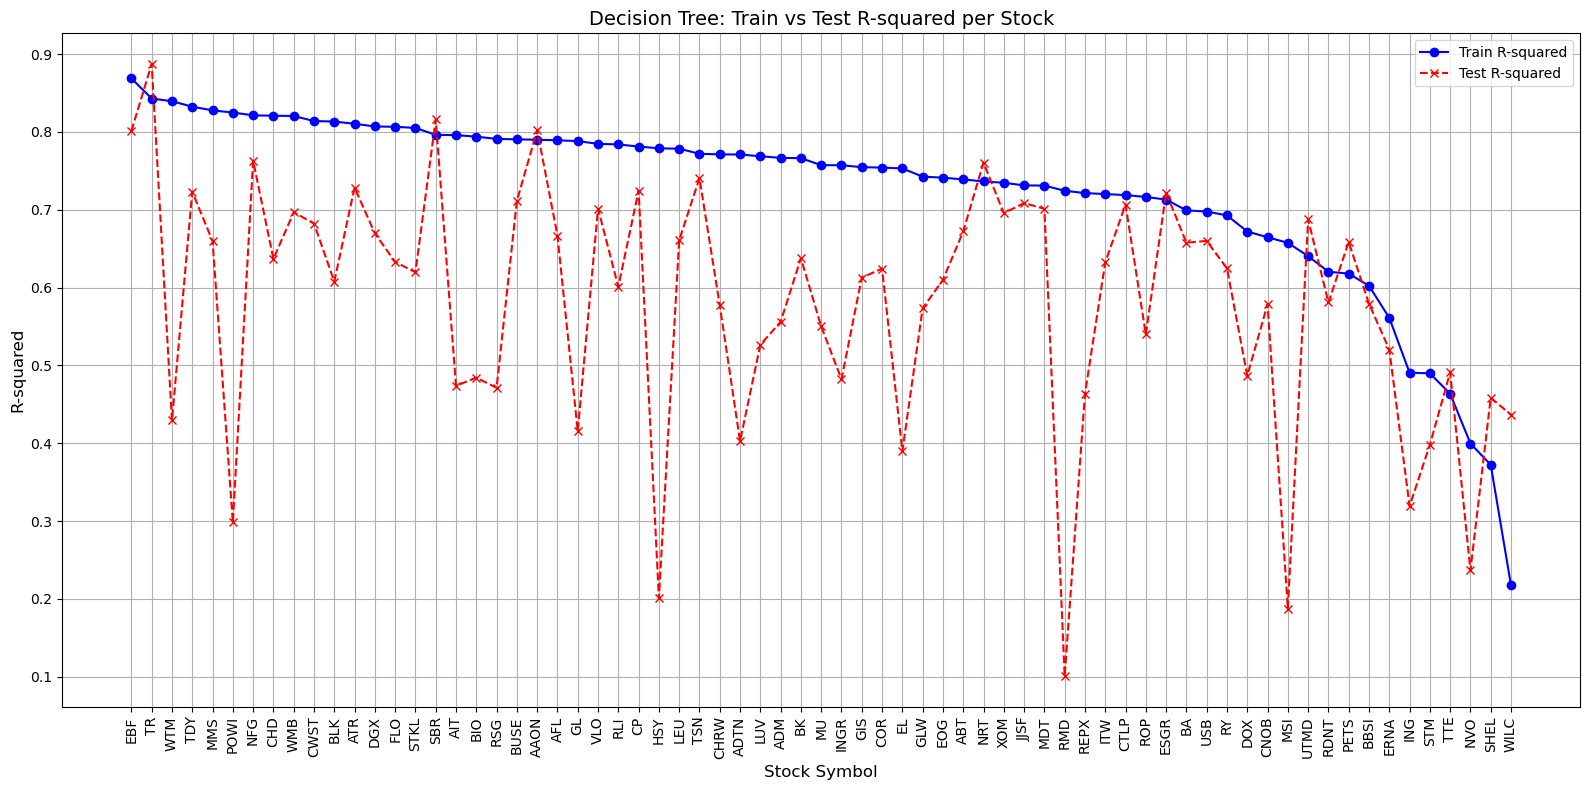

In [246]:
import matplotlib.pyplot as plt

# Ensure columns are correctly named
dt_train_df_renamed = dt_train_df.rename(columns={
    'Train R-squared': 'Train R-squared'
})

dt_test_df_renamed = dt_test_df.rename(columns={
    'Test R-squared': 'Test R-squared'
})

# Merge train and test data
merged_dt_df = dt_train_df_renamed.merge(dt_test_df_renamed, on='Stock Symbol')

# Sort for visual clarity
merged_dt_df = merged_dt_df.sort_values(by='Train R-squared', ascending=False)

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(merged_dt_df['Stock Symbol'], merged_dt_df['Train R-squared'], label='Train R-squared', marker='o', linestyle='-', color='blue')
plt.plot(merged_dt_df['Stock Symbol'], merged_dt_df['Test R-squared'], label='Test R-squared', marker='x', linestyle='--', color='red')

plt.title("Decision Tree: Train vs Test R-squared per Stock", fontsize=14)
plt.xlabel("Stock Symbol", fontsize=12)
plt.ylabel("R-squared", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### RF for TEST

In [247]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Define R² using correlation
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Prepare test results list
rf_test_results = []

# Path to saved RF models
rf_model_folder = r"C:\Users\User\Desktop\Master Thesis\Model Results\random_forest\models"
output_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\random_forest"
os.makedirs(output_path, exist_ok=True)

# Loop through stocks
for symbol in scaled_test_data_dict:
    df_test = scaled_test_data_dict[symbol].dropna().copy()
    X_test = df_test.drop(columns=['Log_Return']).values
    y_test = df_test['Log_Return'].values

    # Load the saved model
    model_path = os.path.join(rf_model_folder, f"{symbol}_rf_model.pkl")
    if not os.path.exists(model_path):
        print(f"⚠️ Model not found for {symbol}, skipping...")
        continue

    model = joblib.load(model_path)
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = calculate_r2(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    rf_test_results.append({
        'Stock Symbol': symbol,
        'Test R-squared': r2,
        'Test MAE': mae,
        'Test RMSE': rmse
    })

# Create and save DataFrame
rf_test_df = pd.DataFrame(rf_test_results)
print("✅ Random Forest Test Results:")
print(rf_test_df)

# Save
rf_test_df.to_csv(os.path.join(output_path, 'rf_test_df.csv'), index=False)
print("✅ Saved to:", output_path)

✅ Random Forest Test Results:
   Stock Symbol  Test R-squared  Test MAE  Test RMSE
0          INGR        0.760607  0.004447   0.007538
1            TR        0.868414  0.004413   0.005893
2           FLO        0.859644  0.004323   0.005879
3          STKL        0.795015  0.010494   0.018030
4          JJSF        0.801440  0.005321   0.008172
5          WILC        0.508702  0.012496   0.016873
6           TSN        0.840041  0.005266   0.007803
7           CHD        0.717065  0.004338   0.006432
8           GIS        0.747963  0.004292   0.006534
9           ADM        0.685666  0.005498   0.011902
10           EL        0.572425  0.011400   0.021538
11          HSY        0.756707  0.005111   0.007692
12          NFG        0.801484  0.005029   0.006756
13          SBR        0.819199  0.005456   0.007405
14          NRT        0.771199  0.012882   0.021732
15          LEU        0.629963  0.018054   0.029730
16         REPX        0.612781  0.019607   0.025327
17         SHEL 

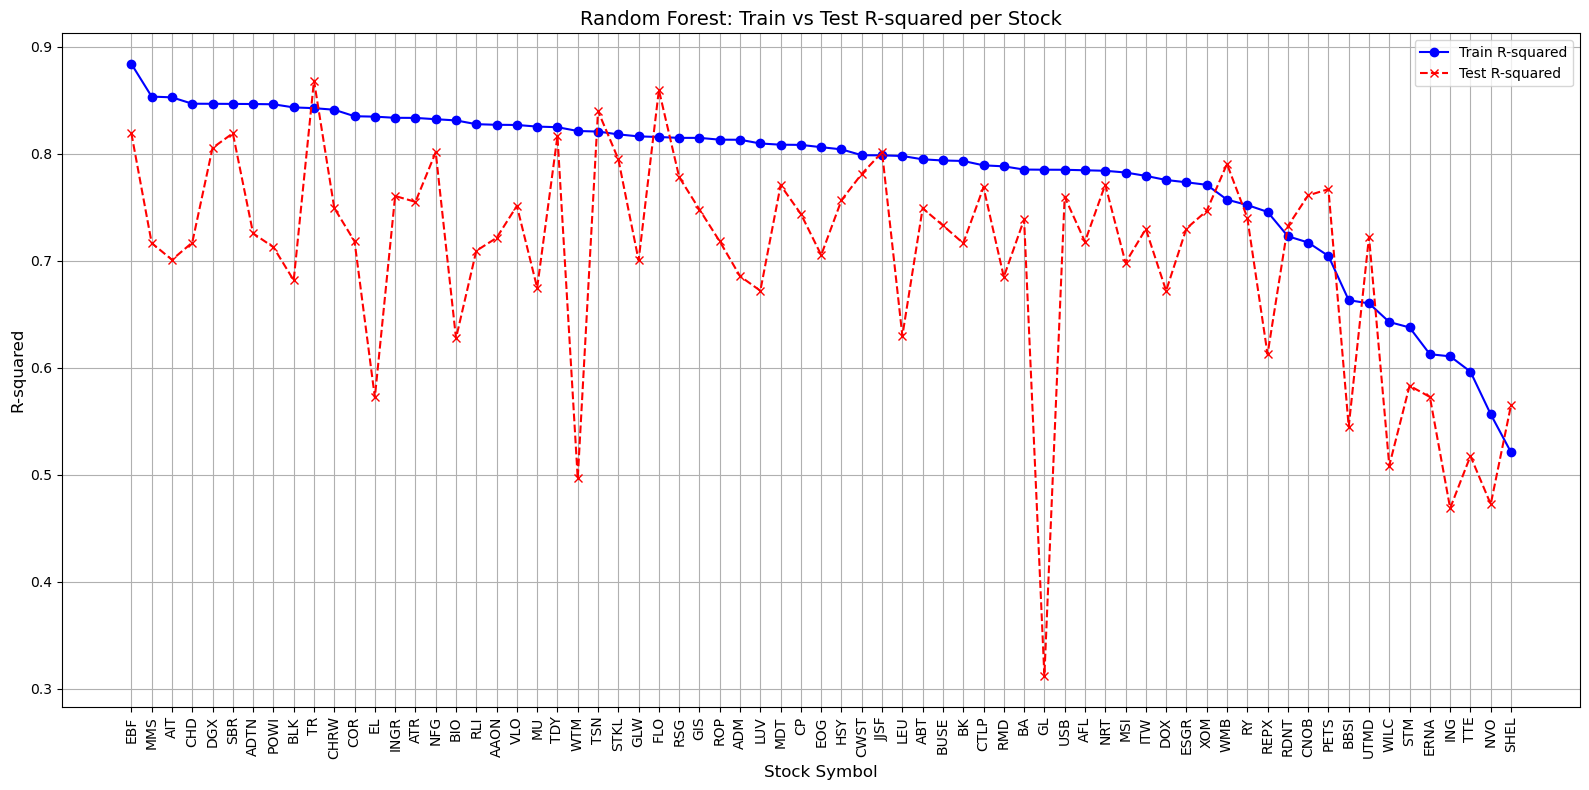

In [248]:
import matplotlib.pyplot as plt

# Ensure consistent column names
rf_train_df_renamed = rf_train_df.rename(columns={
    'Train R-squared': 'Train R-squared'
})

rf_test_df_renamed = rf_test_df.rename(columns={
    'Test R-squared': 'Test R-squared'
})

# Merge train and test results
merged_rf_df = rf_train_df_renamed.merge(rf_test_df_renamed, on='Stock Symbol')

# Sort by Train R² for cleaner plot
merged_rf_df = merged_rf_df.sort_values(by='Train R-squared', ascending=False)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(merged_rf_df['Stock Symbol'], merged_rf_df['Train R-squared'], label='Train R-squared', marker='o', linestyle='-', color='blue')
plt.plot(merged_rf_df['Stock Symbol'], merged_rf_df['Test R-squared'], label='Test R-squared', marker='x', linestyle='--', color='red')

plt.title("Random Forest: Train vs Test R-squared per Stock", fontsize=14)
plt.xlabel("Stock Symbol", fontsize=12)
plt.ylabel("R-squared", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### LGBM for TEST

In [249]:
import os
import joblib
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Helper function: R-squared via correlation
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return corr ** 2 if not np.isnan(corr) else np.nan

# Initialize results list
lgb_test_results = []

# Path to saved models
model_folder = r"C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm\models"

# Loop through each stock in test data
for symbol in scaled_test_data_dict:
    df_test = scaled_test_data_dict[symbol].dropna().copy()
    y_test = df_test['Log_Return'].values
    X_test = df_test.drop(columns=['Log_Return']).values

    # Load saved model
    model_path = os.path.join(model_folder, f"{symbol}_lightgbm_model.pkl")
    if not os.path.exists(model_path):
        continue  # skip if model is missing

    model = joblib.load(model_path)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    r2 = calculate_r2(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    # Append to results
    lgb_test_results.append({
        'Stock Symbol': symbol,
        'Test R-squared': r2,
        'Test MAE': mae,
        'Test RMSE': rmse
    })

# Convert to DataFrame
lgb_test_df = pd.DataFrame(lgb_test_results)
print("✅ LightGBM Test Results:")
print(lgb_test_df)

# Save test results
save_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm\lgb_test_df.csv"
lgb_test_df.to_csv(save_path, index=False)
print(f"✅ LightGBM Test Results saved to: {save_path}")

✅ LightGBM Test Results:
   Stock Symbol  Test R-squared  Test MAE  Test RMSE
0          INGR        0.826108  0.003750   0.005987
1            TR        0.910159  0.003442   0.004422
2           FLO        0.836791  0.003626   0.005498
3          STKL        0.696723  0.008416   0.018887
4          JJSF        0.817237  0.004280   0.006931
5          WILC        0.527845  0.012032   0.016681
6           TSN        0.817664  0.004278   0.006900
7           CHD        0.715655  0.003742   0.006264
8           GIS        0.754636  0.003737   0.006226
9           ADM        0.721148  0.004997   0.010587
10           EL        0.504912  0.010412   0.021699
11          HSY        0.796846  0.004306   0.006771
12          NFG        0.795267  0.004177   0.006087
13          SBR        0.858401  0.004561   0.006180
14          NRT        0.805436  0.010209   0.017215
15          LEU        0.718675  0.016817   0.025669
16         REPX        0.822482  0.010200   0.014544
17         SHEL      

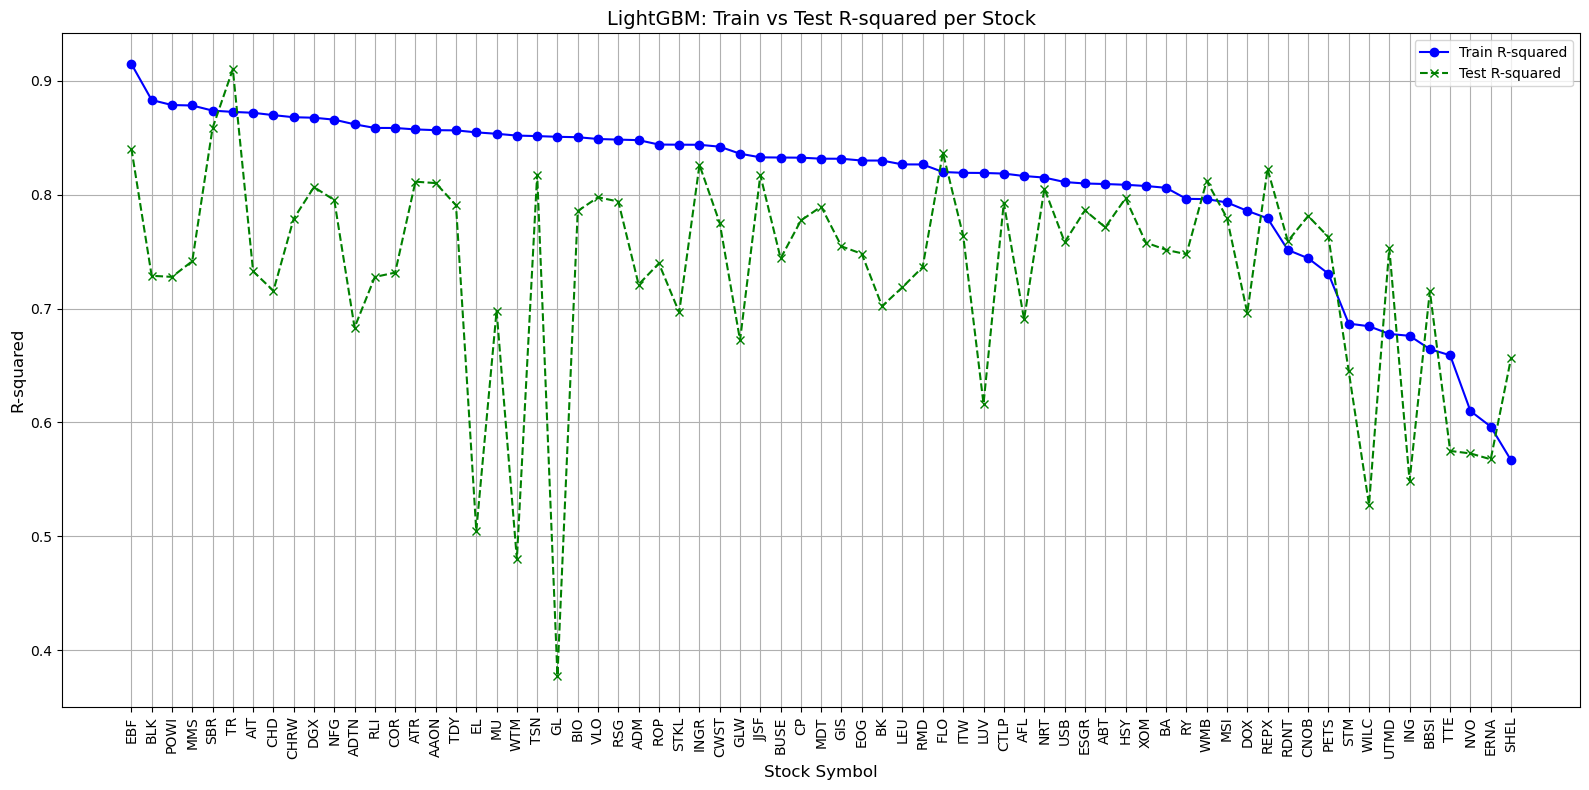

In [250]:
import matplotlib.pyplot as plt

# Merge train and test data
merged_lgb_df = lgb_train_df.merge(lgb_test_df, on='Stock Symbol')

# Sort for clean plotting
merged_lgb_df = merged_lgb_df.sort_values(by='Train R-squared', ascending=False)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(merged_lgb_df['Stock Symbol'], merged_lgb_df['Train R-squared'], label='Train R-squared', marker='o', linestyle='-', color='blue')
plt.plot(merged_lgb_df['Stock Symbol'], merged_lgb_df['Test R-squared'], label='Test R-squared', marker='x', linestyle='--', color='green')

plt.title("LightGBM: Train vs Test R-squared per Stock", fontsize=14)
plt.xlabel("Stock Symbol", fontsize=12)
plt.ylabel("R-squared", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

###  **FEATURE IMPORTANCE PLOTS FOR ALL STOCSK USING PERMUATION**

#### FEATURE IMPORTANCE PLOTS FOR RF MODEL

In [169]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Define paths
model_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\random_forest\models"

# Folder to save plots
save_dir = r"C:\Users\User\Desktop\Master Thesis\Model Results\random_forest\importance_plots"
os.makedirs(save_dir, exist_ok=True)

# Loop through all stocks in test dictionary
for symbol in scaled_test_data_dict:
    df_test = scaled_test_data_dict[symbol].dropna().copy()

    if 'Log_Return' not in df_test.columns:
        continue  # Skip if target is missing

    X_test = df_test.drop(columns=['Log_Return']).values
    y_test = df_test['Log_Return'].values
    feature_names = df_test.drop(columns=['Log_Return']).columns

    # Load saved model
    model_file = os.path.join(model_path, f"{symbol}_rf_model.pkl")
    if not os.path.exists(model_file):
        print(f"⚠️ Model not found for {symbol}, skipping...")
        continue

    rf_model = joblib.load(model_file)

    # Compute permutation importance
    result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

    # Sort importance
    sorted_idx = result.importances_mean.argsort()[::-1]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), result.importances_mean[sorted_idx])
    plt.yticks(range(len(feature_names)), feature_names[sorted_idx])
    plt.gca().invert_yaxis()
    plt.xlabel("Mean Importance (Permutation)")
    plt.title(f"Permutation-Based Importance (RF) - {symbol}")
    plt.tight_layout()

    # Save plot
    plot_file = os.path.join(save_dir, f"{symbol}_rf_importance.png")
    plt.savefig(plot_file)
    plt.close()

    print(f"✅ Saved importance plot for {symbol}")


✅ Saved importance plot for INGR
✅ Saved importance plot for TR
✅ Saved importance plot for FLO
✅ Saved importance plot for STKL
✅ Saved importance plot for JJSF
✅ Saved importance plot for WILC
✅ Saved importance plot for TSN
✅ Saved importance plot for CHD
✅ Saved importance plot for GIS
✅ Saved importance plot for ADM
✅ Saved importance plot for EL
✅ Saved importance plot for HSY
✅ Saved importance plot for NFG
✅ Saved importance plot for SBR
✅ Saved importance plot for NRT
✅ Saved importance plot for LEU
✅ Saved importance plot for REPX
✅ Saved importance plot for SHEL
✅ Saved importance plot for TTE
✅ Saved importance plot for XOM
✅ Saved importance plot for EOG
✅ Saved importance plot for WMB
✅ Saved importance plot for VLO
✅ Saved importance plot for ESGR
✅ Saved importance plot for WTM
✅ Saved importance plot for RLI
✅ Saved importance plot for BUSE
✅ Saved importance plot for CNOB
✅ Saved importance plot for GL
✅ Saved importance plot for RY
✅ Saved importance plot for AFL
✅ S

#### FEATURE IMPORTANCE PLOT FOR LGBM MODEL

In [170]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Define model and output directories
model_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm\models"
save_dir = r"C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm\importance_plots"
os.makedirs(save_dir, exist_ok=True)

# Loop through all stock test datasets
for symbol in scaled_test_data_dict:
    df_test = scaled_test_data_dict[symbol].dropna().copy()

    if 'Log_Return' not in df_test.columns:
        continue

    X_test = df_test.drop(columns=['Log_Return']).values
    y_test = df_test['Log_Return'].values
    feature_names = df_test.drop(columns=['Log_Return']).columns

    # Load saved LightGBM model
    model_file = os.path.join(model_path, f"{symbol}_lightgbm_model.pkl")
    if not os.path.exists(model_file):
        print(f"⚠️ Model not found for {symbol}, skipping...")
        continue

    lgbm_model = joblib.load(model_file)

    # Compute permutation importance
    result = permutation_importance(lgbm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

    # Sort importance
    sorted_idx = result.importances_mean.argsort()[::-1]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), result.importances_mean[sorted_idx])
    plt.yticks(range(len(feature_names)), feature_names[sorted_idx])
    plt.gca().invert_yaxis()
    plt.xlabel("Mean Importance (Permutation)")
    plt.title(f"Permutation-Based Importance (LGBM) - {symbol}")
    plt.tight_layout()

    # Save plot
    plot_path = os.path.join(save_dir, f"{symbol}_lgbm_importance.png")
    plt.savefig(plot_path)
    plt.close()

    print(f"✅ Saved importance plot for {symbol}")


✅ Saved importance plot for INGR
✅ Saved importance plot for TR
✅ Saved importance plot for FLO
✅ Saved importance plot for STKL
✅ Saved importance plot for JJSF
✅ Saved importance plot for WILC
✅ Saved importance plot for TSN
✅ Saved importance plot for CHD
✅ Saved importance plot for GIS
✅ Saved importance plot for ADM
✅ Saved importance plot for EL
✅ Saved importance plot for HSY
✅ Saved importance plot for NFG
✅ Saved importance plot for SBR
✅ Saved importance plot for NRT
✅ Saved importance plot for LEU
✅ Saved importance plot for REPX
✅ Saved importance plot for SHEL
✅ Saved importance plot for TTE
✅ Saved importance plot for XOM
✅ Saved importance plot for EOG
✅ Saved importance plot for WMB
✅ Saved importance plot for VLO
✅ Saved importance plot for ESGR
✅ Saved importance plot for WTM
✅ Saved importance plot for RLI
✅ Saved importance plot for BUSE
✅ Saved importance plot for CNOB
✅ Saved importance plot for GL
✅ Saved importance plot for RY
✅ Saved importance plot for AFL
✅ S

##### **TOP 5 IMPORTANT FEATURE PER STOCK**

##### TOP 5 VAR WITH RF MODEL

In [171]:
import os
import joblib
import pandas as pd
import numpy as np

# === Paths ===
base_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\random_forest"
model_folder = os.path.join(base_path, "models")
test_data_dict = scaled_test_data_dict  # Ensure this dict is defined
save_folder = os.path.join(base_path, "feature_importance_tables")
os.makedirs(save_folder, exist_ok=True)

# === Loop over stocks ===
for symbol in test_data_dict.keys():
    # Load model
    model_path = os.path.join(model_folder, f"{symbol}_rf_model.pkl")
    if not os.path.exists(model_path):
        print(f"❌ Model not found for {symbol}, skipping...")
        continue
    model = joblib.load(model_path)

    # Get test data
    df_test = test_data_dict[symbol].dropna().copy()
    if 'Log_Return' not in df_test.columns:
        print(f"❌ 'Log_Return' missing in test data for {symbol}, skipping...")
        continue
    X_test = df_test.drop(columns=['Log_Return'])

    # Check feature count match
    if len(model.feature_importances_) != X_test.shape[1]:
        print(f"❌ Feature mismatch for {symbol}, skipping...")
        continue

    # Get top 5 important features
    importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False).head(5)

    # Save to CSV
    file_path = os.path.join(save_folder, f"{symbol}_top5_features.csv")
    importance_df.to_csv(file_path, index=False)

print(f"✅ Top 5 feature importance tables saved to: {save_folder}")


✅ Top 5 feature importance tables saved to: C:\Users\User\Desktop\Master Thesis\Model Results\random_forest\feature_importance_tables


#### TOP 5 VAR WITH LGBM MODEL

In [172]:
import os
import joblib
import pandas as pd
import numpy as np

# === Define Paths ===
base_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm"
model_folder = os.path.join(base_path, "models")
test_data_dict = scaled_test_data_dict  # make sure this dict is loaded
save_folder = os.path.join(base_path, "feature_importance_tables")
os.makedirs(save_folder, exist_ok=True)

# === Loop through stocks ===
for symbol in test_data_dict.keys():
    # Load model
    model_path = os.path.join(model_folder, f"{symbol}_lightgbm_model.pkl")
    if not os.path.exists(model_path):
        print(f"❌ Model not found for {symbol}, skipping...")
        continue
    model = joblib.load(model_path)

    # Prepare test features
    df_test = test_data_dict[symbol].dropna().copy()
    if 'Log_Return' not in df_test.columns:
        print(f"❌ 'Log_Return' missing in test data for {symbol}, skipping...")
        continue
    X_test = df_test.drop(columns=['Log_Return'])

    # Ensure feature count matches
    if len(model.feature_importances_) != X_test.shape[1]:
        print(f"❌ Feature mismatch for {symbol}, skipping...")
        continue

    # Get top 5 features
    importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False).head(5)

    # Save to CSV
    file_path = os.path.join(save_folder, f"{symbol}_top5_features.csv")
    importance_df.to_csv(file_path, index=False)

print(f"✅ Top 5 feature importance tables saved to: {save_folder}")


✅ Top 5 feature importance tables saved to: C:\Users\User\Desktop\Master Thesis\Model Results\lightgbm\feature_importance_tables


---

In [258]:
import pandas as pd

# Merge helper
def merge_model_results(train_df, test_df, train_col='Train R-squared', test_col='Test R-squared'):
    return pd.merge(
        train_df[['Stock Symbol', train_col]],
        test_df[['Stock Symbol', test_col]],
        on='Stock Symbol',
        how='inner'
    )

# Build initial table
summary_df = pd.DataFrame({'Stock Symbol': linear_train_df['Stock Symbol']})

# Merge each model's results
summary_df = summary_df.merge(
    merge_model_results(linear_train_df, linear_test_df, 'Median R-squared', 'Test R-squared'),
    on='Stock Symbol',
    suffixes=('', '_Linear')
).merge(
    merge_model_results(en_train_df, en_test_df, 'Median R-squared', 'Test R-squared'),
    on='Stock Symbol',
    suffixes=('', '_ElasticNet')
).merge(
    merge_model_results(dt_train_df, dt_test_df, 'Train R-squared', 'Test R-squared'),
    on='Stock Symbol',
    suffixes=('', '_DecisionTree')
).merge(
    merge_model_results(rf_train_df, rf_test_df, 'Train R-squared', 'Test R-squared'),
    on='Stock Symbol',
    suffixes=('', '_RandomForest')
).merge(
    merge_model_results(lgb_train_df, lgb_test_df, 'Train R-squared', 'Test R-squared'),
    on='Stock Symbol',
    suffixes=('', '_LightGBM')
)

# Rename columns
summary_df.columns = [
    'Stock Symbol',
    'Train R2 Linear', 'Test R2 Linear',
    'Train R2 ElasticNet', 'Test R2 ElasticNet',
    'Train R2 DecisionTree', 'Test R2 DecisionTree',
    'Train R2 RandomForest', 'Test R2 RandomForest',
    'Train R2 LightGBM', 'Test R2 LightGBM'
]

# Format to string with 2 decimal places (no trailing zeros)
for col in summary_df.columns[1:]:
    summary_df[col] = summary_df[col].apply(lambda x: f"{x:.2f}" if pd.notna(x) else '')

# Show first few rows
from IPython.display import display
display(summary_df)

# Save
summary_df.to_csv(
    r"C:\Users\User\Desktop\Master Thesis\Model Results\Final_R2_Summary_Table.csv",
    index=False
)

print("✅ Final R² summary table saved with 2-decimal string format (no trailing zeros).")


Stock Symbol Train R2 Linear Test R2 Linear Train R2 ElasticNet  \
0          INGR            0.85           0.78                0.85   
1            TR            0.86           0.91                0.86   
2           FLO            0.87           0.75                0.88   
3          STKL            0.89           0.68                0.89   
4          JJSF            0.85           0.77                0.85   
5          WILC            0.59           0.42                0.60   
6           TSN            0.86           0.68                0.87   
7           CHD            0.84           0.70                0.85   
8           GIS            0.80           0.68                0.82   
9           ADM            0.83           0.74                0.84   
10           EL            0.79           0.46                0.79   
11          HSY            0.84           0.82                0.85   
12          NFG            0.88           0.78                0.88   
13          SBR            0.81           0.84                0.81   
14          NRT            0.79           0.87                0.79   
15          LEU            0.85           0.73                0.86   
16         REPX            0.70           0.40                0.71   
17         SHEL            0.43           0.52                0.41   
18          TTE            0.44           0.44                0.44   
19          XOM            0.77           0.72                0.78   
20          EOG            0.78           0.69                0.78   
21          WMB            0.80           0.77                0.80   
22          VLO            0.85           0.79                0.84   
23         ESGR            0.80           0.80                0.80   
24          WTM            0.85           0.48                0.85   
25          RLI            0.84           0.73                0.84   
26         BUSE            0.83           0.70                0.84   
27         CNOB            0.80           0.72                0.80   
28           GL            0.78           0.85                0.78   
29           RY            0.72           0.71                0.72   
30          AFL            0.78           0.71                0.78   
31           BK            0.76           0.68                0.77   
32          USB            0.75           0.72                0.75   
33          ING            0.37           0.41                0.37   
34          BLK            0.80           0.70                0.80   
35          DGX            0.83           0.79                0.83   
36         UTMD            0.62           0.70                0.62   
37          ATR            0.80           0.80                0.81   
38         ERNA            0.58           0.07                0.61   
39         PETS            0.84           0.72                0.85   
40          RMD            0.74           0.66                0.74   
41          ABT            0.79           0.71                0.80   
42          MDT            0.78           0.77                0.79   
43          COR            0.81           0.73                0.81   
44          NVO            0.37           0.38                0.38   
45          BIO            0.81           0.63                0.81   
46         RDNT            0.86           0.63                0.87   
47         BBSI            0.82           0.65                0.83   
48         CWST            0.88           0.78                0.88   
49          MMS            0.84           0.72                0.85   
50          AIT            0.84           0.69                0.84   
51          EBF            0.90           0.81                0.91   
52         AAON            0.89           0.80                0.89   
53          ITW            0.76           0.75                0.77   
54          RSG            0.83           0.80                0.84   
55           CP            0.82           0.75                0.82   
56           

✅ Final R² summary table saved with 2-decimal string format (no trailing zeros).


In [262]:
import pandas as pd

# Flexible column renaming function
def rename_columns(df, model_name, data_type):
    renamed = df.copy()
    new_columns = ['Stock Symbol']
    
    for col in df.columns:
        if col == 'Stock Symbol':
            continue
        col_lower = col.lower()
        if 'r-squared' in col_lower:
            metric = 'R2'
        elif 'mae' in col_lower:
            metric = 'MAE'
        elif 'rmse' in col_lower:
            metric = 'RMSE'
        else:
            metric = col  # fallback
        new_columns.append(f"{metric} {data_type} {model_name}")
    
    renamed.columns = new_columns
    return renamed

# === Combine all DataFrames ===
frames = []

# Linear Regression
frames.append(rename_columns(linear_train_df, 'Linear', 'Train'))
frames.append(rename_columns(linear_val_df, 'Linear', 'Validation'))
frames.append(rename_columns(linear_test_df, 'Linear', 'Test'))

# Elastic Net
frames.append(rename_columns(en_train_df, 'ElasticNet', 'Train'))
frames.append(rename_columns(en_val_df, 'ElasticNet', 'Validation'))
frames.append(rename_columns(en_test_df, 'ElasticNet', 'Test'))

# Decision Tree
frames.append(rename_columns(dt_train_df, 'DecisionTree', 'Train'))
frames.append(rename_columns(dt_val_df, 'DecisionTree', 'Validation'))
frames.append(rename_columns(dt_test_df, 'DecisionTree', 'Test'))

# Random Forest
frames.append(rename_columns(rf_train_df, 'RandomForest', 'Train'))
frames.append(rename_columns(rf_val_df, 'RandomForest', 'Validation'))
frames.append(rename_columns(rf_test_df, 'RandomForest', 'Test'))

# LightGBM
frames.append(rename_columns(lgb_train_df, 'LightGBM', 'Train'))
frames.append(rename_columns(lgb_val_df, 'LightGBM', 'Validation'))
frames.append(rename_columns(lgb_test_df, 'LightGBM', 'Test'))

# Merge all on 'Stock Symbol'
from functools import reduce
final_full_df = reduce(lambda left, right: pd.merge(left, right, on='Stock Symbol'), frames)

# Optional: round only R2 columns
r2_cols = [col for col in final_full_df.columns if 'R2' in col]
final_full_df[r2_cols] = final_full_df[r2_cols].round(2)

# Save to CSV
save_path = r"C:\Users\User\Desktop\Master Thesis\Model Results\Final_Full_Results_Table.csv"
final_full_df.to_csv(save_path, index=False)

# Display first few rows
from IPython.display import display
display(final_full_df)

print("✅ Final full results table created and saved successfully.")


Stock Symbol  R2 Train Linear  MAE Train Linear  RMSE Train Linear  \
0          INGR         0.850000          0.004644           0.005826   
1            TR         0.860000          0.003629           0.004464   
2           FLO         0.870000          0.003795           0.004781   
3          STKL         0.890000          0.007021           0.008772   
4          JJSF         0.850000          0.004616           0.005748   
5          WILC         0.590000          0.010971           0.014167   
6           TSN         0.860000          0.004599           0.005910   
7           CHD         0.840000          0.003039           0.003946   
8           GIS         0.800000          0.003230           0.004035   
9           ADM         0.830000          0.005003           0.006270   
10           EL         0.790000          0.004540           0.005736   
11          HSY         0.840000          0.003210           0.004047   
12          NFG         0.880000          0.003772           0.004687   
13          SBR         0.810000          0.004833           0.006061   
14          NRT         0.790000          0.006532           0.008263   
15          LEU         0.850000          0.012038           0.016028   
16         REPX         0.700000          0.018254           0.023511   
17         SHEL         0.430000          0.007403           0.009262   
18          TTE         0.440000          0.007838           0.009646   
19          XOM         0.770000          0.004361           0.005331   
20          EOG         0.780000          0.007300           0.009197   
21          WMB         0.800000          0.006204           0.007885   
22          VLO         0.850000          0.006366           0.007881   
23         ESGR         0.800000          0.005301           0.006671   
24          WTM         0.850000          0.003547           0.004502   
25          RLI         0.840000          0.003769           0.004851   
26         BUSE         0.830000          0.005500           0.006789   
27         CNOB         0.800000          0.005570           0.006989   
28           GL         0.780000          0.003992           0.005339   
29           RY         0.720000          0.004376           0.005392   
30          AFL         0.780000          0.004500           0.005574   
31           BK         0.760000          0.005337           0.006917   
32          USB         0.750000          0.004469           0.005665   
33          ING         0.370000          0.011332           0.013923   
34          BLK         0.800000          0.005214           0.006689   
35          DGX         0.830000          0.003573           0.004560   
36         UTMD         0.620000          0.007355           0.009358   
37          ATR         0.800000          0.003979           0.004993   
38         ERNA         0.580000          0.023963           0.029983   
39         PETS         0.840000          0.006624           0.008170   
40          RMD         0.740000          0.005672           0.007275   
41          ABT         0.790000          0.003881           0.004827   
42          MDT         0.780000          0.004218           0.005409   
43          COR         0.810000          0.004096           0.005228   
44          NVO         0.370000          0.008691           0.011114   
45          BIO         0.810000          0.004404           0.005590   
46         RDNT         0.860000          0.009575           0.012100   
47         BBSI         0.820000          0.008403           0.010269   
48         CWST         0.880000          0.006563           0.008088   
49          MMS         0.840000          0.004135           0.005280   
50          AIT         0.840000          0.005063           0.006509   
51          EBF         0.900000          0.004784           0.005948   
52         AAON         0.890000          0.006126           0.007735   
53          ITW         0.760000          0.004623           

✅ Final full results table created and saved successfully.


---